In [ ]:
!pip install transformers
!pip install -U sentence-transformers
!pip install pyyaml h5py tensorflow
!pip install ipython-autotime

time: 14.2 s (started: 2022-01-18 18:55:36 +00:00)


In [ ]:
%load_ext autotime
%load_ext google.colab.data_table
import tensorflow as tf
from tensorflow import keras

from google.colab import drive
drive.mount('/content/drive')

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 5.22 s (started: 2022-01-18 18:55:50 +00:00)


In [ ]:
import scipy
from sentence_transformers import SentenceTransformer, models
from torch import nn
#model = SentenceTransformer('stsb-roberta-large')

time: 2.3 ms (started: 2022-01-18 18:55:55 +00:00)


In [ ]:
#model.save('/content/drive/My Drive/Colab Notebooks/models/stsb_roberta_large.h5')
#in SavedModel format
#model.save('/content/drive/My Drive/Colab Notebooks/models/stsb_roberta_large_saved_model')

In [ ]:
#this one for pure sbert: implemented for comparison only

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('stsb-roberta-base-v2')
print("Max Sequence Length:", model.max_seq_length)
model.max_seq_length = 300
print("Max Sequence Length:", model.max_seq_length)

Downloading:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.68k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/675 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Max Sequence Length: 75
Max Sequence Length: 300
time: 40.9 s (started: 2022-01-18 18:41:26 +00:00)


In [ ]:
#model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/models/stsb_roberta_large.h5')
#model = SentenceTransformer('/content/drive/My Drive/Colab Notebooks/models/stsb_roberta_large.h5')
model = SentenceTransformer('/content/drive/My Drive/Colab Notebooks/models/stsb_roberta_large_saved_model')
model.max_seq_length=300
print("Max Sequence Length:", model.max_seq_length)

In [ ]:
word_embedding_model = models.Transformer('sentence-transformers/stsb-roberta-base-v2', max_seq_length=300)
#print(word_embedding_model.get_word_embedding_dimension())
#word_embedding_model = models.Transformer('allenai/scibert_scivocab_cased', max_seq_length=512)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
#pooling_model = models.Pooling(512)
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=512, activation_function=nn.Tanh())
model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])
print("Max Sequence Length:", model.max_seq_length)
print("Sentence Embedding Dimension:",model.get_sentence_embedding_dimension())


Downloading:   0%|          | 0.00/675 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Max Sequence Length: 300
Sentence Embedding Dimension: 512
time: 35 s (started: 2022-01-18 18:56:18 +00:00)


In [ ]:
#reference 1
text="""

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Velit scelerisque in dictum non consectetur a erat. Sit amet justo donec enim diam vulputate. Id aliquet lectus proin nibh nisl condimentum id venenatis a. Eget gravida cum sociis natoque penatibus et magnis dis. Habitant morbi tristique senectus et netus et. Interdum consectetur libero id faucibus nisl tincidunt eget nullam. Aliquam purus sit amet luctus. Fringilla ut morbi tincidunt augue interdum velit. Neque sodales ut etiam sit. Quam viverra orci sagittis eu volutpat odio facilisis mauris. Ornare suspendisse sed nisi lacus sed. Iaculis at erat pellentesque adipiscing commodo elit at imperdiet dui. Quam nulla porttitor massa id neque aliquam vestibulum morbi. Dignissim diam quis enim lobortis scelerisque fermentum dui faucibus. Turpis egestas integer eget aliquet.

In nisl nisi scelerisque eu ultrices vitae auctor eu. Dolor sit amet consectetur adipiscing elit duis. Tortor dignissim convallis aenean et tortor at. Iaculis at erat pellentesque adipiscing commodo. Viverra suspendisse potenti nullam ac tortor. Elementum nibh tellus molestie nunc non blandit massa enim. Ultricies integer quis auctor elit sed. Varius vel pharetra vel turpis nunc eget lorem dolor. Sit amet massa vitae tortor condimentum. Adipiscing elit ut aliquam purus sit amet luctus venenatis lectus. Nascetur ridiculus mus mauris vitae ultricies leo integer.

Urna nunc id cursus metus. Id leo in vitae turpis massa. Blandit turpis cursus in hac habitasse platea. Feugiat sed lectus vestibulum mattis ullamcorper. Diam sit amet nisl suscipit adipiscing bibendum est. Enim nunc faucibus a pellentesque sit amet porttitor eget dolor. Enim eu turpis egestas pretium aenean pharetra. Amet mattis vulputate enim nulla aliquet. Tristique et egestas quis ipsum suspendisse ultrices gravida dictum fusce. Risus commodo viverra maecenas accumsan lacus vel. Eu mi bibendum neque egestas congue quisque egestas diam in. Fermentum odio eu feugiat pretium nibh ipsum consequat.

Egestas egestas fringilla phasellus faucibus scelerisque. Sit amet dictum sit amet justo donec. Cum sociis natoque penatibus et magnis dis parturient montes. Habitasse platea dictumst quisque sagittis purus sit amet volutpat. Magna etiam tempor orci eu lobortis elementum nibh tellus molestie. Gravida arcu ac tortor dignissim convallis. Consequat nisl vel pretium lectus quam id leo in. Amet venenatis urna cursus eget. In est ante in nibh. Mauris commodo quis imperdiet massa. Pellentesque diam volutpat commodo sed egestas egestas fringilla phasellus.

Laoreet suspendisse interdum consectetur libero id faucibus nisl tincidunt. Enim sit amet venenatis urna cursus eget. Tristique senectus et netus et. Ipsum suspendisse ultrices gravida dictum fusce ut. Velit ut tortor pretium viverra suspendisse potenti nullam ac tortor. Sapien eget mi proin sed libero enim sed faucibus turpis. Ullamcorper malesuada proin libero nunc consequat interdum varius. Suscipit adipiscing bibendum est ultricies integer quis. Libero volutpat sed cras ornare arcu. In ante metus dictum at. Sed augue lacus viverra vitae congue eu consequat. Mi eget mauris pharetra et ultrices neque ornare aenean. Pellentesque elit ullamcorper dignissim cras tincidunt lobortis feugiat vivamus at. Blandit cursus risus at ultrices mi tempus. Ultrices gravida dictum fusce ut placerat. Sit amet justo donec enim. Malesuada fames ac turpis egestas integer eget.

Nibh praesent tristique magna sit amet purus gravida quis. Commodo viverra maecenas accumsan lacus vel facilisis volutpat est. Sed viverra tellus in hac habitasse. Eu augue ut lectus arcu bibendum at varius vel pharetra. Leo vel fringilla est ullamcorper eget nulla facilisi etiam dignissim. Gravida dictum fusce ut placerat orci nulla pellentesque dignissim. Varius sit amet mattis vulputate enim nulla aliquet porttitor. Egestas diam in arcu cursus euismod quis viverra nibh. Facilisi cras fermentum odio eu feugiat pretium nibh ipsum consequat. Enim nulla aliquet porttitor lacus luctus. At varius vel pharetra vel turpis.

Eget mi proin sed libero enim sed faucibus turpis in. Sed odio morbi quis commodo odio aenean sed. Nibh mauris cursus mattis molestie a iaculis at. Tellus pellentesque eu tincidunt tortor. Massa vitae tortor condimentum lacinia quis. Scelerisque eu ultrices vitae auctor eu augue ut. Purus gravida quis blandit turpis cursus in hac habitasse platea. Ullamcorper sit amet risus nullam eget felis. Adipiscing vitae proin sagittis nisl rhoncus mattis rhoncus urna neque. Pellentesque habitant morbi tristique senectus et netus. Vehicula ipsum a arcu cursus vitae. Amet luctus venenatis lectus magna fringilla urna porttitor rhoncus. Tristique senectus et netus et malesuada. Placerat duis ultricies lacus sed turpis tincidunt id aliquet. Dolor purus non enim praesent elementum facilisis leo. Blandit libero volutpat sed cras ornare arcu. Neque vitae tempus quam pellentesque. Elit eget gravida cum sociis.

Nunc lobortis mattis aliquam faucibus purus in massa tempor. Amet consectetur adipiscing elit pellentesque. Fermentum posuere urna nec tincidunt praesent semper feugiat nibh sed. Sed tempus urna et pharetra pharetra massa massa ultricies mi. Turpis egestas integer eget aliquet nibh praesent tristique magna sit. Pellentesque elit ullamcorper dignissim cras tincidunt lobortis feugiat vivamus. In est ante in nibh mauris. Vel facilisis volutpat est velit egestas. Elementum integer enim neque volutpat ac tincidunt vitae. Id velit ut tortor pretium viverra. Commodo viverra maecenas accumsan lacus. Mi bibendum neque egestas congue.

Cras sed felis eget velit aliquet sagittis. Et sollicitudin ac orci phasellus egestas tellus rutrum tellus pellentesque. Elementum pulvinar etiam non quam lacus suspendisse faucibus interdum. Morbi tincidunt augue interdum velit euismod in. Vitae justo eget magna fermentum iaculis eu non. Pellentesque diam volutpat commodo sed. Cras ornare arcu dui vivamus arcu. Sed arcu non odio euismod lacinia at quis risus sed. Volutpat blandit aliquam etiam erat. Id neque aliquam vestibulum morbi blandit. Non sodales neque sodales ut etiam sit amet. Elit eget gravida cum sociis natoque penatibus et magnis. Eu feugiat pretium nibh ipsum consequat nisl vel pretium lectus. Suspendisse interdum consectetur libero id faucibus nisl tincidunt eget. Amet risus nullam eget felis eget nunc lobortis mattis. Volutpat consequat mauris nunc congue nisi vitae suscipit tellus.

Elementum facilisis leo vel fringilla est ullamcorper eget nulla. Sit amet nulla facilisi morbi tempus iaculis urna id. Bibendum ut tristique et egestas quis. Eu feugiat pretium nibh ipsum consequat nisl vel pretium lectus. Volutpat commodo sed egestas egestas fringilla phasellus faucibus. Mauris a diam maecenas sed enim ut sem. Lacus vestibulum sed arcu non odio. In fermentum et sollicitudin ac orci phasellus egestas. Blandit aliquam etiam erat velit scelerisque. Sit amet nisl suscipit adipiscing. Feugiat sed lectus vestibulum mattis ullamcorper. Nisl suscipit adipiscing bibendum est ultricies integer. Nam libero justo laoreet sit amet cursus sit amet.

Mi eget mauris pharetra et. A erat nam at lectus urna duis convallis. Sit amet porttitor eget dolor morbi non. Adipiscing at in tellus integer feugiat scelerisque. A erat nam at lectus urna duis. Sit amet porttitor eget dolor morbi. Massa tincidunt nunc pulvinar sapien et ligula ullamcorper malesuada. Tellus orci ac auctor augue mauris augue neque. Suspendisse potenti nullam ac tortor vitae purus. Ut consequat semper viverra nam libero justo laoreet. Iaculis nunc sed augue lacus viverra vitae congue eu consequat.

Accumsan lacus vel facilisis volutpat est velit egestas dui id. Diam sit amet nisl suscipit. Enim lobortis scelerisque fermentum dui faucibus in ornare quam viverra. Vitae auctor eu augue ut lectus. Nunc sed augue lacus viverra. Nibh ipsum consequat nisl vel pretium lectus. Tincidunt ornare massa eget egestas purus viverra accumsan in. Habitasse platea dictumst quisque sagittis purus sit amet volutpat. Turpis massa sed elementum tempus egestas sed. Pellentesque nec nam aliquam sem et tortor consequat id porta. Et netus et malesuada fames ac turpis egestas. Velit sed ullamcorper morbi tincidunt ornare massa. Tincidunt praesent semper feugiat nibh sed pulvinar.

Ac tortor dignissim convallis aenean. Risus in hendrerit gravida rutrum quisque non tellus orci ac. In pellentesque massa placerat duis ultricies lacus sed turpis tincidunt. Bibendum enim facilisis gravida neque convallis a cras semper. Nec feugiat in fermentum posuere urna. Lacus suspendisse faucibus interdum posuere lorem ipsum dolor. Id diam vel quam elementum pulvinar etiam non quam lacus. Nibh tellus molestie nunc non blandit massa enim nec dui. Interdum posuere lorem ipsum dolor sit. Arcu bibendum at varius vel. Nibh tellus molestie nunc non blandit massa. Sit amet nisl suscipit adipiscing. Dui accumsan sit amet nulla facilisi morbi tempus. Adipiscing at in tellus integer feugiat scelerisque varius. Sit amet cursus sit amet. Consectetur libero id faucibus nisl tincidunt eget nullam non.

Diam quam nulla porttitor massa. Quis viverra nibh cras pulvinar mattis nunc sed. Ultricies mi quis hendrerit dolor magna eget. Vitae congue eu consequat ac. Dolor magna eget est lorem ipsum dolor sit amet. Habitant morbi tristique senectus et netus et malesuada fames ac. Metus dictum at tempor commodo ullamcorper. Proin fermentum leo vel orci porta non pulvinar. In arcu cursus euismod quis. Eget lorem dolor sed viverra ipsum. Volutpat commodo sed egestas egestas fringilla phasellus faucibus scelerisque. Commodo sed egestas egestas fringilla phasellus faucibus scelerisque eleifend. Sem fringilla ut morbi tincidunt augue interdum. Lectus quam id leo in vitae turpis massa. Malesuada pellentesque elit eget gravida cum. Volutpat sed cras ornare arcu dui.

Quam pellentesque nec nam aliquam sem. Viverra vitae congue eu consequat ac felis. Eu facilisis sed odio morbi. Sapien faucibus et molestie ac. Mauris nunc congue nisi vitae suscipit tellus mauris. Senectus et netus et malesuada fames. Risus in hendrerit gravida rutrum quisque non tellus orci ac. Volutpat blandit aliquam etiam erat velit scelerisque in dictum non. Varius morbi enim nunc faucibus. Risus pretium quam vulputate dignissim suspendisse. Sed euismod nisi porta lorem mollis aliquam ut.

Id aliquet lectus proin nibh. Sed euismod nisi porta lorem. Mauris pharetra et ultrices neque ornare aenean euismod elementum nisi. Fringilla ut morbi tincidunt augue interdum velit euismod in pellentesque. Scelerisque varius morbi enim nunc faucibus a pellentesque. Convallis tellus id interdum velit. Quam pellentesque nec nam aliquam. Nisi vitae suscipit tellus mauris a diam maecenas sed enim. Euismod quis viverra nibh cras pulvinar mattis. Eget arcu dictum varius duis at consectetur lorem. Convallis aenean et tortor at risus. Ut morbi tincidunt augue interdum velit euismod.

Duis ultricies lacus sed turpis tincidunt id aliquet. Nibh ipsum consequat nisl vel pretium lectus quam id leo. A cras semper auctor neque. Vitae turpis massa sed elementum tempus. Eget aliquet nibh praesent tristique magna sit amet. Amet venenatis urna cursus eget nunc scelerisque viverra mauris in. Ac tincidunt vitae semper quis lectus nulla at volutpat. Nulla facilisi nullam vehicula ipsum a arcu. Vel facilisis volutpat est velit egestas dui. Sed blandit libero volutpat sed cras ornare arcu dui vivamus. Morbi tincidunt augue interdum velit euismod in pellentesque massa. Tellus at urna condimentum mattis pellentesque id nibh. Lectus nulla at volutpat diam ut venenatis. Purus sit amet volutpat consequat mauris nunc congue. Mattis ullamcorper velit sed ullamcorper morbi tincidunt ornare massa eget. Hac habitasse platea dictumst quisque sagittis. Hendrerit gravida rutrum quisque non tellus orci ac auctor. Tellus at urna condimentum mattis.

Mi ipsum faucibus vitae aliquet nec ullamcorper sit. Nisi quis eleifend quam adipiscing vitae proin sagittis. Dictum fusce ut placerat orci nulla pellentesque. Mauris pellentesque pulvinar pellentesque habitant morbi tristique senectus et. Sodales ut eu sem integer vitae justo eget magna. Orci ac auctor augue mauris augue neque gravida in fermentum. Nunc vel risus commodo viverra maecenas accumsan lacus. Euismod nisi porta lorem mollis. Ultrices dui sapien eget mi proin sed. Lobortis mattis aliquam faucibus purus in massa. Adipiscing bibendum est ultricies integer quis auctor elit sed vulputate. Ut faucibus pulvinar elementum integer. Bibendum ut tristique et egestas quis. Facilisis sed odio morbi quis commodo odio aenean sed. Augue ut lectus arcu bibendum at. Eget dolor morbi non arcu risus.

Adipiscing bibendum est ultricies integer quis auctor elit sed vulputate. Quisque non tellus orci ac auctor. At auctor urna nunc id cursus metus aliquam. Eleifend mi in nulla posuere sollicitudin. Quisque sagittis purus sit amet volutpat consequat mauris nunc. Ut aliquam purus sit amet luctus venenatis lectus. Quis imperdiet massa tincidunt nunc. Ut ornare lectus sit amet. Semper quis lectus nulla at. Eget magna fermentum iaculis eu non. Faucibus et molestie ac feugiat sed. Eget lorem dolor sed viverra ipsum nunc aliquet bibendum.

Tincidunt praesent semper feugiat nibh sed pulvinar proin gravida. Pellentesque diam volutpat commodo sed egestas. Maecenas accumsan lacus vel facilisis volutpat est velit egestas dui. Ultrices in iaculis nunc sed augue lacus viverra. Facilisi nullam vehicula ipsum a. Diam quam nulla porttitor massa id neque. Ornare massa eget egestas purus viverra accumsan in nisl. In arcu cursus euismod quis viverra nibh cras. Feugiat scelerisque varius morbi enim nunc faucibus a pellentesque. Nunc vel risus commodo viverra maecenas accumsan lacus vel. Lacus luctus accumsan tortor posuere ac.

Nibh venenatis cras sed felis. Turpis egestas sed tempus urna. Lectus arcu bibendum at varius. Est lorem ipsum dolor sit amet consectetur adipiscing elit. Etiam non quam lacus suspendisse faucibus interdum posuere lorem. Facilisi nullam vehicula ipsum a arcu cursus vitae congue. Morbi leo urna molestie at elementum eu facilisis sed. Molestie a iaculis at erat pellentesque. Proin sagittis nisl rhoncus mattis rhoncus urna neque viverra. Justo nec ultrices dui sapien eget. Eget velit aliquet sagittis id consectetur. Suspendisse potenti nullam ac tortor vitae. At varius vel pharetra vel. Aliquam sem fringilla ut morbi tincidunt augue.

Ante in nibh mauris cursus mattis molestie a iaculis at. Neque ornare aenean euismod elementum nisi quis eleifend. Consectetur lorem donec massa sapien faucibus et molestie. Netus et malesuada fames ac. Pharetra sit amet aliquam id diam. Nulla pellentesque dignissim enim sit amet venenatis urna cursus eget. Massa tincidunt dui ut ornare. Scelerisque varius morbi enim nunc faucibus a pellentesque sit amet. Imperdiet massa tincidunt nunc pulvinar sapien et ligula ullamcorper malesuada. Varius quam quisque id diam vel quam. Dictum non consectetur a erat nam at lectus urna.

In aliquam sem fringilla ut morbi tincidunt augue. Semper auctor neque vitae tempus quam pellentesque nec nam. Vestibulum rhoncus est pellentesque elit ullamcorper dignissim cras tincidunt. Magna eget est lorem ipsum dolor sit. Vestibulum lectus mauris ultrices eros in cursus turpis massa. Id ornare arcu odio ut sem nulla pharetra diam sit. Aliquet porttitor lacus luctus accumsan tortor posuere ac. Id venenatis a condimentum vitae sapien pellentesque habitant morbi tristique. Eget egestas purus viverra accumsan in nisl. Amet risus nullam eget felis eget nunc lobortis. Feugiat in ante metus dictum at tempor. Phasellus egestas tellus rutrum tellus pellentesque eu tincidunt tortor aliquam. Hac habitasse platea dictumst vestibulum rhoncus est pellentesque. Venenatis urna cursus eget nunc scelerisque viverra mauris. Morbi tincidunt augue interdum velit euismod in pellentesque.

Amet dictum sit amet justo donec. Lorem donec massa sapien faucibus et molestie ac feugiat sed. In est ante in nibh mauris cursus. Pretium vulputate sapien nec sagittis aliquam malesuada. Fames ac turpis egestas sed. Commodo elit at imperdiet dui. Mi quis hendrerit dolor magna. Mi in nulla posuere sollicitudin aliquam. Dolor sed viverra ipsum nunc. Phasellus vestibulum lorem sed risus ultricies tristique. Integer quis auctor elit sed vulputate mi sit. Volutpat lacus laoreet non curabitur gravida arcu ac. Eget mi proin sed libero enim. At tempor commodo ullamcorper a. Elit ut aliquam purus sit amet.

Nunc faucibus a pellentesque sit amet porttitor eget dolor morbi. Netus et malesuada fames ac turpis egestas. Morbi tristique senectus et netus. Fames ac turpis egestas maecenas pharetra convallis posuere morbi. Enim tortor at auctor urna nunc id cursus. Tempus iaculis urna id volutpat lacus laoreet non. Maecenas ultricies mi eget mauris pharetra et ultrices neque ornare. Accumsan lacus vel facilisis volutpat est velit egestas dui. At imperdiet dui accumsan sit amet nulla facilisi. Turpis tincidunt id aliquet risus feugiat in. Nunc pulvinar sapien et ligula ullamcorper malesuada proin libero. Integer quis auctor elit sed vulputate. Netus et malesuada fames ac turpis. Diam donec adipiscing tristique risus. Ornare quam viverra orci sagittis eu. Feugiat in fermentum posuere urna nec tincidunt praesent. Turpis cursus in hac habitasse platea. Aliquam eleifend mi in nulla posuere sollicitudin. Dui faucibus in ornare quam viverra orci sagittis. Scelerisque in dictum non consectetur a.

Scelerisque mauris pellentesque pulvinar pellentesque habitant morbi. Dictumst quisque sagittis purus sit amet volutpat consequat mauris nunc. Id faucibus nisl tincidunt eget nullam non nisi est sit. Montes nascetur ridiculus mus mauris vitae. Ut tristique et egestas quis ipsum suspendisse ultrices gravida dictum. Pellentesque dignissim enim sit amet. Mauris in aliquam sem fringilla ut. Ut tellus elementum sagittis vitae. Faucibus et molestie ac feugiat sed lectus vestibulum mattis. Turpis egestas integer eget aliquet nibh praesent tristique magna sit. Lectus vestibulum mattis ullamcorper velit sed ullamcorper morbi tincidunt. Lorem sed risus ultricies tristique nulla.

Molestie at elementum eu facilisis. In hendrerit gravida rutrum quisque non tellus orci. At auctor urna nunc id. Habitasse platea dictumst vestibulum rhoncus est pellentesque elit ullamcorper dignissim. Vestibulum rhoncus est pellentesque elit ullamcorper dignissim cras tincidunt lobortis. Nunc id cursus metus aliquam eleifend mi. Magna ac placerat vestibulum lectus mauris ultrices eros in. Non odio euismod lacinia at. At auctor urna nunc id cursus metus aliquam eleifend. Morbi non arcu risus quis. Dolor sit amet consectetur adipiscing elit. Aliquam nulla facilisi cras fermentum odio eu feugiat pretium nibh.

At lectus urna duis convallis convallis tellus id interdum velit. Parturient montes nascetur ridiculus mus mauris vitae ultricies. At tempor commodo ullamcorper a lacus vestibulum sed. Proin nibh nisl condimentum id venenatis a. Accumsan tortor posuere ac ut consequat. Orci nulla pellentesque dignissim enim sit amet venenatis. Cras semper auctor neque vitae tempus quam. Elementum eu facilisis sed odio morbi quis. Aliquet risus feugiat in ante metus. Leo a diam sollicitudin tempor id eu nisl. Dui faucibus in ornare quam viverra orci sagittis eu. Aliquet nec ullamcorper sit amet risus. Eros in cursus turpis massa tincidunt. Pulvinar elementum integer enim neque volutpat ac tincidunt vitae semper.

Velit aliquet sagittis id consectetur. Sed enim ut sem viverra aliquet eget sit amet tellus. Velit laoreet id donec ultrices. Iaculis urna id volutpat lacus laoreet non curabitur gravida arcu. Sit amet nisl suscipit adipiscing bibendum. Aliquam faucibus purus in massa tempor nec feugiat. Quam nulla porttitor massa id neque aliquam. Blandit massa enim nec dui. Amet volutpat consequat mauris nunc congue. Vel turpis nunc eget lorem dolor sed viverra ipsum. Adipiscing elit pellentesque habitant morbi. Eget aliquet nibh praesent tristique magna sit. In cursus turpis massa tincidunt dui ut ornare. Convallis aenean et tortor at risus viverra adipiscing at in. Pellentesque elit ullamcorper dignissim cras tincidunt lobortis feugiat.

Fermentum dui faucibus in ornare quam viverra orci sagittis. Facilisi etiam dignissim diam quis enim lobortis scelerisque fermentum dui. Elit ut aliquam purus sit amet luctus venenatis lectus magna. Purus faucibus ornare suspendisse sed nisi lacus. Viverra nam libero justo laoreet. Ornare quam viverra orci sagittis eu volutpat odio facilisis mauris. Diam quam nulla porttitor massa. Cursus euismod quis viverra nibh cras pulvinar. Purus viverra accumsan in nisl nisi. Amet consectetur adipiscing elit ut aliquam. Sed odio morbi quis commodo. Eu mi bibendum neque egestas. In egestas erat imperdiet sed euismod nisi. Semper viverra nam libero justo laoreet sit amet. Tellus at urna condimentum mattis. In metus vulputate eu scelerisque felis imperdiet proin. Massa ultricies mi quis hendrerit dolor magna eget.

Lectus mauris ultrices eros in. Mi sit amet mauris commodo quis imperdiet massa. Fusce ut placerat orci nulla pellentesque. Non diam phasellus vestibulum lorem sed risus ultricies. Risus feugiat in ante metus dictum at tempor commodo. Suspendisse ultrices gravida dictum fusce ut. Neque convallis a cras semper auctor neque vitae tempus quam. Pharetra massa massa ultricies mi. Arcu non odio euismod lacinia at quis risus. Eget velit aliquet sagittis id consectetur purus ut. Mattis molestie a iaculis at erat pellentesque adipiscing commodo elit. Lorem ipsum dolor sit amet. Enim facilisis gravida neque convallis a cras. Amet mattis vulputate enim nulla aliquet porttitor lacus luctus accumsan. Eros donec ac odio tempor. Tortor aliquam nulla facilisi cras fermentum odio. Erat pellentesque adipiscing commodo elit at imperdiet dui.

Eget duis at tellus at urna. Gravida arcu ac tortor dignissim convallis aenean et. Vitae justo eget magna fermentum iaculis eu non diam phasellus. Mauris augue neque gravida in fermentum et sollicitudin. Auctor neque vitae tempus quam pellentesque. Lacus vestibulum sed arcu non odio euismod lacinia at quis. Viverra vitae congue eu consequat. Elementum tempus egestas sed sed. Fringilla urna porttitor rhoncus dolor purus non enim. Morbi tristique senectus et netus. Ut sem viverra aliquet eget. Ac placerat vestibulum lectus mauris ultrices eros in cursus turpis. Turpis massa sed elementum tempus egestas. Aliquam malesuada bibendum arcu vitae elementum curabitur vitae nunc sed. Cursus euismod quis viverra nibh. Ut sem nulla pharetra diam sit amet. Quis auctor elit sed vulputate. Gravida dictum fusce ut placerat orci nulla. Sem integer vitae justo eget. Consectetur adipiscing elit pellentesque habitant morbi tristique senectus et.

Ultricies leo integer malesuada nunc vel risus commodo viverra. Lobortis scelerisque fermentum dui faucibus in ornare quam viverra. Suspendisse sed nisi lacus sed viverra tellus. Condimentum id venenatis a condimentum vitae sapien pellentesque. Dictum varius duis at consectetur. Ultrices tincidunt arcu non sodales neque sodales. Sed lectus vestibulum mattis ullamcorper velit sed ullamcorper morbi. Posuere ac ut consequat semper viverra nam. Aliquet nec ullamcorper sit amet risus nullam eget. Semper eget duis at tellus at urna condimentum. In metus vulputate eu scelerisque felis imperdiet proin. Fermentum dui faucibus in ornare quam viverra. Habitant morbi tristique senectus et netus et. Phasellus egestas tellus rutrum tellus pellentesque eu tincidunt tortor. Elementum sagittis vitae et leo duis. Tempor orci eu lobortis elementum. Nulla pellentesque dignissim enim sit. Auctor eu augue ut lectus arcu bibendum at varius. Donec et odio pellentesque diam volutpat commodo sed egestas.

Gravida cum sociis natoque penatibus et magnis dis parturient. Scelerisque in dictum non consectetur a erat nam at. Mauris pellentesque pulvinar pellentesque habitant morbi tristique senectus et. Aliquet nibh praesent tristique magna sit amet purus. Tempus imperdiet nulla malesuada pellentesque. Posuere lorem ipsum dolor sit. Diam sit amet nisl suscipit adipiscing bibendum est ultricies integer. Suscipit adipiscing bibendum est ultricies integer quis auctor elit sed. Nunc consequat interdum varius sit amet mattis. Non enim praesent elementum facilisis. Luctus venenatis lectus magna fringilla urna porttitor. Netus et malesuada fames ac turpis egestas. Pharetra pharetra massa massa ultricies mi quis hendrerit.

Dui vivamus arcu felis bibendum ut tristique et egestas. Nam at lectus urna duis convallis convallis tellus id. Malesuada nunc vel risus commodo viverra maecenas accumsan lacus vel. Odio aenean sed adipiscing diam donec adipiscing tristique risus nec. Mauris vitae ultricies leo integer. Tincidunt arcu non sodales neque sodales ut etiam sit amet. Quam id leo in vitae turpis massa sed elementum tempus. Ultrices dui sapien eget mi proin. Dui sapien eget mi proin sed libero. Quam lacus suspendisse faucibus interdum posuere lorem ipsum dolor. Purus semper eget duis at. Aliquet nec ullamcorper sit amet risus nullam eget felis eget. Egestas erat imperdiet sed euismod nisi porta. Tincidunt lobortis feugiat vivamus at. A pellentesque sit amet porttitor eget dolor morbi non.

Egestas tellus rutrum tellus pellentesque eu tincidunt. Vehicula ipsum a arcu cursus vitae congue mauris rhoncus aenean. Blandit aliquam etiam erat velit scelerisque. Ut pharetra sit amet aliquam id diam maecenas. Ultrices eros in cursus turpis massa tincidunt dui ut ornare. Libero justo laoreet sit amet cursus sit amet dictum sit. Nisl rhoncus mattis rhoncus urna neque viverra justo nec ultrices. Eu turpis egestas pretium aenean pharetra. Mattis aliquam faucibus purus in. Mi bibendum neque egestas congue. Ipsum faucibus vitae aliquet nec. Consequat nisl vel pretium lectus quam id leo. Dolor sit amet consectetur adipiscing elit. Feugiat vivamus at augue eget arcu dictum. Mattis molestie a iaculis at. In eu mi bibendum neque egestas congue quisque egestas diam.

Magna fermentum iaculis eu non diam phasellus vestibulum lorem sed. Ultrices gravida dictum fusce ut placerat orci nulla pellentesque. Viverra tellus in hac habitasse platea. Maecenas sed enim ut sem viverra aliquet. Pellentesque adipiscing commodo elit at imperdiet dui accumsan sit amet. Sociis natoque penatibus et magnis dis parturient montes. Vulputate odio ut enim blandit volutpat maecenas. Elementum pulvinar etiam non quam lacus suspendisse faucibus. Commodo odio aenean sed adipiscing. Risus feugiat in ante metus dictum at tempor commodo ullamcorper. Est ante in nibh mauris. Platea dictumst quisque sagittis purus sit amet volutpat consequat. Sagittis purus sit amet volutpat consequat mauris nunc congue nisi. At in tellus integer feugiat scelerisque varius.

Tincidunt id aliquet risus feugiat. Metus dictum at tempor commodo ullamcorper a lacus vestibulum sed. Nunc congue nisi vitae suscipit tellus. Tristique senectus et netus et malesuada fames ac. Eget mauris pharetra et ultrices neque ornare. Fusce id velit ut tortor. Viverra vitae congue eu consequat ac felis donec et odio. Netus et malesuada fames ac. Convallis aenean et tortor at risus. Ornare massa eget egestas purus viverra accumsan in nisl nisi. Nulla posuere sollicitudin aliquam ultrices.

Lorem dolor sed viverra ipsum. Aliquam sem fringilla ut morbi tincidunt augue. Scelerisque felis imperdiet proin fermentum. Proin fermentum leo vel orci porta non pulvinar. Nec feugiat in fermentum posuere urna nec. Habitant morbi tristique senectus et netus et malesuada fames. Faucibus pulvinar elementum integer enim neque. Metus vulputate eu scelerisque felis imperdiet. Lectus magna fringilla urna porttitor rhoncus. Id aliquet lectus proin nibh nisl condimentum id venenatis. Egestas maecenas pharetra convallis posuere morbi leo urna molestie at. Suspendisse in est ante in nibh mauris cursus mattis. Sed egestas egestas fringilla phasellus faucibus scelerisque. Sed vulputate mi sit amet mauris commodo quis. Ipsum dolor sit amet consectetur. Nibh praesent tristique magna sit. Massa sed elementum tempus egestas sed sed risus pretium quam.

Pulvinar elementum integer enim neque volutpat. Eu feugiat pretium nibh ipsum consequat. Eu nisl nunc mi ipsum faucibus vitae. Nisi vitae suscipit tellus mauris a diam maecenas sed. Mattis nunc sed blandit libero volutpat sed. Ultricies mi eget mauris pharetra et ultrices neque. Ultrices mi tempus imperdiet nulla malesuada. Morbi quis commodo odio aenean sed adipiscing diam. Et pharetra pharetra massa massa ultricies mi quis. Dis parturient montes nascetur ridiculus mus mauris vitae ultricies. Sit amet dictum sit amet justo donec.

Pellentesque habitant morbi tristique senectus et. Egestas erat imperdiet sed euismod nisi porta lorem mollis aliquam. Risus at ultrices mi tempus imperdiet nulla. Ac auctor augue mauris augue neque gravida in. Porttitor eget dolor morbi non arcu. Augue eget arcu dictum varius duis at consectetur. Amet consectetur adipiscing elit ut aliquam purus. Suspendisse interdum consectetur libero id faucibus. Quam elementum pulvinar etiam non quam lacus suspendisse faucibus. Aenean et tortor at risus viverra adipiscing at in tellus. Dolor sed viverra ipsum nunc aliquet. Enim tortor at auctor urna. Malesuada nunc vel risus commodo viverra.

Sit amet volutpat consequat mauris nunc. Vulputate dignissim suspendisse in est ante in nibh mauris. Volutpat consequat mauris nunc congue. At tempor commodo ullamcorper a lacus. At imperdiet dui accumsan sit amet nulla. Urna duis convallis convallis tellus id. Quis enim lobortis scelerisque fermentum dui faucibus. Lobortis scelerisque fermentum dui faucibus in ornare quam viverra. Velit sed ullamcorper morbi tincidunt ornare massa. Faucibus vitae aliquet nec ullamcorper sit amet risus nullam. Arcu vitae elementum curabitur vitae nunc sed velit. Adipiscing commodo elit at imperdiet dui accumsan sit. Gravida rutrum quisque non tellus orci ac. Nibh mauris cursus mattis molestie a iaculis at. Elit pellentesque habitant morbi tristique senectus et netus et. Non tellus orci ac auctor augue mauris augue neque. Lacus vestibulum sed arcu non odio euismod lacinia at. Ac turpis egestas integer eget aliquet nibh praesent. Leo a diam sollicitudin tempor id eu. Leo in vitae turpis massa sed elementum tempus egestas sed.

Mattis molestie a iaculis at erat pellentesque. Urna porttitor rhoncus dolor purus. Elementum integer enim neque volutpat ac tincidunt vitae. Integer malesuada nunc vel risus commodo. Eu tincidunt tortor aliquam nulla facilisi cras fermentum. Mauris commodo quis imperdiet massa tincidunt. Commodo quis imperdiet massa tincidunt nunc pulvinar sapien et. Auctor augue mauris augue neque. Justo donec enim diam vulputate. Nulla facilisi morbi tempus iaculis. Sit amet commodo nulla facilisi nullam vehicula ipsum a arcu. Sit amet nisl suscipit adipiscing bibendum est. Interdum varius sit amet mattis vulputate enim. Donec adipiscing tristique risus nec feugiat in. Integer malesuada nunc vel risus commodo viverra maecenas. Natoque penatibus et magnis dis parturient montes nascetur ridiculus.

Gravida quis blandit turpis cursus in hac. Sed faucibus turpis in eu mi bibendum neque. At tempor commodo ullamcorper a lacus vestibulum sed. Amet commodo nulla facilisi nullam. A erat nam at lectus urna duis convallis convallis. Tortor pretium viverra suspendisse potenti nullam ac. Volutpat commodo sed egestas egestas fringilla phasellus. Elit eget gravida cum sociis natoque penatibus. Egestas sed sed risus pretium quam vulputate. Ultrices dui sapien eget mi proin. Vivamus arcu felis bibendum ut tristique et egestas quis. Vulputate odio ut enim blandit volutpat. Felis eget velit aliquet sagittis.

Vestibulum rhoncus est pellentesque elit. Faucibus in ornare quam viverra orci sagittis eu. Nulla pellentesque dignissim enim sit amet venenatis urna. Turpis cursus in hac habitasse platea dictumst. Proin libero nunc consequat interdum varius sit amet mattis vulputate. Sed risus ultricies tristique nulla aliquet enim tortor. Turpis nunc eget lorem dolor sed viverra ipsum nunc aliquet. Odio aenean sed adipiscing diam donec adipiscing tristique risus. Volutpat sed cras ornare arcu dui. Elementum sagittis vitae et leo. A arcu cursus vitae congue mauris rhoncus. Nec ultrices dui sapien eget mi proin sed libero. Eget magna fermentum iaculis eu. Fringilla phasellus faucibus scelerisque eleifend donec pretium vulputate sapien. Ultricies mi eget mauris pharetra et ultrices. Elit sed vulputate mi sit amet. Platea dictumst quisque sagittis purus sit. Amet venenatis urna cursus eget. Pharetra vel turpis nunc eget lorem dolor sed viverra ipsum. Feugiat nibh sed pulvinar proin gravida hendrerit.

Sit amet tellus cras adipiscing enim eu turpis. In hac habitasse platea dictumst quisque. Elit scelerisque mauris pellentesque pulvinar pellentesque habitant morbi. Eleifend mi in nulla posuere sollicitudin. Diam sollicitudin tempor id eu nisl nunc mi ipsum faucibus. Amet aliquam id diam maecenas. Volutpat commodo sed egestas egestas fringilla. A diam maecenas sed enim ut sem viverra aliquet. Aliquam sem et tortor consequat id porta nibh venenatis cras. Ac turpis egestas maecenas pharetra. Adipiscing elit ut aliquam purus sit. Iaculis urna id volutpat lacus laoreet non curabitur gravida. Egestas fringilla phasellus faucibus scelerisque eleifend donec pretium.

Adipiscing tristique risus nec feugiat in fermentum posuere urna nec. Mauris commodo quis imperdiet massa tincidunt nunc pulvinar sapien. Egestas sed sed risus pretium quam vulputate. Etiam erat velit scelerisque in dictum. Elit pellentesque habitant morbi tristique senectus et netus. Cursus mattis molestie a iaculis. Eu feugiat pretium nibh ipsum consequat nisl. Sed vulputate odio ut enim blandit volutpat. Euismod nisi porta lorem mollis aliquam. Mauris cursus mattis molestie a iaculis. In aliquam sem fringilla ut morbi tincidunt augue. Non diam phasellus vestibulum lorem sed risus ultricies tristique. Tempus iaculis urna id volutpat lacus laoreet non curabitur gravida. Praesent elementum facilisis leo vel fringilla est. Netus et malesuada fames ac turpis. Enim nunc faucibus a pellentesque sit amet porttitor. Tortor consequat id porta nibh venenatis cras sed. Ut enim blandit volutpat maecenas volutpat blandit aliquam etiam.

At quis risus sed vulputate odio ut enim blandit. Pharetra pharetra massa massa ultricies mi quis hendrerit dolor. Dictumst vestibulum rhoncus est pellentesque. Fames ac turpis egestas integer eget aliquet nibh praesent tristique. Dolor sit amet consectetur adipiscing elit duis tristique. Sed libero enim sed faucibus turpis in eu mi. Ut tortor pretium viverra suspendisse potenti nullam ac tortor vitae. Non nisi est sit amet facilisis. Est ullamcorper eget nulla facilisi etiam. Erat imperdiet sed euismod nisi porta lorem mollis. At erat pellentesque adipiscing commodo elit at imperdiet dui accumsan. Orci nulla pellentesque dignissim enim sit amet. Dignissim convallis aenean et tortor at risus. Sed adipiscing diam donec adipiscing tristique risus nec feugiat. Lorem ipsum dolor sit amet consectetur adipiscing elit pellentesque. In aliquam sem fringilla ut morbi tincidunt augue. Ut venenatis tellus in metus vulputate eu scelerisque. Morbi tincidunt augue interdum velit.

Tristique magna sit amet purus gravida quis. Quis enim lobortis scelerisque fermentum dui. Eu mi bibendum neque egestas congue. Curabitur gravida arcu ac tortor dignissim convallis aenean. Amet mattis vulputate enim nulla. Bibendum est ultricies integer quis auctor elit. Ridiculus mus mauris vitae ultricies. Id ornare arcu odio ut. Pulvinar neque laoreet suspendisse interdum. Porttitor leo a diam sollicitudin. Vel facilisis volutpat est velit egestas. Diam vel quam elementum pulvinar etiam non quam lacus. Pretium vulputate sapien nec sagittis aliquam malesuada bibendum. Sed turpis tincidunt id aliquet risus feugiat in ante. Netus et malesuada fames ac. Imperdiet dui accumsan sit amet nulla facilisi. Imperdiet nulla malesuada pellentesque elit eget gravida. Amet volutpat consequat mauris nunc congue nisi vitae suscipit. Aliquet risus feugiat in ante.

Diam vel quam elementum pulvinar etiam non quam. Volutpat ac tincidunt vitae semper quis lectus nulla at volutpat. Scelerisque fermentum dui faucibus in ornare quam. Lacinia quis vel eros donec ac odio tempor orci. Odio tempor orci dapibus ultrices in iaculis nunc sed augue. Montes nascetur ridiculus mus mauris vitae ultricies. Proin sagittis nisl rhoncus mattis rhoncus. Tortor pretium viverra suspendisse potenti nullam. Nisi porta lorem mollis aliquam ut porttitor leo a diam. Tortor at auctor urna nunc id. Volutpat blandit aliquam etiam erat velit scelerisque in dictum. Augue lacus viverra vitae congue eu consequat ac felis. Viverra adipiscing at in tellus integer feugiat scelerisque varius. Dui faucibus in ornare quam viverra orci. Aenean et tortor at risus viverra adipiscing. Suscipit adipiscing bibendum est ultricies integer quis auctor elit sed.
Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Mattis pellentesque id nibh tortor. Venenatis tellus in metus vulputate eu scelerisque felis. In dictum non consectetur a. Morbi quis commodo odio aenean sed adipiscing. Amet volutpat consequat mauris nunc congue nisi vitae. Mauris in aliquam sem fringilla. Quis hendrerit dolor magna eget est. Eros in cursus turpis massa tincidunt dui ut ornare. Sed risus ultricies tristique nulla aliquet enim tortor. Nulla pellentesque dignissim enim sit. Eget velit aliquet sagittis id. Gravida cum sociis natoque penatibus et magnis dis parturient montes.

At elementum eu facilisis sed odio morbi. Convallis aenean et tortor at risus viverra adipiscing at in. Mi proin sed libero enim. Amet est placerat in egestas erat. Volutpat sed cras ornare arcu. Platea dictumst quisque sagittis purus sit. Quis risus sed vulputate odio ut enim blandit volutpat. Quis hendrerit dolor magna eget. Morbi tristique senectus et netus et malesuada fames ac turpis. Netus et malesuada fames ac turpis egestas integer eget aliquet. Et pharetra pharetra massa massa ultricies mi. Et egestas quis ipsum suspendisse ultrices gravida dictum. Sapien et ligula ullamcorper malesuada proin libero nunc consequat interdum.

Sit amet consectetur adipiscing elit duis tristique sollicitudin nibh. Morbi leo urna molestie at elementum. Gravida cum sociis natoque penatibus et magnis. Mauris commodo quis imperdiet massa tincidunt. Nunc consequat interdum varius sit amet mattis. Luctus venenatis lectus magna fringilla urna porttitor rhoncus dolor purus. Etiam non quam lacus suspendisse. Tincidunt praesent semper feugiat nibh. Tristique senectus et netus et. Velit dignissim sodales ut eu sem integer vitae. Ac auctor augue mauris augue. Dolor sit amet consectetur adipiscing elit ut. Et malesuada fames ac turpis egestas sed tempus urna et. Sit amet est placerat in. Odio eu feugiat pretium nibh ipsum consequat nisl vel pretium. Commodo elit at imperdiet dui accumsan sit. In eu mi bibendum neque egestas congue quisque. Sed viverra ipsum nunc aliquet. Tristique risus nec feugiat in. Turpis in eu mi bibendum neque egestas congue.

Faucibus ornare suspendisse sed nisi lacus sed viverra tellus in. Feugiat pretium nibh ipsum consequat nisl vel pretium lectus. Vivamus at augue eget arcu dictum varius duis at. Aliquet sagittis id consectetur purus ut faucibus pulvinar elementum integer. Morbi quis commodo odio aenean sed. Duis ut diam quam nulla porttitor massa id neque. Cursus metus aliquam eleifend mi in. Est lorem ipsum dolor sit amet consectetur. Pharetra convallis posuere morbi leo urna molestie at elementum. Amet est placerat in egestas erat.

Duis convallis convallis tellus id. In dictum non consectetur a erat nam at lectus. Sit amet volutpat consequat mauris nunc congue nisi vitae suscipit. Quis lectus nulla at volutpat diam ut venenatis tellus in. Quisque id diam vel quam elementum pulvinar. Malesuada pellentesque elit eget gravida cum sociis natoque penatibus. Vel fringilla est ullamcorper eget nulla facilisi etiam dignissim. Lectus sit amet est placerat in. Purus in massa tempor nec feugiat nisl. Eros in cursus turpis massa tincidunt dui ut ornare lectus. At urna condimentum mattis pellentesque id. Aliquet lectus proin nibh nisl condimentum id venenatis a condimentum. Augue ut lectus arcu bibendum at varius vel pharetra. Nec feugiat in fermentum posuere urna. Sed arcu non odio euismod lacinia at quis risus sed. Tristique sollicitudin nibh sit amet. Proin libero nunc consequat interdum varius sit amet mattis. Magna fringilla urna porttitor rhoncus.

Tristique nulla aliquet enim tortor at auctor urna nunc id. Etiam dignissim diam quis enim lobortis scelerisque fermentum dui. Vitae sapien pellentesque habitant morbi tristique senectus et netus. Ultricies mi quis hendrerit dolor magna eget est lorem ipsum. Fringilla est ullamcorper eget nulla facilisi etiam. Donec pretium vulputate sapien nec sagittis aliquam malesuada bibendum. Quis blandit turpis cursus in hac habitasse. Felis eget nunc lobortis mattis aliquam faucibus purus in massa. Bibendum ut tristique et egestas quis ipsum. Vel turpis nunc eget lorem dolor sed viverra ipsum nunc. Leo in vitae turpis massa sed elementum tempus egestas. Molestie ac feugiat sed lectus vestibulum mattis ullamcorper velit.

Nibh tellus molestie nunc non blandit massa enim. Nisi lacus sed viverra tellus in hac habitasse platea. Egestas sed tempus urna et pharetra pharetra. Non quam lacus suspendisse faucibus interdum posuere lorem ipsum. Augue lacus viverra vitae congue eu consequat ac. In eu mi bibendum neque. Id neque aliquam vestibulum morbi blandit cursus risus at ultrices. Libero enim sed faucibus turpis in eu. Enim diam vulputate ut pharetra. Purus sit amet luctus venenatis. At tellus at urna condimentum mattis pellentesque. Sapien eget mi proin sed. Augue ut lectus arcu bibendum at varius vel. Amet est placerat in egestas erat. Lacus sed viverra tellus in hac habitasse platea.

Mattis nunc sed blandit libero. Viverra suspendisse potenti nullam ac tortor vitae purus faucibus. Non diam phasellus vestibulum lorem sed risus ultricies tristique nulla. Non consectetur a erat nam. Magna sit amet purus gravida quis. Tempor id eu nisl nunc mi. Cras adipiscing enim eu turpis egestas pretium. Rhoncus aenean vel elit scelerisque mauris. Odio eu feugiat pretium nibh. Pellentesque id nibh tortor id aliquet. Nisi quis eleifend quam adipiscing vitae proin sagittis nisl rhoncus. Arcu cursus vitae congue mauris rhoncus aenean vel. Praesent elementum facilisis leo vel fringilla est ullamcorper eget nulla. Amet cursus sit amet dictum sit amet justo donec enim. Condimentum mattis pellentesque id nibh.

Posuere sollicitudin aliquam ultrices sagittis. Orci porta non pulvinar neque laoreet suspendisse interdum consectetur. Id aliquet risus feugiat in. Dignissim convallis aenean et tortor at risus viverra. Tincidunt dui ut ornare lectus. Dictum non consectetur a erat. Ligula ullamcorper malesuada proin libero. Maecenas volutpat blandit aliquam etiam erat velit. Sed viverra tellus in hac. Volutpat maecenas volutpat blandit aliquam etiam erat velit. Accumsan in nisl nisi scelerisque eu ultrices vitae auctor eu. Gravida quis blandit turpis cursus in hac habitasse platea. Tellus mauris a diam maecenas. Ac felis donec et odio pellentesque diam volutpat. Nisi est sit amet facilisis magna etiam tempor. Adipiscing at in tellus integer feugiat scelerisque varius. Mattis molestie a iaculis at. Sit amet justo donec enim diam vulputate ut.

Ante metus dictum at tempor commodo ullamcorper a lacus. Pellentesque adipiscing commodo elit at imperdiet dui. Amet mattis vulputate enim nulla aliquet porttitor lacus luctus. Viverra aliquet eget sit amet tellus. Aliquam purus sit amet luctus venenatis. Imperdiet massa tincidunt nunc pulvinar sapien et ligula ullamcorper. Urna cursus eget nunc scelerisque viverra mauris. Eget est lorem ipsum dolor sit amet. In ante metus dictum at tempor. Parturient montes nascetur ridiculus mus mauris vitae ultricies. Nec dui nunc mattis enim ut tellus elementum. Eget mauris pharetra et ultrices neque ornare aenean euismod elementum. Id aliquet lectus proin nibh nisl condimentum id. Orci porta non pulvinar neque laoreet suspendisse interdum consectetur. Amet mauris commodo quis imperdiet massa tincidunt nunc. Adipiscing elit duis tristique sollicitudin. Viverra adipiscing at in tellus integer feugiat scelerisque varius.

Et tortor at risus viverra adipiscing at in tellus. Magna etiam tempor orci eu lobortis elementum nibh. Leo integer malesuada nunc vel risus commodo. Quis eleifend quam adipiscing vitae proin. Quis viverra nibh cras pulvinar mattis. Nullam eget felis eget nunc lobortis mattis aliquam faucibus. Nibh sed pulvinar proin gravida hendrerit lectus. Ut consequat semper viverra nam. Augue ut lectus arcu bibendum at varius vel pharetra vel. Sit amet porttitor eget dolor morbi non. Sollicitudin nibh sit amet commodo. Morbi tristique senectus et netus et malesuada fames ac. Dolor sit amet consectetur adipiscing elit ut aliquam. Venenatis lectus magna fringilla urna porttitor rhoncus dolor.

Eu volutpat odio facilisis mauris sit. In hendrerit gravida rutrum quisque non. Curabitur gravida arcu ac tortor dignissim convallis aenean et. Sit amet consectetur adipiscing elit ut aliquam purus sit. Facilisi etiam dignissim diam quis. Risus nec feugiat in fermentum posuere. A arcu cursus vitae congue mauris. Iaculis nunc sed augue lacus viverra vitae. Vulputate dignissim suspendisse in est ante in. Varius morbi enim nunc faucibus a pellentesque sit amet. Lectus nulla at volutpat diam ut venenatis tellus in metus. Cursus turpis massa tincidunt dui ut ornare. Bibendum at varius vel pharetra vel turpis. In hac habitasse platea dictumst vestibulum rhoncus est. Arcu odio ut sem nulla pharetra diam sit amet nisl. Consequat interdum varius sit amet mattis vulputate enim nulla. Potenti nullam ac tortor vitae. At auctor urna nunc id. Pellentesque pulvinar pellentesque habitant morbi tristique senectus et netus. At volutpat diam ut venenatis tellus in metus vulputate eu.

Tellus id interdum velit laoreet id donec. Urna cursus eget nunc scelerisque. Risus quis varius quam quisque id diam. Lectus urna duis convallis convallis tellus. Sollicitudin aliquam ultrices sagittis orci a. Egestas tellus rutrum tellus pellentesque eu tincidunt tortor aliquam. Hendrerit gravida rutrum quisque non tellus orci ac. Lacinia at quis risus sed vulputate odio. Lobortis feugiat vivamus at augue eget. Lacus vestibulum sed arcu non odio euismod lacinia at quis. Amet purus gravida quis blandit turpis cursus in. Eleifend quam adipiscing vitae proin sagittis nisl rhoncus. Sed nisi lacus sed viverra tellus. Vitae semper quis lectus nulla at volutpat diam ut. Egestas erat imperdiet sed euismod nisi. Ut etiam sit amet nisl purus. Id consectetur purus ut faucibus pulvinar. Amet mattis vulputate enim nulla aliquet porttitor lacus.

Nibh mauris cursus mattis molestie a iaculis at erat. Lacus sed turpis tincidunt id aliquet risus feugiat in. Dui id ornare arcu odio ut sem nulla. Feugiat nibh sed pulvinar proin gravida hendrerit. Sit amet consectetur adipiscing elit. Nulla at volutpat diam ut venenatis tellus. Eget mauris pharetra et ultrices neque ornare aenean euismod elementum. Amet purus gravida quis blandit turpis cursus. Tortor consequat id porta nibh venenatis cras sed. Feugiat in ante metus dictum at tempor commodo. Eget duis at tellus at urna condimentum mattis. Commodo nulla facilisi nullam vehicula. Consectetur lorem donec massa sapien faucibus et. Tellus cras adipiscing enim eu turpis.

Elementum eu facilisis sed odio morbi quis. Id ornare arcu odio ut sem nulla pharetra. Sem integer vitae justo eget magna fermentum iaculis. Nisl condimentum id venenatis a. Dui ut ornare lectus sit. Convallis convallis tellus id interdum. Lorem dolor sed viverra ipsum nunc aliquet bibendum enim. In iaculis nunc sed augue lacus viverra vitae congue. Orci nulla pellentesque dignissim enim sit amet venenatis urna cursus. Ac feugiat sed lectus vestibulum mattis. Dignissim convallis aenean et tortor at. Senectus et netus et malesuada. Adipiscing tristique risus nec feugiat in fermentum posuere urna. Ut venenatis tellus in metus vulputate. Amet volutpat consequat mauris nunc congue nisi vitae suscipit.

Accumsan sit amet nulla facilisi morbi. Quis enim lobortis scelerisque fermentum dui faucibus in ornare quam. Tristique et egestas quis ipsum suspendisse. Feugiat in fermentum posuere urna nec tincidunt praesent semper feugiat. Et tortor consequat id porta nibh venenatis cras. Dignissim convallis aenean et tortor. Fames ac turpis egestas sed. Magnis dis parturient montes nascetur ridiculus. Non blandit massa enim nec dui nunc mattis enim ut. Sit amet consectetur adipiscing elit ut aliquam purus. Elit sed vulputate mi sit amet mauris commodo. Et molestie ac feugiat sed lectus vestibulum mattis ullamcorper velit. Ultricies leo integer malesuada nunc vel risus commodo viverra.

Eros in cursus turpis massa tincidunt dui ut. Tempus imperdiet nulla malesuada pellentesque elit eget gravida cum sociis. Pharetra convallis posuere morbi leo urna. Lectus proin nibh nisl condimentum id venenatis a condimentum vitae. Lectus proin nibh nisl condimentum id venenatis. Sit amet luctus venenatis lectus magna fringilla. Tristique nulla aliquet enim tortor at auctor urna nunc. Suspendisse sed nisi lacus sed viverra. Non quam lacus suspendisse faucibus interdum posuere. Eu augue ut lectus arcu bibendum. Amet cursus sit amet dictum sit. Felis eget nunc lobortis mattis aliquam faucibus. Tristique nulla aliquet enim tortor at auctor urna nunc id. Neque aliquam vestibulum morbi blandit cursus risus at ultrices mi. Velit euismod in pellentesque massa placerat duis ultricies. Imperdiet sed euismod nisi porta lorem mollis aliquam. Aliquam purus sit amet luctus venenatis lectus magna.

Nibh praesent tristique magna sit amet. Nisl purus in mollis nunc sed id semper risus in. Non quam lacus suspendisse faucibus interdum. Suspendisse ultrices gravida dictum fusce ut placerat orci. Nunc congue nisi vitae suscipit tellus mauris a diam. Semper eget duis at tellus at urna condimentum mattis. Felis imperdiet proin fermentum leo vel orci porta non pulvinar. Etiam dignissim diam quis enim lobortis. Diam in arcu cursus euismod quis. Suscipit tellus mauris a diam maecenas. Porta nibh venenatis cras sed felis eget velit aliquet. In ante metus dictum at. Elit sed vulputate mi sit amet mauris commodo quis. Arcu ac tortor dignissim convallis aenean et tortor at risus. Turpis nunc eget lorem dolor sed. Luctus accumsan tortor posuere ac ut consequat semper viverra nam. Ipsum dolor sit amet consectetur adipiscing elit.

Justo nec ultrices dui sapien eget mi proin sed. Odio facilisis mauris sit amet massa vitae tortor condimentum. Magnis dis parturient montes nascetur ridiculus mus mauris vitae ultricies. Vitae tempus quam pellentesque nec. Cras tincidunt lobortis feugiat vivamus at augue eget arcu. Sit amet purus gravida quis blandit. Augue mauris augue neque gravida in fermentum et sollicitudin ac. Viverra suspendisse potenti nullam ac tortor vitae purus faucibus. Blandit turpis cursus in hac habitasse platea dictumst. Ultricies integer quis auctor elit sed vulputate. Gravida arcu ac tortor dignissim convallis aenean et tortor at. Sodales ut eu sem integer vitae justo eget. Nisl suscipit adipiscing bibendum est ultricies integer quis auctor elit.

Egestas purus viverra accumsan in. Fermentum odio eu feugiat pretium nibh ipsum. Venenatis cras sed felis eget. Purus gravida quis blandit turpis cursus in hac habitasse platea. Viverra nibh cras pulvinar mattis nunc sed blandit libero volutpat. Nunc faucibus a pellentesque sit. Sit amet consectetur adipiscing elit duis tristique sollicitudin. Nisl condimentum id venenatis a condimentum vitae sapien pellentesque. Augue eget arcu dictum varius. Suspendisse in est ante in. Tincidunt ornare massa eget egestas purus viverra accumsan in. Venenatis tellus in metus vulputate eu scelerisque felis imperdiet. Vitae tortor condimentum lacinia quis vel eros. Vel pharetra vel turpis nunc eget lorem dolor sed viverra. Risus at ultrices mi tempus imperdiet nulla malesuada pellentesque elit. Ipsum faucibus vitae aliquet nec ullamcorper. Est sit amet facilisis magna etiam tempor orci eu. Vel orci porta non pulvinar neque laoreet suspendisse interdum consectetur. Sit amet facilisis magna etiam. Amet aliquam id diam maecenas ultricies.

Quis vel eros donec ac odio. Dui vivamus arcu felis bibendum ut tristique et egestas quis. Egestas sed sed risus pretium quam. Turpis massa tincidunt dui ut ornare lectus. Dictumst vestibulum rhoncus est pellentesque. Sit amet cursus sit amet dictum sit amet justo donec. Eros donec ac odio tempor orci dapibus ultrices. Donec et odio pellentesque diam volutpat commodo sed egestas egestas. Ultrices tincidunt arcu non sodales. Risus quis varius quam quisque id diam. Vestibulum lorem sed risus ultricies tristique nulla. Lorem sed risus ultricies tristique nulla aliquet. Tortor dignissim convallis aenean et tortor at risus viverra. Tortor dignissim convallis aenean et tortor at risus. Maecenas pharetra convallis posuere morbi leo urna molestie at. Tincidunt arcu non sodales neque. Id aliquet risus feugiat in. Congue quisque egestas diam in arcu cursus euismod.

Porttitor rhoncus dolor purus non. Facilisis leo vel fringilla est ullamcorper eget nulla facilisi. Massa id neque aliquam vestibulum morbi. Sit amet consectetur adipiscing elit ut aliquam. Orci phasellus egestas tellus rutrum. Ac turpis egestas sed tempus urna et pharetra pharetra massa. Dignissim cras tincidunt lobortis feugiat vivamus at augue. Mi tempus imperdiet nulla malesuada. Senectus et netus et malesuada fames ac turpis. At erat pellentesque adipiscing commodo elit. A iaculis at erat pellentesque. Nunc sed blandit libero volutpat sed cras ornare. Facilisis magna etiam tempor orci eu. Metus aliquam eleifend mi in nulla posuere. Tempor orci eu lobortis elementum nibh tellus molestie nunc. Amet nulla facilisi morbi tempus iaculis. Massa vitae tortor condimentum lacinia quis vel eros donec.

Sit amet aliquam id diam maecenas. Donec et odio pellentesque diam volutpat commodo. Tristique senectus et netus et malesuada fames ac turpis egestas. Consequat semper viverra nam libero justo laoreet sit. Aenean et tortor at risus viverra adipiscing at in. Nascetur ridiculus mus mauris vitae ultricies leo. Feugiat in ante metus dictum. Nisl purus in mollis nunc sed. Suspendisse potenti nullam ac tortor vitae purus. Velit egestas dui id ornare arcu. Lacus luctus accumsan tortor posuere ac ut consequat semper.

Massa id neque aliquam vestibulum morbi blandit cursus risus at. Odio facilisis mauris sit amet massa vitae tortor condimentum. A iaculis at erat pellentesque. Blandit aliquam etiam erat velit scelerisque in dictum. Velit euismod in pellentesque massa placerat duis ultricies lacus. Felis bibendum ut tristique et egestas quis ipsum suspendisse. Venenatis urna cursus eget nunc scelerisque. Sodales ut etiam sit amet. Id semper risus in hendrerit. Faucibus a pellentesque sit amet porttitor eget dolor. Eget est lorem ipsum dolor sit amet consectetur adipiscing elit. Pretium quam vulputate dignissim suspendisse in est ante in nibh. Odio ut enim blandit volutpat maecenas volutpat blandit aliquam etiam. Ullamcorper a lacus vestibulum sed arcu non. Ipsum a arcu cursus vitae congue mauris rhoncus aenean.

Massa eget egestas purus viverra. Scelerisque varius morbi enim nunc faucibus a pellentesque. Vel facilisis volutpat est velit egestas dui id ornare. Donec ac odio tempor orci dapibus ultrices in iaculis. In hac habitasse platea dictumst quisque sagittis purus. Id diam vel quam elementum. Tempor orci eu lobortis elementum nibh tellus molestie. Ut lectus arcu bibendum at varius. Aenean sed adipiscing diam donec adipiscing tristique risus nec feugiat. Arcu bibendum at varius vel pharetra vel turpis nunc eget. Et ligula ullamcorper malesuada proin libero nunc consequat interdum. Diam quam nulla porttitor massa id neque aliquam vestibulum morbi. At tempor commodo ullamcorper a lacus vestibulum sed arcu. Pellentesque habitant morbi tristique senectus et netus et malesuada fames. Porttitor eget dolor morbi non.

Sed augue lacus viverra vitae congue eu consequat ac. Lorem dolor sed viverra ipsum nunc aliquet bibendum enim. Tincidunt lobortis feugiat vivamus at augue eget arcu dictum. Lacinia at quis risus sed vulputate odio ut enim. Duis convallis convallis tellus id interdum velit laoreet. Volutpat diam ut venenatis tellus. Mi quis hendrerit dolor magna eget est. Massa vitae tortor condimentum lacinia quis vel. Egestas sed tempus urna et pharetra pharetra massa. Dictum fusce ut placerat orci nulla pellentesque dignissim. Posuere ac ut consequat semper. Mi bibendum neque egestas congue quisque egestas. Nunc mi ipsum faucibus vitae aliquet nec ullamcorper sit.

Odio euismod lacinia at quis. Sem nulla pharetra diam sit amet nisl suscipit adipiscing bibendum. Eget lorem dolor sed viverra ipsum nunc. In nisl nisi scelerisque eu ultrices vitae auctor eu. Diam in arcu cursus euismod quis viverra nibh cras pulvinar. Nibh tellus molestie nunc non blandit massa enim nec. Neque volutpat ac tincidunt vitae semper quis. Platea dictumst vestibulum rhoncus est pellentesque elit ullamcorper. Enim tortor at auctor urna nunc id cursus metus. Sit amet nisl suscipit adipiscing bibendum est ultricies integer quis. Pellentesque dignissim enim sit amet venenatis urna cursus. Magnis dis parturient montes nascetur ridiculus.

Interdum velit euismod in pellentesque massa. Dictum fusce ut placerat orci nulla pellentesque dignissim enim. Elementum integer enim neque volutpat ac tincidunt. Consequat interdum varius sit amet mattis. Laoreet id donec ultrices tincidunt arcu non sodales neque. Dignissim diam quis enim lobortis scelerisque fermentum dui. Metus aliquam eleifend mi in. Tortor vitae purus faucibus ornare suspendisse sed nisi lacus. Orci phasellus egestas tellus rutrum. Interdum varius sit amet mattis vulputate enim nulla aliquet porttitor. Tellus rutrum tellus pellentesque eu. Morbi tincidunt ornare massa eget egestas. Congue mauris rhoncus aenean vel elit scelerisque. Vitae et leo duis ut diam quam nulla porttitor.

Sed turpis tincidunt id aliquet risus feugiat in ante. Quis auctor elit sed vulputate mi sit amet. Phasellus vestibulum lorem sed risus ultricies tristique nulla aliquet enim. Fermentum dui faucibus in ornare quam viverra. Fermentum et sollicitudin ac orci phasellus egestas. Leo vel orci porta non pulvinar. Tellus integer feugiat scelerisque varius morbi enim nunc faucibus a. Ut ornare lectus sit amet est placerat. Egestas quis ipsum suspendisse ultrices gravida dictum fusce ut placerat. Egestas egestas fringilla phasellus faucibus scelerisque eleifend. Et pharetra pharetra massa massa ultricies mi quis hendrerit dolor. Venenatis lectus magna fringilla urna porttitor rhoncus. Leo integer malesuada nunc vel risus commodo viverra maecenas accumsan. Sit amet luctus venenatis lectus magna.

In fermentum posuere urna nec tincidunt. Maecenas volutpat blandit aliquam etiam erat velit. Felis imperdiet proin fermentum leo vel orci porta non. Faucibus in ornare quam viverra orci sagittis. Diam quam nulla porttitor massa id neque aliquam vestibulum. Vitae sapien pellentesque habitant morbi tristique senectus et netus. Maecenas sed enim ut sem viverra. Mauris pellentesque pulvinar pellentesque habitant morbi tristique. Amet massa vitae tortor condimentum lacinia quis vel eros. Viverra nibh cras pulvinar mattis nunc. Sit amet mattis vulputate enim nulla aliquet porttitor. Placerat vestibulum lectus mauris ultrices eros in. Dui vivamus arcu felis bibendum ut. Eros in cursus turpis massa tincidunt dui ut ornare. Neque convallis a cras semper auctor. Sagittis purus sit amet volutpat consequat mauris. Vestibulum morbi blandit cursus risus at ultrices. Sagittis orci a scelerisque purus semper eget duis at tellus.

Viverra orci sagittis eu volutpat odio. Luctus venenatis lectus magna fringilla. Lacus vestibulum sed arcu non. Dui accumsan sit amet nulla. Ullamcorper dignissim cras tincidunt lobortis. Quis lectus nulla at volutpat diam. A diam sollicitudin tempor id eu nisl nunc. Morbi tristique senectus et netus et malesuada fames ac turpis. Dignissim enim sit amet venenatis urna cursus. Porttitor lacus luctus accumsan tortor posuere ac. Amet justo donec enim diam vulputate ut pharetra. Nunc sed velit dignissim sodales ut eu sem integer vitae.

Vestibulum lorem sed risus ultricies tristique nulla aliquet enim tortor. Dictumst vestibulum rhoncus est pellentesque elit ullamcorper dignissim cras tincidunt. Sed vulputate mi sit amet mauris. Ut morbi tincidunt augue interdum velit euismod. In ornare quam viverra orci sagittis eu volutpat. Pellentesque dignissim enim sit amet venenatis urna. Viverra aliquet eget sit amet tellus. Aliquam purus sit amet luctus venenatis lectus magna fringilla urna. Nunc faucibus a pellentesque sit amet porttitor eget. Dui vivamus arcu felis bibendum ut tristique et. Tempor id eu nisl nunc. Vivamus at augue eget arcu dictum varius duis at consectetur. Risus in hendrerit gravida rutrum quisque non tellus. Morbi enim nunc faucibus a pellentesque. Pellentesque eu tincidunt tortor aliquam nulla facilisi cras. At augue eget arcu dictum. Tellus elementum sagittis vitae et. Vitae elementum curabitur vitae nunc sed velit. Tellus id interdum velit laoreet id donec ultrices tincidunt arcu.

Placerat vestibulum lectus mauris ultrices eros in. Nunc non blandit massa enim nec dui nunc mattis. Mi ipsum faucibus vitae aliquet nec. Rhoncus urna neque viverra justo nec ultrices dui sapien eget. Quis viverra nibh cras pulvinar mattis nunc sed. Tellus id interdum velit laoreet id. Dictum fusce ut placerat orci nulla pellentesque dignissim enim. Libero enim sed faucibus turpis in eu mi. Ornare lectus sit amet est placerat in egestas. Facilisi etiam dignissim diam quis. Orci dapibus ultrices in iaculis nunc sed augue lacus. Amet luctus venenatis lectus magna fringilla urna porttitor rhoncus dolor. Nisi est sit amet facilisis magna etiam tempor orci eu. At auctor urna nunc id cursus metus aliquam. Massa massa ultricies mi quis hendrerit dolor magna eget. Mauris sit amet massa vitae. Id ornare arcu odio ut sem nulla pharetra diam sit. Odio ut enim blandit volutpat maecenas.

Sit amet justo donec enim diam vulputate ut pharetra sit. Velit euismod in pellentesque massa placerat duis ultricies lacus. Egestas integer eget aliquet nibh praesent tristique magna. Vitae congue eu consequat ac felis donec. Porttitor eget dolor morbi non arcu. Tortor dignissim convallis aenean et tortor. Enim nec dui nunc mattis enim ut tellus. Amet nisl suscipit adipiscing bibendum est. Rhoncus urna neque viverra justo nec ultrices dui sapien eget. Tincidunt eget nullam non nisi est sit. Ac odio tempor orci dapibus ultrices in iaculis nunc.

Arcu odio ut sem nulla. Nunc lobortis mattis aliquam faucibus. Nisl nunc mi ipsum faucibus vitae aliquet nec ullamcorper. Nulla aliquet enim tortor at auctor urna nunc. Ultricies tristique nulla aliquet enim tortor at auctor urna nunc. Eget nunc lobortis mattis aliquam faucibus purus in. Mauris augue neque gravida in fermentum et sollicitudin ac. Convallis convallis tellus id interdum velit laoreet id donec ultrices. Purus faucibus ornare suspendisse sed nisi lacus sed. Viverra accumsan in nisl nisi scelerisque eu ultrices. Imperdiet nulla malesuada pellentesque elit eget. A arcu cursus vitae congue mauris rhoncus aenean vel elit. In nisl nisi scelerisque eu ultrices vitae auctor eu augue. Habitant morbi tristique senectus et netus et. Varius sit amet mattis vulputate enim. Nisl nisi scelerisque eu ultrices vitae auctor eu augue. Nulla aliquet porttitor lacus luctus accumsan tortor posuere.

Eget mi proin sed libero enim sed. Cursus vitae congue mauris rhoncus aenean vel elit scelerisque. Arcu ac tortor dignissim convallis aenean et tortor at risus. Faucibus nisl tincidunt eget nullam non nisi est sit. Ut etiam sit amet nisl purus. Praesent elementum facilisis leo vel fringilla est ullamcorper eget. Massa ultricies mi quis hendrerit dolor magna eget est. Purus semper eget duis at tellus. Vitae turpis massa sed elementum tempus egestas sed sed. Vestibulum mattis ullamcorper velit sed ullamcorper. Ut sem nulla pharetra diam sit. Pellentesque elit eget gravida cum sociis natoque. Dolor sit amet consectetur adipiscing. Volutpat est velit egestas dui id ornare arcu odio. Neque laoreet suspendisse interdum consectetur libero. Adipiscing enim eu turpis egestas. Nulla facilisi morbi tempus iaculis urna.

Congue quisque egestas diam in arcu cursus. In iaculis nunc sed augue lacus viverra. Semper quis lectus nulla at. Ut venenatis tellus in metus. Aliquet lectus proin nibh nisl condimentum id venenatis. Turpis in eu mi bibendum neque. Ipsum consequat nisl vel pretium lectus quam. Risus sed vulputate odio ut enim blandit volutpat maecenas. Aliquet risus feugiat in ante metus. Aliquam nulla facilisi cras fermentum odio eu. Egestas purus viverra accumsan in. Hendrerit dolor magna eget est lorem ipsum dolor. Pharetra convallis posuere morbi leo urna molestie at. Pellentesque id nibh tortor id aliquet. Aenean vel elit scelerisque mauris pellentesque pulvinar pellentesque habitant.

Ultricies mi quis hendrerit dolor magna eget est. Turpis egestas maecenas pharetra convallis posuere morbi leo urna molestie. Eget aliquet nibh praesent tristique magna sit amet. Tincidunt vitae semper quis lectus nulla at volutpat diam ut. Tellus pellentesque eu tincidunt tortor aliquam nulla facilisi cras fermentum. Massa ultricies mi quis hendrerit dolor magna eget est lorem. Feugiat nisl pretium fusce id velit ut tortor. Amet risus nullam eget felis eget nunc lobortis. Sit amet porttitor eget dolor morbi. Vestibulum morbi blandit cursus risus. Dignissim enim sit amet venenatis urna cursus. Lectus arcu bibendum at varius vel pharetra vel turpis nunc. Arcu bibendum at varius vel pharetra vel turpis. Ut morbi tincidunt augue interdum velit.

Sit amet dictum sit amet justo. Dolor morbi non arcu risus quis varius quam quisque. Fusce id velit ut tortor pretium viverra suspendisse potenti. Lobortis feugiat vivamus at augue. Tellus at urna condimentum mattis pellentesque id nibh tortor id. Quam quisque id diam vel quam. Quisque egestas diam in arcu cursus euismod quis. Consectetur libero id faucibus nisl. Felis donec et odio pellentesque. In hac habitasse platea dictumst quisque sagittis.

Et tortor at risus viverra adipiscing at in tellus integer. Lobortis elementum nibh tellus molestie nunc non. Mauris sit amet massa vitae tortor condimentum lacinia quis vel. Erat pellentesque adipiscing commodo elit at imperdiet. Quis viverra nibh cras pulvinar mattis nunc sed blandit. Ut ornare lectus sit amet est. Elementum integer enim neque volutpat ac tincidunt. Enim neque volutpat ac tincidunt vitae semper quis lectus. Massa ultricies mi quis hendrerit dolor magna eget. Dictum at tempor commodo ullamcorper. Nulla pharetra diam sit amet nisl. Dignissim suspendisse in est ante in nibh. Mattis rhoncus urna neque viverra justo nec ultrices dui sapien. Luctus accumsan tortor posuere ac ut consequat semper. In arcu cursus euismod quis. Tincidunt augue interdum velit euismod in.

Eleifend donec pretium vulputate sapien nec. Nec sagittis aliquam malesuada bibendum arcu vitae. Tellus cras adipiscing enim eu turpis egestas pretium aenean pharetra. Viverra vitae congue eu consequat ac felis donec. Hac habitasse platea dictumst quisque sagittis. Egestas dui id ornare arcu. Tortor condimentum lacinia quis vel eros. Elementum integer enim neque volutpat ac tincidunt vitae semper. Viverra vitae congue eu consequat ac felis donec et odio. Massa id neque aliquam vestibulum morbi blandit cursus risus. Aliquet lectus proin nibh nisl condimentum. Ac tortor vitae purus faucibus ornare. Cursus eget nunc scelerisque viverra mauris in. Orci a scelerisque purus semper. Ut diam quam nulla porttitor massa id neque aliquam vestibulum. Lorem ipsum dolor sit amet. Massa vitae tortor condimentum lacinia quis vel. Ultrices mi tempus imperdiet nulla malesuada. Posuere ac ut consequat semper viverra. Odio facilisis mauris sit amet massa vitae tortor.

Porta lorem mollis aliquam ut porttitor leo a diam. Est ante in nibh mauris. Fringilla ut morbi tincidunt augue interdum velit euismod in. Phasellus faucibus scelerisque eleifend donec pretium vulputate sapien nec. Non pulvinar neque laoreet suspendisse interdum. At auctor urna nunc id cursus. In nisl nisi scelerisque eu ultrices vitae auctor. Quis eleifend quam adipiscing vitae. Laoreet id donec ultrices tincidunt arcu non sodales. Condimentum vitae sapien pellentesque habitant morbi tristique senectus et. Maecenas sed enim ut sem viverra aliquet. Amet consectetur adipiscing elit ut aliquam purus sit amet.

In nisl nisi scelerisque eu ultrices vitae auctor eu augue. Urna cursus eget nunc scelerisque viverra mauris in. Enim sed faucibus turpis in eu. Aliquet lectus proin nibh nisl. Sed lectus vestibulum mattis ullamcorper velit sed ullamcorper morbi tincidunt. Rutrum quisque non tellus orci ac auctor augue. Tellus at urna condimentum mattis pellentesque. Massa tincidunt nunc pulvinar sapien et ligula ullamcorper malesuada. Semper feugiat nibh sed pulvinar proin gravida hendrerit lectus. Et malesuada fames ac turpis. Sagittis nisl rhoncus mattis rhoncus. Faucibus in ornare quam viverra. Turpis massa sed elementum tempus egestas sed. Nec ultrices dui sapien eget mi proin sed. Mi sit amet mauris commodo quis imperdiet massa. Viverra ipsum nunc aliquet bibendum enim. A pellentesque sit amet porttitor eget dolor. Dui vivamus arcu felis bibendum ut tristique et. Augue eget arcu dictum varius duis at consectetur. Diam sollicitudin tempor id eu nisl nunc mi.

Congue nisi vitae suscipit tellus. Blandit turpis cursus in hac habitasse platea dictumst quisque sagittis. Est lorem ipsum dolor sit amet consectetur. Egestas fringilla phasellus faucibus scelerisque eleifend donec pretium vulputate. Aliquet lectus proin nibh nisl condimentum id venenatis. Augue neque gravida in fermentum et. Sem integer vitae justo eget. Vitae et leo duis ut diam quam nulla porttitor. Maecenas ultricies mi eget mauris pharetra. Scelerisque in dictum non consectetur a. Sit amet facilisis magna etiam. A pellentesque sit amet porttitor eget dolor. Arcu risus quis varius quam quisque. Nisl suscipit adipiscing bibendum est ultricies. A condimentum vitae sapien pellentesque habitant morbi tristique senectus et. Ipsum consequat nisl vel pretium lectus quam id leo. Risus in hendrerit gravida rutrum quisque non. Ultrices gravida dictum fusce ut placerat.

Convallis posuere morbi leo urna molestie. Ac tincidunt vitae semper quis lectus nulla. Semper feugiat nibh sed pulvinar proin gravida hendrerit lectus. Eros donec ac odio tempor orci dapibus ultrices in iaculis. Amet porttitor eget dolor morbi. Sit amet mauris commodo quis imperdiet. Nec ultrices dui sapien eget. Mi tempus imperdiet nulla malesuada pellentesque elit eget. Fringilla ut morbi tincidunt augue interdum velit euismod in pellentesque. Arcu non odio euismod lacinia at. Aliquam faucibus purus in massa tempor nec feugiat nisl. Nulla pharetra diam sit amet nisl. Pharetra sit amet aliquam id diam.

Turpis egestas integer eget aliquet nibh praesent tristique. Id diam vel quam elementum pulvinar. Faucibus scelerisque eleifend donec pretium. Accumsan in nisl nisi scelerisque. Urna duis convallis convallis tellus id interdum. Massa id neque aliquam vestibulum. Hendrerit gravida rutrum quisque non tellus orci ac. Risus in hendrerit gravida rutrum quisque. Lacus vel facilisis volutpat est velit egestas. Quisque egestas diam in arcu cursus euismod quis viverra. Molestie nunc non blandit massa enim nec dui nunc mattis. Orci phasellus egestas tellus rutrum tellus pellentesque eu tincidunt tortor.

Nunc faucibus a pellentesque sit amet porttitor eget. Lacus vel facilisis volutpat est. Aliquet eget sit amet tellus cras adipiscing. Viverra tellus in hac habitasse platea dictumst vestibulum rhoncus est. Lobortis elementum nibh tellus molestie nunc non blandit massa. Duis at consectetur lorem donec massa sapien faucibus et. Quam viverra orci sagittis eu volutpat. Cursus eget nunc scelerisque viverra mauris in aliquam. Risus nec feugiat in fermentum posuere urna. Tincidunt id aliquet risus feugiat in ante. Massa massa ultricies mi quis hendrerit dolor magna eget. Nunc aliquet bibendum enim facilisis.

Mi bibendum neque egestas congue quisque egestas diam in arcu. Massa massa ultricies mi quis hendrerit dolor magna eget est. Cursus in hac habitasse platea. Quam vulputate dignissim suspendisse in est. Semper feugiat nibh sed pulvinar. Nam at lectus urna duis convallis convallis tellus. Potenti nullam ac tortor vitae purus faucibus. Leo in vitae turpis massa sed elementum tempus. Est ullamcorper eget nulla facilisi etiam dignissim diam quis enim. Vehicula ipsum a arcu cursus vitae congue. Commodo sed egestas egestas fringilla phasellus faucibus scelerisque eleifend donec. Non pulvinar neque laoreet suspendisse. Semper eget duis at tellus. Erat imperdiet sed euismod nisi porta lorem mollis.

Mi proin sed libero enim. Lacus luctus accumsan tortor posuere ac ut consequat semper viverra. Viverra orci sagittis eu volutpat odio facilisis mauris sit. Mattis enim ut tellus elementum sagittis. Non odio euismod lacinia at quis. Viverra ipsum nunc aliquet bibendum enim. Egestas fringilla phasellus faucibus scelerisque eleifend. Dolor sed viverra ipsum nunc aliquet. Nec feugiat in fermentum posuere urna. Consequat interdum varius sit amet mattis. Amet volutpat consequat mauris nunc congue nisi vitae suscipit. Viverra justo nec ultrices dui sapien eget. Neque convallis a cras semper auctor. Netus et malesuada fames ac turpis egestas integer. Ut porttitor leo a diam sollicitudin. Porttitor lacus luctus accumsan tortor posuere ac ut. Varius vel pharetra vel turpis nunc eget lorem dolor. Est placerat in egestas erat imperdiet sed. Laoreet non curabitur gravida arcu ac tortor dignissim convallis.

Ut tortor pretium viverra suspendisse potenti nullam ac. Et tortor at risus viverra adipiscing. Accumsan in nisl nisi scelerisque. Faucibus vitae aliquet nec ullamcorper sit amet risus nullam. Eget mi proin sed libero enim sed faucibus turpis in. Fringilla est ullamcorper eget nulla. Faucibus scelerisque eleifend donec pretium vulputate sapien. Facilisi nullam vehicula ipsum a arcu cursus vitae congue. Gravida in fermentum et sollicitudin ac orci phasellus. Rutrum tellus pellentesque eu tincidunt. Nunc aliquet bibendum enim facilisis gravida. Quam nulla porttitor massa id neque. Aliquam purus sit amet luctus. Luctus accumsan tortor posuere ac ut consequat semper viverra. Facilisi cras fermentum odio eu feugiat pretium nibh ipsum. Cras tincidunt lobortis feugiat vivamus at augue eget. Semper eget duis at tellus at urna condimentum. Ipsum a arcu cursus vitae congue mauris rhoncus.

Amet purus gravida quis blandit turpis cursus in. A condimentum vitae sapien pellentesque habitant morbi tristique. Lacus luctus accumsan tortor posuere ac ut consequat semper viverra. Dolor purus non enim praesent elementum. Sed odio morbi quis commodo odio. Scelerisque varius morbi enim nunc faucibus a pellentesque sit. Ipsum suspendisse ultrices gravida dictum. Sagittis nisl rhoncus mattis rhoncus urna neque viverra. Leo vel fringilla est ullamcorper eget nulla facilisi etiam. Semper auctor neque vitae tempus quam pellentesque. At quis risus sed vulputate odio ut enim blandit. Id ornare arcu odio ut sem nulla. Dictumst quisque sagittis purus sit amet volutpat. Sollicitudin ac orci phasellus egestas tellus rutrum tellus. Eleifend donec pretium vulputate sapien nec sagittis aliquam. Justo laoreet sit amet cursus sit amet. Hac habitasse platea dictumst vestibulum rhoncus est pellentesque. Scelerisque eleifend donec pretium vulputate sapien nec. Donec enim diam vulputate ut pharetra sit.

In vitae turpis massa sed elementum tempus. Vitae suscipit tellus mauris a diam. Sed id semper risus in hendrerit gravida. Ultrices in iaculis nunc sed. Convallis posuere morbi leo urna molestie at elementum eu. Pulvinar mattis nunc sed blandit libero volutpat sed. Ornare aenean euismod elementum nisi quis eleifend quam. Vitae justo eget magna fermentum iaculis eu non diam phasellus. Fusce id velit ut tortor pretium viverra suspendisse. Maecenas ultricies mi eget mauris pharetra et. Risus at ultrices mi tempus imperdiet nulla malesuada.

Non consectetur a erat nam at lectus. Vel facilisis volutpat est velit egestas dui id. Porttitor lacus luctus accumsan tortor. Aliquam id diam maecenas ultricies mi eget. Praesent tristique magna sit amet purus gravida quis blandit turpis. Dolor sed viverra ipsum nunc aliquet bibendum. Interdum varius sit amet mattis vulputate enim. Volutpat est velit egestas dui id ornare arcu odio ut. Pellentesque id nibh tortor id aliquet lectus proin nibh nisl. Eu feugiat pretium nibh ipsum consequat. Nisi porta lorem mollis aliquam ut porttitor leo a diam. Faucibus nisl tincidunt eget nullam non nisi est sit. Tempor commodo ullamcorper a lacus vestibulum sed arcu non odio.

Quam adipiscing vitae proin sagittis nisl rhoncus mattis rhoncus urna. In ornare quam viverra orci sagittis eu. In egestas erat imperdiet sed euismod nisi porta lorem. Nulla at volutpat diam ut venenatis tellus. Tortor vitae purus faucibus ornare suspendisse sed nisi lacus. Quis imperdiet massa tincidunt nunc pulvinar sapien et ligula. Velit euismod in pellentesque massa placerat duis ultricies. Sapien pellentesque habitant morbi tristique senectus. Risus nec feugiat in fermentum posuere urna. Sem fringilla ut morbi tincidunt augue interdum velit euismod. Cum sociis natoque penatibus et magnis dis. A lacus vestibulum sed arcu non odio euismod. Elementum nibh tellus molestie nunc non blandit massa enim nec. Iaculis urna id volutpat lacus laoreet. Neque convallis a cras semper auctor neque vitae tempus. Orci porta non pulvinar neque laoreet suspendisse. Molestie a iaculis at erat pellentesque adipiscing commodo elit. Quis risus sed vulputate odio ut enim.

Nam at lectus urna duis convallis. Adipiscing elit pellentesque habitant morbi tristique senectus. Sed lectus vestibulum mattis ullamcorper velit sed ullamcorper. Blandit volutpat maecenas volutpat blandit aliquam etiam erat velit scelerisque. Ornare quam viverra orci sagittis eu volutpat. Posuere ac ut consequat semper viverra nam. Mollis nunc sed id semper risus in. Lectus proin nibh nisl condimentum. Tincidunt augue interdum velit euismod in pellentesque massa. Commodo elit at imperdiet dui accumsan sit amet nulla. Ultrices mi tempus imperdiet nulla malesuada pellentesque elit eget. Pellentesque diam volutpat commodo sed egestas egestas fringilla phasellus faucibus. Etiam non quam lacus suspendisse faucibus. Consectetur libero id faucibus nisl. Sit amet est placerat in egestas erat imperdiet sed. Neque laoreet suspendisse interdum consectetur libero id. Id cursus metus aliquam eleifend mi in. Dignissim cras tincidunt lobortis feugiat vivamus at augue eget. Id aliquet risus feugiat in. Tortor aliquam nulla facilisi cras fermentum odio.

Consectetur lorem donec massa sapien. Id velit ut tortor pretium viverra suspendisse. Massa sed elementum tempus egestas sed. Quis imperdiet massa tincidunt nunc pulvinar sapien et ligula. Eget velit aliquet sagittis id consectetur purus. Etiam erat velit scelerisque in dictum non consectetur a. Dignissim suspendisse in est ante in nibh. Tincidunt praesent semper feugiat nibh sed pulvinar proin gravida hendrerit. Convallis aenean et tortor at risus viverra adipiscing at. Lacinia quis vel eros donec ac odio tempor orci. Interdum varius sit amet mattis vulputate enim. Eget felis eget nunc lobortis mattis aliquam faucibus. Quisque egestas diam in arcu cursus euismod quis viverra nibh. Sed viverra tellus in hac habitasse platea. Nulla pharetra diam sit amet nisl suscipit adipiscing. Consequat nisl vel pretium lectus quam.

Habitant morbi tristique senectus et. Pretium nibh ipsum consequat nisl vel pretium. Egestas tellus rutrum tellus pellentesque eu tincidunt tortor aliquam nulla. Pellentesque adipiscing commodo elit at imperdiet dui accumsan sit. Habitant morbi tristique senectus et netus et malesuada fames. Vitae suscipit tellus mauris a diam maecenas sed. Lorem ipsum dolor sit amet. Mollis nunc sed id semper risus in hendrerit. Lectus arcu bibendum at varius vel pharetra vel turpis. Enim ut sem viverra aliquet eget sit amet. Enim nulla aliquet porttitor lacus luctus accumsan tortor posuere. Interdum velit euismod in pellentesque. Enim sed faucibus turpis in eu mi bibendum neque egestas. Eu sem integer vitae justo. Curabitur gravida arcu ac tortor dignissim. Donec pretium vulputate sapien nec sagittis. Nulla posuere sollicitudin aliquam ultrices sagittis. Habitant morbi tristique senectus et netus et.

Feugiat scelerisque varius morbi enim nunc faucibus. Hac habitasse platea dictumst vestibulum rhoncus est pellentesque elit. Posuere urna nec tincidunt praesent. Sed turpis tincidunt id aliquet risus feugiat in. Sapien et ligula ullamcorper malesuada proin libero nunc consequat. Sem viverra aliquet eget sit amet tellus cras. Tellus id interdum velit laoreet id. Ipsum faucibus vitae aliquet nec ullamcorper sit. Mi tempus imperdiet nulla malesuada pellentesque elit eget gravida. Fusce id velit ut tortor. Sed enim ut sem viverra aliquet eget sit amet tellus. Risus nullam eget felis eget nunc. Nec sagittis aliquam malesuada bibendum arcu vitae elementum curabitur vitae. Vitae auctor eu augue ut lectus arcu bibendum at varius. Et malesuada fames ac turpis. Est pellentesque elit ullamcorper dignissim cras.

Ornare massa eget egestas purus viverra. Bibendum est ultricies integer quis auctor elit sed vulputate mi. In fermentum et sollicitudin ac orci. Scelerisque mauris pellentesque pulvinar pellentesque habitant morbi tristique. Venenatis cras sed felis eget velit. At lectus urna duis convallis convallis. Diam donec adipiscing tristique risus nec. Erat nam at lectus urna duis convallis convallis. Diam quis enim lobortis scelerisque fermentum dui faucibus in ornare. Convallis tellus id interdum velit laoreet id donec ultrices tincidunt. Tincidunt eget nullam non nisi.

Pellentesque nec nam aliquam sem. Ipsum dolor sit amet consectetur adipiscing elit pellentesque habitant. Vulputate sapien nec sagittis aliquam malesuada. In metus vulputate eu scelerisque felis imperdiet proin fermentum. Malesuada bibendum arcu vitae elementum curabitur vitae nunc sed velit. Nec ultrices dui sapien eget mi proin. Eu facilisis sed odio morbi quis commodo odio. Sit amet luctus venenatis lectus magna. Ac odio tempor orci dapibus ultrices in iaculis. At tempor commodo ullamcorper a. Eu mi bibendum neque egestas congue quisque egestas. Donec adipiscing tristique risus nec feugiat in fermentum. Semper risus in hendrerit gravida rutrum quisque non. Elementum nibh tellus molestie nunc non blandit massa.

Viverra nibh cras pulvinar mattis nunc sed blandit. Dignissim enim sit amet venenatis. Adipiscing bibendum est ultricies integer quis auctor. Morbi leo urna molestie at elementum eu facilisis sed odio. Eget est lorem ipsum dolor sit amet. Ut venenatis tellus in metus vulputate eu scelerisque felis imperdiet. Quam pellentesque nec nam aliquam sem et tortor consequat id. Est ante in nibh mauris. Viverra suspendisse potenti nullam ac tortor vitae. Nulla facilisi nullam vehicula ipsum a arcu. At volutpat diam ut venenatis tellus. Convallis a cras semper auctor neque vitae. Vitae semper quis lectus nulla.

In fermentum et sollicitudin ac orci phasellus. Justo donec enim diam vulputate ut pharetra sit. Mauris vitae ultricies leo integer malesuada nunc. Eget egestas purus viverra accumsan. Pellentesque pulvinar pellentesque habitant morbi. Aliquam sem et tortor consequat id. Cum sociis natoque penatibus et. Volutpat maecenas volutpat blandit aliquam. Urna nec tincidunt praesent semper feugiat nibh sed pulvinar proin. Eget sit amet tellus cras adipiscing. Sed adipiscing diam donec adipiscing tristique risus.

Morbi blandit cursus risus at ultrices mi tempus. Viverra nibh cras pulvinar mattis nunc sed blandit libero volutpat. Justo donec enim diam vulputate ut pharetra sit amet. Nunc consequat interdum varius sit. Adipiscing tristique risus nec feugiat in. Pretium nibh ipsum consequat nisl vel. Amet nulla facilisi morbi tempus iaculis urna id volutpat lacus. Non odio euismod lacinia at quis. Elit ullamcorper dignissim cras tincidunt lobortis feugiat. Sit amet porttitor eget dolor. Malesuada pellentesque elit eget gravida cum. Viverra accumsan in nisl nisi scelerisque.

Lectus magna fringilla urna porttitor rhoncus dolor purus non. Vel risus commodo viverra maecenas accumsan. Purus in massa tempor nec feugiat. Volutpat diam ut venenatis tellus. Mi eget mauris pharetra et. Morbi enim nunc faucibus a. Vel orci porta non pulvinar neque laoreet suspendisse. Eget sit amet tellus cras adipiscing enim eu. Ac felis donec et odio pellentesque diam. Amet mauris commodo quis imperdiet massa tincidunt nunc pulvinar. Sit amet mauris commodo quis imperdiet massa tincidunt nunc. Orci dapibus ultrices in iaculis nunc sed augue lacus. Integer eget aliquet nibh praesent. 

Research Article
Deep Learning Based Abstractive Text Summarization:
Approaches, Datasets, Evaluation Measures, and Challenges
Dima Suleiman and Arafat Awajan
Princess Sumaya University for Technology, Amman, Jordan
Correspondence should be addressed to Dima Suleiman; d.suleiman@psut.edu.jo
Received 24 April 2020; Revised 1 July 2020; Accepted 25 July 2020; Published 24 August 2020
Academic Editor: Dimitris Mourtzis
Copyright © 2020 Dima Suleiman and Arafat Awajan. *is is an open access article distributed under the Creative Commons
Attribution License, which permits unrestricted use, distribution, and reproduction in any medium, provided the original work is
properly cited.
In recent years, the volume of textual data has rapidly increased, which has generated a valuable resource for extracting and
analysing information. To retrieve useful knowledge within a reasonable time period, this information must be summarised. *is
paper reviews recent approaches for abstractive text summarisation using deep learning models. In addition, existing datasets for
training and validating these approaches are reviewed, and their features and limitations are presented. *e Gigaword dataset is
commonly employed for single-sentence summary approaches, while the Cable News Network (CNN)/Daily Mail dataset is
commonly employed for multisentence summary approaches. Furthermore, the measures that are utilised to evaluate the quality
of summarisation are investigated, and Recall-Oriented Understudy for Gisting Evaluation 1 (ROUGE1), ROUGE2, and ROUGEL are determined to be the most commonly applied metrics. *e challenges that are encountered during the summarisation
process and the solutions proposed in each approach are analysed. *e analysis of the several approaches shows that recurrent
neural networks with an attention mechanism and long short-term memory (LSTM) are the most prevalent techniques for
abstractive text summarisation. *e experimental results show that text summarisation with a pretrained encoder model achieved
the highest values for ROUGE1, ROUGE2, and ROUGE-L (43.85, 20.34, and 39.9, respectively). Furthermore, it was determined
that most abstractive text summarisation models faced challenges such as the unavailability of a golden token at testing time, outof-vocabulary (OOV) words, summary sentence repetition, inaccurate sentences, and fake facts.
1. Introduction
Currently, there are vast quantities of textual data available,
including online documents, articles, news, and reviews that
contain long strings of text that need to be summarised [1].
*e importance of text summarisation is due to several
reasons, including the retrieval of significant information
from a long text within a short period, easy and rapid loading
of the most important information, and resolution of the
problems associated with the criteria needed for summary
evaluation [2]. Due to the evolution and growth of automatic
text summarisation methods, which have provided significant results in many languages, these methods need to be
reviewed and summarised. *erefore, in this review, we
surveyed the most recent methods and focused on the
techniques, datasets, evaluation measures, and challenges of
each approach, in addition to the manner in which each
method addressed challenges.
Applications such as search engines and news websites
use text summarisation [1]. In search engines, previews are
produced as snippets, and news websites generate headlines
to describe the news to facilitate knowledge retrieval [3, 4].
Text summarisation can be divided into several categories
based on function, genre, summary context, type of summarizer, and number of documents [5]; one specific text
summarisation classification approach divides the summarisation process into extractive and abstractive categories [6].
Extractive summarisation extracts or copies some parts
from the original text based on scores computed using either
statistical features or linguistic features, while abstractive
summarisation rephrases the original text to generate new
phrases that may not be in the original text, which is
Hindawi
Mathematical Problems in Engineering
Volume 2020, Article ID 9365340, 29 pages
https://doi.org/10.1155/2020/9365340considered a difficult task for a computer. As abstractive text
summarisation requires an understanding of the document
to generate the summary, advanced machine learning
techniques and extensive natural language processing (NLP)
are required. *us, abstractive summarisation is harder than
extractive summarisation since abstractive summarisation
requires real-word knowledge and semantic class analysis [7].
However, abstractive summarisation is also better than extractive summarisation since the summary is an approximate
representation of a human-generated summary, which makes
it more meaningful [8]. For both types, acceptable summarisation should have the following: sentences that maintain
the order of the main ideas and concepts presented in the
original text, minimal to no repetition, sentences that are
consistent and coherent, and the ability to remember the
meaning of the text, even for long sentences [7]. In addition,
the generated summary must be compact while conveying
important information about the original text [2, 9].
Abstractive text summarisation approaches include
structured and semantic-based approaches. Structured approaches encode the crucial features of documents using
several types of schemas, including tree, ontology, lead and
body phrases, and template and rule-based schemas, while
semantic-based approaches are more concerned with the
semantics of the text and thus rely on the information
representation of the document to summarise the text.
Semantic-based approaches include the multimodal semantic method, information item method, and semantic
graph-based method [10–17].
Deep learning techniques were employed in abstractive
text summarisation for the first time in 2015 [18], and the
proposed model was based on the encoder-decoder architecture. For these applications, deep learning techniques
have provided excellent results and have been extensively
employed in recent years.
Raphal et al. surveyed several abstractive text summarisation processes in general [19]. *eir study differentiated
between different model architectures, such as reinforcement learning (RL), supervised learning, and attention
mechanism. In addition, comparisons in terms of word
embedding, data processing, training, and validation had
been performed. However, there are no comparisons of the
quality of several models that generated summaries.
Furthermore, both extractive and abstractive summarisation models were summarised in [20, 21]. In [20], the
classification of summarisation tasks was based on three factors:
input factors, purpose factors, and output factors. Dong and
Mahajani et al. surveyed only five abstractive summarisation
models each. On the other hand, Mahajani et al. focused on the
datasets and training techniques in addition to the architecture
of several abstractive summarisation models [21]. However, the
quality of the generated summary of the different techniques
and the evaluation measures were not discussed.
Shi et al. presented a comprehensive survey of several
abstractive text summarisation models, which are based on
sequence-to-sequence encoder-decoder architecture for
convolutional and RNN seq2seq models. *e focus was the
structure of the network, training strategy, and the algorithms
employed to generate the summary [22]. Although several
papers have analysed abstractive summarisation models, few
papers have performed a comprehensive study [23]. Moreover, most of the previous surveys covered the techniques
until 2018, even though surveys were published in 2019 and
2020, such as [20, 21]. In this review, we addressed most of the
recent deep learning-based RNN abstractive text summarisation models. Furthermore, this survey is the first to address recent techniques applied in abstractive summarisation,
such as Transformer.
*is paper provides an overview of the approaches,
datasets, evaluation measures, and challenges of deep learningbased abstractive text summarisation, and each topic is
discussed and analysed. We classified the approaches based on
the output type into: single-sentence summary and multisentence summary approaches. Also, within each classification,
we compared between the approaches in terms of architecture,
dataset, dataset preprocessing, evaluation, and results. *e
remainder of this paper is organised as follows: Section 2
introduces a background of several deep learning models and
techniques, such as the recurrent neural network (RNN),
bidirectional RNN, attention mechanisms, long short-term
memory (LSTM), gated recurrent unit (GRU), and sequenceto-sequence models. Section 3 describes the most recent singlesentence summarisation approaches, while the multisentence
summarisation approaches are covered in Section 4. Section 5
and Section 6 investigate datasets and evaluation measures,
respectively. Section 7 discusses the challenges of the summarisation process and solutions to these challenges. Conclusions and discussion are provided in Section 8.
2. Background
Deep learning analyses complex problems to facilitate the
decision-making process. Deep learning attempts to imitate
what the human brain can achieve by extracting features at
different levels of abstraction. Typically, higher-level layers
have fewer details than lower-level layers [24]. *e output
layer will produce an output by nonlinearly transforming the
input from the input layer. *e hierarchical structure of deep
learning can support learning. *e level of abstraction of a
certain layer will determine the level of abstraction of the
next layer since the output of one layer will be the input of
the next layer. In addition, the number of layers determines
the deepness, which affects the level of learning [25].
Deep learning is applied in several NLP tasks since it
facilitates the learning of multilevel hierarchal representations of data using several data processing layers of nonlinear
units [24, 26–28]. Various deep learning models have been
employed for abstractive summarisation, including RNNs,
convolutional neural networks (CNNs), and sequence-tosequence models. We will cover deep learning models in
more detail in this section.
2.1. RNN Encoder-Decoder Summarization. RNN encoderdecoder architecture is based on the sequence-to-sequence
model. *e sequence-to-sequence model maps the input
sequence in the neural network to a similar sequence that
consists of characters, words, or phrases. *is model is
2 Mathematical Problems in Engineeringutilised in several NLP applications, such as machine
translation and text summarisation. In text summarisation,
the input sequence is the document that needs to be
summarised, and the output is the summary [29, 30], as
shown in Figure 1.
An RNN is a deep learning model that is applied to
process data in sequential order such that the input of a
certain state depends on the output of the previous state
[31, 32]. For example, in a sentence, the meaning of a word is
closely related to the meaning of the previous words. An
RNN consists of a set of hidden states that are learned by the
neural network. An RNN may consist of several layers of
hidden states, where states and layers learn different features.
*e last state of each layer represents the whole inputs of the
layer since it accumulates the values of all previous states [5].
For example, the first layer and its state can be employed for
part-of-speech tagging, while the second layer learns to
create phrases. In text summarisation, the input for the RNN
is the embedding of words, phrases, or sentences, and the
output is the word embedding of the summary [5].
In the RNN encoder-decoder model, at the encoder side,
at certain hidden states, the vector representation of the
current input word and the output of the hidden states of all
previous words are combined and fed to the next hidden
state. As shown in Figure 1, the vector representation of the
word W3 and the output of the hidden states he1 and he2 are
combined and fed as input to the hidden states he3. After
feeding all the words of the input string, the output generated from the last hidden state of the encoder are fed to the
decoder as a vector referred to as the context vector [29]. In
addition to the context vector, which is fed to the first hidden
state of the decoder, the start-of-sequence symbol 〈SOS〉 is
fed to generate the first word of the summary from the
headline (assume W5, as shown in Figure 1). In this case, W5
is fed as the input to the next decoder hidden state. Each
generated word is passed as an input to the next decoder
hidden state to generate the next word of the summary. *e
last generated word is the end-of-sequence symbol 〈EOS〉.
Before generating the summary, each output from the decoder will take the form of a distributed representation
before it is sent to the softmax layer and attention mechanism to generate the next summary [29].
2.2.Bidirectional RNN. Bidirectional RNN consists of forward
RNNs and backward RNNs. Forward RNNs generate a sequence of hidden states after reading the input sequence from
left to right. On the other hand, the backward RNNs generate a
sequence of hidden states after reading the input sequence from
right to left. *e representation of the input sequence is the
concatenation of the forward and backward RNNs [33].
*erefore, the representation of each word depends on the
representation of the preceding (past) and following (future)
words. In this case, the context will contain the words to the left
and the words to the right of the current word [34].
Using bidirectional RNN enhances the performance. For
example, if we have the following input text “Sara ate a
delicious pizza at dinner tonight,” in this case, assume that
we want to predict the representation of the word “dinner,”
using bidirectional RNN and the forward LSTMs represent
“Sara ate a delicious pizza at” while the backward LSTM
represents “tonight.” Considering the word “tonight” when
representing the word “dinner” provides better results.
On the other hand, using the bidirectional RNN at the
decoder size minimizes the probability of the wrong prediction. *e reason for this is that the unidirectional RNN
only considers the previous prediction and reason only
about the past. *erefore, if there is an error in previous
prediction, the error will accumulate in all subsequent
predictions, and this problem can be addressed using the
bidirectional RNN [35].
2.3. Gated Recurrent Neural Networks (LSTM and GRU).
Gated RNNs are employed to solve the problem of vanishing
gradients, which occurs when training a long sequence using
an RNN. *is problem can be solved by allowing the gradients to backpropagate along a linear path using gates,
where each gate has a weight and a bias. Gates can control
and modify the amount of information that flows between
hidden states. During training, the weights and biases of the
gates are updated. *e most popular gated RNNs are LSTM
[36] and GRU [37], which are two variants of an RNN.
2.3.1. Long Short-Term Memory (LSTM). *e repeating unit
of the LSTM architecture consists of input/read, memory/
update, forget, and output gates [5, 7], but the chaining
structure is the same as that of an RNN. *e four gates share
information with each other; thus, information can flow in
loops for a long period of time. *e four gates of each LSTM
unit, which are shown in Figures 2 and 3, are discussed here.
(1) Input Gate. In the first timestep, the input is a vector that is
initialised randomly, while in subsequent steps, the input of the
current step is the output (content of the memory cell) of the
previous step. In all cases, the input is subject to element-wise
multiplication with the output of the forget gate. *e multiplication result is added to the current memory gate output.
(2) Forget Gate. A forget gate is a neural network with one
layer and a sigmoid activation function. *e value of the
sigmoid function will determine if the information of the
previous state should be forgotten or remembered. If the
sigmoid value is 1, then the previous state will be remembered, but if the sigmoid value is 0, then the previous state
will be forgotten. In language modelling, for example, the
forget gate remembers the gender of the subject to produce
the proper pronouns until it finds a new subject. *ere are
four inputs for the forget gate: the output of the previous
block, the input vector, the remembered information from
the previous block, and the bias.
(3) Memory Gate. *e memory gate controls the effect of the
remembered information on the new information. *e
memory gate consists of two neural networks. *e first
network has the same structure as the forget gate but a
different bias, and the second neural network has a tanh
activation function and is utilised to generate the new
Mathematical Problems in Engineering 3+ + + +
Ct–1 X + Ct
Ht
–1
X
σ t
σ σ
X
Tanh
Tanh
X
Ht
Ht
Input
vector
Memory
from
previous
block
Output
of
previous
block
Output
of
current
block
Element-wise
multiplication
Element-wise
summation/
concatenation
Memory
from
current
block
Sigmoid
Hyperbolic
tangent
Bias
0 1 2 3
Figure 2: LSTM unit architecture [5].
he1
W1 W2 W3 W4
he2 he3 he4 hd1
<SOS> W5
W5 W6 W7 <EOS>
W6 W7
hd2 hd3 hd4
Context
vector
Encoder Decoder
Figure 1: Sequence-to-sequence; the last hidden state of the encoder is fed as input to the decoder with the symbol EOS [51].
+ + + +
X
σ σ
Ht
Ct–1 + Ct
Ht
–1
X
t
0 1 2 3
σ Tanh
Tanh
X
Ht
X
(a)
+ + + +
X
σ σ
Ht
Ct–1 + Ct
Ht
–1
X
t
0 1 2 3
σ Tanh
Tanh
X
Ht
X
(b)
Figure 3: Continued.
4 Mathematical Problems in Engineeringinformation. *e new information is formed by adding the
old information to the result of the element-wise multiplication of the output of the two memory gate neural
networks.
(4) Output Gate. *e output gates control the amount of new
information that is forwarded to the next LSTM unit. *e
output gate is a neural network with a sigmoid activation
function that considers the input vector, the previous hidden
state, the new information, and the bias as input. *e output
of the sigmoid function is multiplied by the tanh of the new
information to produce the output of the current block.
2.3.2. Gated Recurrent Unit (GRU). A GRU is a simplified
LSTM with two gates, a reset gate and an update gate, and
there is no explicit memory. *e previous hidden state information is forgotten when all the reset gate elements approach zero; then, only the input vector affects the candidate
hidden state. In this case, the update gate acts as a forget gate.
LSTM and GRU are commonly employed for abstractive
summarisation since LSTM has a memory unit that provides
extra control; however, the computation time of the GRU is
reduced [38]. In addition, while it is easier to tune the parameters with LSTM, the GRU takes less time to train [30].
2.4. Attention Mechanism. *e attention mechanism was
employed for neural machine translation [33] before being
utilised for NLP tasks such as text summarisation [18]. A
basic encoder-decoder architecture may fail when given long
sentences since the size of encoding is fixed for the input
string; thus, it cannot consider all the elements of a long
input. To remember the input that has a significant impact
on the summary, the attention mechanism was introduced
[29]. *e attention mechanism is employed at each output
word to calculate the weight between the output word and
every input word; the weights add to one. *e advantage of
using weights is to show which input word must receive
attention with respect to the output word. *e weighted
average of the last hidden layers of the decoder in the current
step is calculated after passing each input word and fed to the
softmax layer along the last hidden layers [39].
2.5. Beam Search. Beam search and greedy search are very
similar; however, while greedy search considers only the best
hypothesis, beam search considers b hypotheses, where b
represents the beam width or beam size [5]. In text summarisation tasks, the decoder utilises the final encoder
representation to generate the summary from the target
vocabulary. In each step, the output of the decoder is a
probability distribution over the target word. *us, to obtain
the output word from the learned probability, several
methods can be applied, including (1) greedy sampling,
which selects the distribution mode, (2) 1-best or beam
search, which selects the best output, and (3) n-best or beam
search, which select several outputs. When n-best beam
search is employed, the top b most relevant target words are
selected from the distribution and fed to the next decoder
state. *e decoder keeps only the top k1 of k words from the
different inputs and discards the rest.
2.6. Distributed Representation (Word Embedding). A word
embedding is a word distributional vector representation
that represents the syntax and semantic features of words
[40]. Words must be converted to vectors to handle various
NLP challenges such that the semantic similarity between
words can be calculated using cosine similarity, Euclidean
distance, etc. [41–43]. In NLP tasks, the word embeddings of
the words are fed as inputs to neural network models. In the
recurrent neural network encoder-decoder architecture,
which is employed to generate the summaries, the input of
the model is the word embedding of the text, and the output
is the word embedding of the summary.
In NLP, there are several word embedding models, such as
Word2Vec, GloVe, FastText, and Bidirectional Encoder Representations from Transformers (BERT), which are the most
recently employed word embedding models [41, 44–47]. *e
Word2Vec model consists of two approaches, skip-gram and
continuous bag-of-words (CBOW), which both depend on the
context window [41]. On the other hand, GloVe represents the
+ + + +
X
σ σ
Ht
Ct-1 + Ct
Ht
-1
X
t
0 1 2 3
σ Tanh
Tanh
X
H
t
X
(c)
+ + + +
X
σ σ
Ht
Ct–1 + Ct
H
t–1
X
t
0 1 2 3
σ Tanh
Tanh
X
Ht
X
(d)
Figure 3: LSTM unit gates [5]: (a) input gate; (b) forget gate; (c) memory gate; (d) output gate.
Mathematical Problems in Engineering 5global vector, which is based on statistics of the global corpus
instead of the context window [44]. FastText extends the skipgram of the Word2Vec model by using the subword internal
information to address the out-of-vocabulary (OOV) terms
[46]. In FastText, the subword components are composed to
build the vector representation of the words, which facilitates
representation of the word morphology and lexical similarity.
*e BERT word embedding model is based on a multilayer
bidirectional transformer encoder [47, 48]. Instead of using
sequential recurrence, the transformer neural network utilises
parallel attention layers. BERTcreates a single large transformer
by combining the representations of the words and sentences.
Furthermore, BERT is pretrained with an unsupervised objective over a large amount of text.
2.7. Transformers. *e contextual representations of language
are learned from large corpora. One of the new language
representations, which extend word embedding models, is
referred to as BERTmentioned in the previous section [48]. In
BERT, two tokens are inserted to the text. *e first token (CLS)
is employed to aggregate the whole text sequence information.
*e second token is (SEP); this token is inserted at the end of
each sentence to represent it. *e resultant text consists of
tokens, where each token is assigned three types of embeddings: token, segmentation, and position embeddings. Token
embedding is applied to indicate the meaning of a token.
Segmentation embedding identifies the sentences, and position
embedding determines the position of the token. *e sum of
the three embeddings is fed to the bidirectional transformer as
a single vector. Pretrained word embedding vectors are more
precise and rich with semantic features. BERT has the advantage of fine-tuning (based on the objectives of certain tasks)
and feature-based methods. Moreover, transformers compute
the presentation of the input and output by using self-attention, where the self-attention enables the learning of the relevance between the “word-pair” [47].
3. Single-Sentence Summary
Recently, the RNN has been employed for abstractive text
summarisation and has provided significant results.
*erefore, we focus on abstractive text summarisation based
on deep learning techniques, especially the RNN [49]. We
discussed the approaches that have applied deep learning for
abstractive text summarisation since 2015. RNN with an
attention mechanism was mostly utilised for abstractive text
summarisation. We classified the research according to
summary type (i.e., single-sentence or multisentence summary), as shown in Figure 4. We also compared the approaches in terms of encoder-decoder architecture, word
embedding, dataset and dataset preprocessing, and evaluations and results. *is section covers single-sentence
summary methods, while Section 4 covers multisentence
summary methods. Single-sentence summary methods include a neural attention model for abstractive sentence
summarisation [18], abstractive sentence summarisation
with attentive RNN (RAS) [39], quasi-RNN [50], a method
for generating news headlines with RNNs [29], abstractive
text summarisation using an attentive sequence-to-sequence
RNN [38], neural text summarisation [51], selective
encoding for abstractive sentence summarisation (SEASS)
[52], faithful to the original: fact aware neural abstractive
summarization (FTSumg) [53], and the improving transformer with sequential context [54].
3.1. Abstractive Summarization Architecture
3.1.1. Feedforward Architecture. Neural networks were first
employed for abstractive text summarisation by Rush et al.
in 2015, where a local attention-based model was utilised to
generate summary words by conditioning it to input sentences [18]. *ree types of encoders were applied: the bag-ofwords encoder, the convolution encoder, and the attentionbased encoder. *e bag-of-words model of the embedded
input was used to distinguish between stop words and
content words; however, this model had a limited ability to
represent continuous phrases. *us, a model that utilised the
deep convolutional encoder was employed to allow the
words to interact locally without the need for context. *e
convolutional encoder model can alternate between temporal convolution and max-pooling layers using the standard time-delay neural network (TDNN) architecture;
however, it is limited to a single output representation. *e
limitation of the convolutional encoder model was overcome
by the attention-based encoder. *e attention-based encoder
was utilised to exploit the learned soft alignment to weight
the input based on the context to construct a representation
of the output. Furthermore, the beam-search decoder was
applied to limit the number of hypotheses in the summary.
3.1.2. RNN Encoder-Decoder Architecture
(1) LSTM-RNN. An abstractive sentence summarisation model
that employed a conditional recurrent neural network (RNN)
to generate the summary from the input is referred to as a
recurrent attentive summariser (RAS) [39]. A RAS is an extension of the work in [18]. In [18], the model employed a
feedforward neural network, while the RAS employed an RNNLSTM. *e encoder and decoder in both models were trained
using sentence-summary pair datasets, but the decoder of the
RAS improved the performance since it considered the position
information of the input words. Furthermore, previous words
and input sentences were employed to produce the next word
in the summary during the training phase.
Lopyrev [29] proposed a simplified attention mechanism
that was utilised in an encoder-decoder RNN to generate
headlines for news articles. *e news article was fed into the
encoder one word at a time and then passed through the
embedding layer to generate the word representation. *e
experiments were conducted using simple and complex
attention mechanisms. In the simple attention mechanism,
the last layer after processing the input in the encoding was
divided into two parts: one part for calculating the attention
weight vector, and one part for calculating the context
vector, as shown in Figure 5(a). However, in the complex
attention mechanism, the last layer was employed to calculate the attention weight vector and context vector without
6 Mathematical Problems in Engineeringfragmentation, as shown in Figure 5(b). In both figures, the
solid lines indicate the part of the hidden state of the last
layer that is employed to compute the context vector, while
the dashed lines indicate the part of the hidden state of the
last layer that is applied to compute the attention weight
vector. *e same difference was seen on the decoder side: in
the simple attention mechanism, the last layer was divided
into two parts (one part was passed to the softmax layer, and
the other part was applied to calculate the attention weight),
while in the complex attention mechanism, no such division
was made. A beam search at the decoder side was performed
during testing to extend the sequence of the probability.
Abstractive summarization apporaches based on
recurrent neural network + attention mechanism
Single-sentence summary
A neural attention model for abstractive
sentence summarization (ABS)
Abstractive sentence summarization with
attentive recurrent neural networks (RAS)
Quasi-recurrent neural network
(QRNN) + CNN
Generating news headlines
with recurrent neural networks
Abstractive text summarization using attentive
sequence-to-sequence RNNs
Selective encoding for abstractive sentence
summarization (SEASS)
Faithful to the original: fact aware neural
abstractive summarization (FTSumg)
Improving transformer with sequential context
representations for abstractive text
summarization (RCT)
Multisentence summary
Get to the point: summarization with
pointer-generator networks
Reinforcement learning (RL)
Generative adversarial network for abstractive
text summarization
Exploring semantic phrases (ATSDL) + CNN
Bidirectional attentional encoder-decoder
model and bidirectional beam search
Key information guide network
Improving abstraction in
text summarization
Dual encoding for abstractive text
summarization (DEATS)
Bidirectional decoder
(BiSum)
Text summarization with pretrained encoders
A text abstraction summary model based on
BERT word embedding and reinforcement
learning
Transformer-based model for single-document
neural summarization
Text summarization method based on double
attention pointer network (DAPT)
Figure 4: Taxonomy of several approaches that use a recurrent neural network and attention mechanism in abstractive text summarisation
based on the summary type.
Mathematical Problems in Engineering 7*e encoder-decoder RNN and sequence-to-sequence
models were utilised in [55], which mapped the inputs to the
target sequences; the same approach was also employed in
[38, 51]. *ree different methods for global attention were
proposed for calculating the scoring functions, including dot
product scoring, the bilinear form, and the scalar value
calculated from the projection of the hidden states of the
RNN encoder [38]. *e model applied LSTM cells instead of
GRU cells (both LSTM and GRU are commonly employed
for abstractive summarisation tasks since LSTM has a
memory unit that provides control but the computation time
of GRU is lower). *ree models were employed: the first
model applied unidirectional LSTM in both the encoder and
the decoder; the second model was implemented using
bidirectional LSTM in the encoder and unidirectional LSTM
in the decoder; and the third model utilised a bidirectional
LSTM encoder and an LSTM decoder with global attention.
*e first hidden state of the decoder is the concatenation of
all backward and forward hidden states of the encoder. *e
use of attention in an encoder-decoder neural network
generates a context vector at each timestep. For the local
attention mechanism, the context vector is conditioned on a
subset of the encoder’s hidden states, while for the global
attention mechanism, the vector is conditioned on all the
encoder’s hidden states. After generating the first decoder
output, the next decoder input is the word embedding of the
output of the previous decoder step. *e affine transformation is used to convert the output of the decoder LSTM to
a dense vector prediction due to the long training time
needed before the number of hidden states is the same as the
number of words in the vocabulary.
Khandelwal [51] employed a sequence-to-sequence
model that consists of an LSTM encoder and LSTM decoder
for abstractive summarisation of small datasets. *e decoder
generated the output summary after reading the hidden
representations generated by the encoder and passing them
to the softmax layer. *e sequence-to-sequence model does
not memorize information, so generalization of the model is
not possible. *us, the proposed model utilised imitation
learning to determine whether to choose the golden token
(i.e., reference summary token) or the previously generated
output at each step.
(2) GRU-RNN. A combination of the elements of the RNN and
convolutional neural network (CNN) was employed in an
encoder-decoder model that is referred to as a quasi-recurrent
neural network (QRNN) [50]. In the QRNN, the GRU was
utilised in addition to the attention mechanism. *e QRNN
was applied to address the limitation of parallelisation, which
aimed to obtain the dependencies of the words in previous
steps via convolution and “fo-pooling,” which were performed
in parallel, as shown in Figure 6. *e convolution in the QRNN
can be either mass convolution (considering previous timesteps only) or centre convolution (considering future timesteps). *e encoder-decoder model employed two neural
networks: the first network applied the centre convolution of
QRNN and consisted of multiple hidden layers that were fed by
the vector representation of the words, and the second network
comprised neural attention and considered as input the encoder hidden layers to generate one word of a headline. *e
decoder accepted the previously generated headline word and
produced the next word of the headline; this process continued
until the headline was completed.
SEASS is an extension of the sequence-to-sequence recurrent neural network that was proposed in [52]. *e selective encoding for the abstractive sentence summarisation
(SEASS) approach includes a selective encoding model that
consists of an encoder for sentences, a selective gate network,
and a decoder with an attention mechanism, as shown in
Figure 7. *e encoder uses a bidirectional GRU, while the
decoder uses a unidirectional GRU with an attention
mechanism. *e encoder reads the input words and their
representations. *e meaning of the sentences is applied by
the selective gate to choose the word representations for
generating the word representations of the sentence. To
produce an excellent summary and accelerate the decoding
process, a beam search was selected as the decoder.
On the other hand, dual attention was applied in [53].
*e proposed dual attention approach consists of three
modules: two bidirectional GRU encoders and one dual
attention decoder. *e decoder has a gate network for
context selection, as shown in Figure 8, and employs copying
and coverage mechanisms. *e outputs of the encoders are
two context vectors: one context vector for sentences and
one context vector for the relation, where the relation may be
Context
Attention
weight
Word1 Word2 Word3 <EOS>
Headline
(a)
Context
Word1 Word2 Word3 <EOS>
Headline
Attention
weight
(b)
Figure 5: (a) Simple attention and (b) complex attention [29].
8 Mathematical Problems in Engineering---- ---- ---- ---- ---- ---- →
---- ---- ---- ---- ---- ---- →
Convolutional
Max-pool
Convolutional
Max-pool
Convolutional
fo-pool
Convolutional
fo-pool
LSTM CNN QRNN
Linear
LSTM/
linear
Linear
LSTM/
linear
Figure 6: Comparison of the CNN, LSTM, and QRNN models [50].
Encoder
Word1 Word2 Word4 Word3 Word5
MLP
h
i S
Selective gate
network
Attention Ct
Somax
Yt
Maxout
GRU
S
t
C
t–1 St–1
Yt
–1
Decoder
Figure 7: Selective encoding for abstractive sentence summarisation (SEASS) [52].
Sentence
encoder
Word1 Word2 Word4 Word3 Word5
Attention Somax
Yt
GRU
S
t
C
t–1 St–1
C
xt
C
t
r
Context selection
MLP
Rel1 Rel2 Rel4 Rel3 Rel5
Attention
Relation
encoder
C
xt
C
t
r
C
t
Dual attention
decoder
Yt
–1
Figure 8: Faithful to the original [53].
Mathematical Problems in Engineering 9a triple or tuple relation. A triple relation consists of the
subject, predicate, and object, while the tuple relation
consists of either (subject and predicate) or (predicate and
subject). Sometimes the triple relation cannot be extracted;
in this case, two tuple relations are utilised. *e decoder gate
merges both context vectors based on their relative
association.
(3) Others. *e long-sequence poor semantic representation of abstractive text summarisation approaches, which
are based on an RNN encoder-decoder framework, was
addressed using the RC-Transformer (RCT) [54]. An RCT
is an RNN-based abstractive text summarisation model
that is composed of two encoders (RC encoder and
transformer encoder) and one decoder. *e transformer
shows an advantage in parallel computing in addition to
retrieving the global context semantic relationships. On the
other hand, sequential context representation was achieved
by a second encoder of the RCT-Transformer. Word ordering is very crucial for abstractive text summarisation,
which cannot be obtained by positioning encoding.
*erefore, an RCT utilised two encoders to address the
problem of a shortage of sequential information at the word
level. A beam search was utilised at the decoder. Furthermore, Cai et al. compared the speed of the RCT model
and that of the RNN-based model and concluded that the
RCT is 1.4x and 1.2x faster.
3.2. Word Embedding. In the QRNN model, GloVe word
embedding, which was pretrained using the Wikipedia and
Gigaword datasets, was performed to represent the text and
summary [50]. In the first model, the proposed model by
Jobson et al., the word embedding, randomly initialised
and updated during training, while GloVe word embedding was employed to represent the words in the second
and third models [38]. In a study by Cai et al., Transformer
was utilised [54].
3.3. Dataset and Dataset Preprocessing. In the model that
was proposed by Rush et al., datasets were preprocessed via
PTB tokenization by using “#” to replace all digits, conversion of all letters to lowercase letters, and the use of
“UNK” to replace words that occurred fewer than 5 times
[18]. *e model was trained with any input-output pairs due
to the shortage of constraints for generating the output. *e
training process was carried out on the Gigaword datasets,
while the summarisation evaluation was conducted on
DUC2003 and DUC2004 [18]. Furthermore, the proposed
model by Chopra et al. was trained using the Gigaword
corpus with sentence separation and tokenisation [39]. To
form sentence-summary pairs, each headline of the article
was paired with the first sentence of the article. *e same
preprocessing steps of the data in [18] were performed in
[39]. Moreover, the Chopra et al. model was evaluated using
the DUC2004 dataset, which consists of 500 pairs.
Gigaword datasets were also employed by the QRNN
model [50]. Furthermore, articles that started with sentences
that contained more than 50 words or headlines with more
than 25 words were removed. Moreover, the words in the
articles and their headlines were converted to lowercase
words, and the data points were split into short, medium,
and long sentences, based on the lengths of the sentences, to
avoid extra padding.
Lopyrev and Jobson et al. trained the model using
Gigaword after processing the data. In the Lopyrev model,
the most crucial preprocessing steps for both the text and the
headline were tokenisation and character conversion to
lowercase [29]. In addition, only the characters of the first
paragraph were retained, and the length of the headline was
fixed between 25 and 50 words. Moreover, the no-headline
articles were disregarded, and the 〈unk〉 symbol was used to
replace rare words.
Khandelwal employed the Association for Computational Linguistics (ACL) Anthology Reference Corpus,
which consists of 16,845 examples for training and 500
examples for testing, and they were considered small
datasets, in experiments [51]. *e abstract included the first
three sentences, and the unigram that overlaps between the
title and the abstract was also calculated. *ere were 25
tokens in the summary, and there were a maximum of 250
tokens in the input text.
*e English Gigaword dataset, DUC2004 corpus, and
MSR-ATC were selected to train and test the SEASS model
[52]. Moreover, the experiments of the Cao et al. model were
conducted using the Gigaword dataset [53]. *e same
preprocessing steps of the data in [18] were performed in
[52, 53]. Moreover, RCT also employed the Gigaword and
DUC2004 datasets in experiments [54].
3.4. Evaluation and Results. Recall-Oriented Understudy
for Gisting Evaluation 1 (ROUGE1), ROUGE2, and
ROUGE-L were utilised to evaluate the Rush et al. model,
and values of 28.18, 8.49, and 23.81, respectively, were
obtained [18]. *e experimental results of the Chopra et al.
model showed that although DUC2004 was too complex
for the experiments, on the Gigaword corpus, the proposed
model outperformed state-of-the-art methods in terms of
ROUGE1, ROUGE2, and ROUGE-L [39]. *e values of
ROUGE1, ROUGE2, and ROUGE-L were 28.97, 8.26, and
24.06, respectively. On the other hand, BLEU was
employed to evaluate the Lopyrev model [29], while
Khandelwal utilised perplexity [51]. *e SEASS model was
evaluated using ROUGE1, ROUGE2, and ROUGE-L, and
the results of the three measures were 36.15, 17.54, and
33.63, respectively [52]. Moreover, ROUGE1, ROUGE2,
and ROUGE-L were selected for evaluating the Cao et al.
model [53]. *e values of ROUGE1, ROUGE2, and
ROUGE-L were 37.27, 17.65, and 34.24, respectively, and
the results showed that fake summaries were reduced by
80%. In addition, the RCT was evaluated using ROUGE1,
ROUGE2, and ROUGE-L with values 37.27, 18.19, and
34.62 compared with the Gigaword dataset. *e results
showed that the RCT model outperformed other models
by generating a high-quality summary that contains silent
information [54].
10 Mathematical Problems in Engineering4. Multisentence Summary
In this section, multisentence summary and deep learningbased abstractive text summarisation are discussed. Multisentence summary methods include the get to the point
method (summarisation with pointer-generator networks)
[56], a deep reinforced model for abstractive summarization
(RL) [57], generative adversarial network for abstractive text
summarization [58], semantic phrase exploration (ATSDL)
[30], bidirectional attention encoder-decoder and bidirectional beam search [35], key information guide network [59],
text summarisation abstraction improvement [60], dual
encoding for abstractive text summarisation (DEATS) [61],
and abstractive document summarisation via bidirectional
decoder (BiSum) [62], the text abstraction summary model
based on BERT word embedding and RL [63], transformerbased model for single documents neural summarisation [64],
text summarisation with pretrained encoders [65], and text
summarisation method based on the double attention pointer
network [49]. *e pointer-generator [55] includes singlesentence and multisentence summaries. Additional details are
presented in the following sections.
4.1. Abstractive Summarization Architecture
4.1.1. LSTM RN. A novel abstractive summarisation method
was proposed in [56]; it generated a multisentence summary
and addressed sentence repetition and inaccurate information. See et al. proposed a model that consists of a singlelayer bidirectional LSTM encoder, a single-layer unidirectional LSTM decoder, and the sequence-to-sequence attention model proposed by [55]. *e See et al. model
generates a long text summary instead of headlines, which
consists of one or two sentences. Moreover, the attention
mechanism was employed, and the attention distribution
facilitated the production of the next word in the summary
by telling the decoder where to search in the source words, as
shown in Figure 9. *is mechanism constructed the
weighted sum of the hidden state of the encoder that facilitated the generation of the context vector, where the
context vector is the fixed size representation of the input.
*e probability (Pvocab) produced by the decoder was
employed to generate the final prediction using the context
vector and the decoder’s last step. Furthermore, the value of
Pvocab was equal to zero for OOV words. RL was employed
for abstractive text summarisation in [57]. *e proposed
method in [57], which combined RL with supervised word
prediction, was composed of a bidirectional LSTM-RNN
encoder and a single LSTM decoder.
Two models—generative and discriminative models—were trained simultaneously to generate abstractive
summary text using the adversarial process [58]. *e
maximum likelihood estimation (MLE) objective function
employed in previous sequence-sequence models suffers
from two problems: the difference between the training loss
and the evaluation metric, and the unavailability of a golden
token at testing time, which causes errors to accumulate
during testing. To address the previous problems, the
proposed approach exploited the adversarial framework. In
the first step of the adversarial framework, reinforcement
learning was employed to optimize the generator, which
generates the summary from the original text. In the second
step, the discriminator, which acts as a binary classifier,
classified the summary as either a ground-truth summary or
a machine-generated summary. *e bidirectional LSTM
encoder and attention mechanism were employed, as shown
in [56].
Abstract text summarisation using the LSTM-CNN
model based on exploring semantic phrases (ATSDL) was
proposed in [30]. ATSDL is composed of two phases: the
first phase extracts the phrases from the sentences, while the
second phase learns the collocation of the extracted phrases
using the LSTM model. To generate sentences that are
general and natural, the input and output of the ATSDL
model were phrases instead of words, and the phrases were
divided into three main types, i.e., subject, relation, and
object phrases, where the relation phrase represents the
relation between the input phrase and the output phrase. *e
phrase was represented using a CNN layer. *ere are two
main reasons for choosing the CNN: first, the CNN was
efficient for sentence-level applications, and second, training
was efficient since long-term dependency was unnecessary.
Furthermore, to obtain several vectors for a phrase, multiple
kernels with different widths that represent the dimensionality of the features were utilised. Within each kernel, the
maximum feature was selected for each row in the kernel via
maximum pooling. *e resulting values were added to
obtain the final value for each word in a phrase. Bidirectional
LSTM was employed instead of a GRU on the encoder side
since parameters are easy to tune with LSTM. Moreover, the
decoder was divided into two modes: a generate mode and a
copy mode. *e generate mode generated the next phrase in
the summary based on previously generated phrases and the
hidden layers of the input on the encoder side, while the
copy mode copied the phrase after the current input phrase
if the current generated phrase was not suitable for the
previously generated phrases in the summary. Figure 10
provides additional details.
Bidirectional encoder and decoder LSTM-RNNs were
employed to generate abstractive multisentence summaries
[35]. *e proposed approach considered past and future
context on the decoder side when making a prediction as it
employed a bidirectional RNN. Using a bidirectional RNN
on the decoder side addressed the problem of summary
imbalance. An unbalanced summary could occur due to
noise in a previous prediction, which will reduce the quality
of all subsequent summaries. *e bidirectional decoder
consists of two LSTMs: the forward decoder and the
backward decoder. *e forward decoder decodes the information from left to right, while the backward decoder
decodes the information from right to left. *e last hidden
state of the forward decoder is fed as the initial input to the
backward decoder, and vice versa. Moreover, the researcher
proposed a bidirectional beam-search method that generates
summaries from the proposed bidirectional model. Bidirectional beam search combined information from the past
and future to produce a better summary. *erefore, the
Mathematical Problems in Engineering 11output summary was balanced by considering both past and
future information and by using a bidirectional attention
mechanism. In addition, the input sequence was read in
reverse order based on the conclusion that LSTM learns
better when reading the source in reverse order while remembering the order of the target [66, 67]. A softmax layer
was employed on the decoder side to obtain the probability
of each target word in the summary over the vocabulary
distribution by taking the output of the decoder as input for
the softmax layer. *e decoder output depends on the internal representation of the encoder, i.e., the context vector,
the current hidden state of the decoder, and the summary
words previously generated by the decoder hidden states.
*e objective of training is to maximise the probability of the
alignment between the sentence and the summary from both
directions. During training, the input of the forward decoder
is the previous reference summary token. However, during
testing, the input of the forward decoder is the token
generated in the previous step. *e same situation is true for
the backward decoder, where the input during training is the
future token from the summary. Nevertheless, the bidirectional decoder has difficulty during testing since the
complete summary must be known in advance; thus, the full
backward decoder was generated and fed to the forward
decoder using a unidirectional backward beam search.
A combination of abstractive and extractive methods
was employed in the guiding generation model proposed by
[59]. *e extractive method generates keywords that are
encoded by a key information guide network (KIGN) to
represent key information. Furthermore, to predict the final
summary of the long-term value, the proposed method
applied a prediction guide mechanism [68]. A prediction
Word1 Word2 Word3 Word4 Word5 Word6 Word7
Context vector
……..
Attention
distribution
Encoder hidden
states
<Start>Word_Sum1
……..
Decoder hidden
states
Vocabulary
distribution
Figure 9: Baseline sequence-to-sequence model with attention mechanism [56].
…….. ……..
Phrase encoder
Phrases
Hidden
states
Encoder Decoder
Phrase vector
Words in a phrase
Convolution
Max-pooling
Figure 10: Semantic-unit-based LSTM model [30].
12 Mathematical Problems in Engineeringguide mechanism is a feedforward single-layer neural network that predicts the key information of the final summary
during testing. *e encoder-decoder architecture baseline of
the proposed model is similar to that proposed by Nallapati
et al. [55], where both the bidirectional LSTM encoder and
the unidirectional LSTM decoder were employed. Both
models applied the attention mechanism and softmax layer.
Moreover, the process of generating the summary was
improved by proposing KIGN, which considers as input the
keywords extracted using the TextRank algorithm. In KIGN,
key information is represented by concatenating the last
forward hidden state and first backward hidden state. KIGN
employs the attention mechanism and pointer mechanism.
In general, the attention mechanism hardly identifies the
keywords; thus, to identify keywords, the output of KIGN
will be fed to the attention mechanism. As a result, the
attention mechanism will be highly affected by the keywords.
However, to enable the pointer network to identify the
keywords, which are the output of KIGN, the encoder
context vector and hidden state of the decoder will be fed to
the pointer network, and the output will be employed to
calculate the soft switch. *e soft switch determines whether
to copy the target from the original text or generate it from
the vocabulary of the target, as shown in Figure 11.
*e level of abstraction in the generated summary of the
abstractive summarisation models was enhanced via the two
techniques proposed in [60]: decoder decomposition and the
use of a novel metric for optimising the overlap between the
n-gram summary and the ground-truth summary. *e decoder was decomposed into a contextual network and
pretrained language model, as shown in Figure 12. *e
contextual network applies the source document to extract
the relevant parts, and the pretrained language model is
generated via prior knowledge. *is decomposition method
facilitates the addition of an external pretrained language
model that is related to several domains. Furthermore, a
novel metric was employed to generate an abstractive
summary by including words that are not in the source
document. Bidirectional LSTM was utilised in the encoder,
and the decoder applied 3-layer unidirectional weightdropped LSTM. In addition, the decoder utilised a temporal
attention mechanism, which applied the intra-attention
mechanism to consider previous hidden states. Furthermore, a pointer network was introduced to alternate between copying the output from the source document and
selecting it from the vocabulary. As a result, the objective
function combined between force learning and maximum
likelihood.
A bidirectional decoder with a sequence-to-sequence
architecture, which is referred to as BiSum, was employed to
minimise error accumulation during testing [62]. Errors
accumulate during testing as the input of the decoder is the
previously generated summary word, and if one of the
generated word summaries is incorrect, then the error will
propagate through all subsequent summary words. In the
bidirectional decoder, there are two decoders: a forward
decoder and a backward decoder. *e forward decoder
generates the summary from left to right, while the backward
decoder generates the summary from right to left. *e
forward decoder considers a reference from the backward
decoder. However, there is only a single-layer encoder. *e
encoder and decoder employ an LSTM unit, but while the
encoder utilises bidirectional LSTM, the decoders use unidirectional LSTM, as shown in Figure 13. To understand the
summary generated by the backward decoder, the attention
mechanism is applied in both the backward decoder and the
encoder. Moreover, to address the problem of out-of-vocabulary words, an attention mechanism is employed in
both decoders.
A double attention pointer network, which is referred to
as (DAPT), was applied to generate an abstractive text
summarisation model [49]. *e encoder utilised bidirectional LSTM, while the decoder utilised unidirectional
LSTM. *e encoder key features were extracted using a selfattention mechanism. At the decoder, the beam search was
employed. Moreover, more coherent and accurate summaries were generated. *e repetition problem was
addressed using an improved coverage mechanism with a
truncation parameter. *e model was optimised by generating a training model that is based on RL and scheduled
sampling.
4.1.2. GRU-RNN. Dual encoding using a sequence-to-sequence RNN was proposed as the DEATS method [61]. *e
dual encoder consists of two levels of encoders, i.e., primary
and secondary encoders, in addition to one decoder, and all
of them employ a GRU. *e primary encoder considers
coarse encoding, while the secondary encoder considers fine
encoding. *e primary encoder and decoder are the same as
the standard encoder-decoder model with an attention
mechanism, and the secondary encoder generates a new
context vector that is based on previous output and input.
Moreover, an additional context vector provides meaningful
information for the output. *us, the repetition problem of
the generated summary that was encountered in previous
approaches is addressed. *e semantic vector is generated on
both levels of encoding: in the primary encoder, the semantic
vector is generated for each input, while in the secondary
encoder, the semantic vector is recalculated after the importance of each input word is calculated. *e fixed-length
output is partially generated at each stage in the decoder
since it decodes in stages.
Figure 14 elaborates the DEATS process. *e primary
encoder produces a hidden state hpj for each input j and
content representation cp. Next, the decoder decodes a fixedlength output, which is referred to as the decoder content
representation cd. *e weight αj can be calculated using the
hidden states hp
j and the content representations cp and cd.
In this stage, the secondary encoder generates new hidden
states or semantic context vectors hs
m, which are fed to the
decoder. Moreover, DEATS uses several advanced techniques, including a pointer-generator, copy mechanism, and
coverage mechanism.
Wang et al. proposed a hybrid extractive-abstractive text
summarisation model, which is based on combining the
reinforcement learning with BERT word embedding [63]. In
this hybrid model, a BERTfeature-based strategy was used to
Mathematical Problems in Engineering 13generate contextualised token embedding. *is model
consists of two submodels: abstractive agents and extractive
agents, which are bridged using RL. Important sentences are
extracted using the extraction model and rewritten using the
abstraction model. A pointer-generator network was utilised
to copy some parts of the original text, where the sentencelevel and word-level attentions are combined. In addition, a
beam search was performed at the decoder. In abstractive
and extractive models, the encoder consists of a bidirectional
GRU, while the decoder consists of a unidirectional GRU.
*e training process consists of pretraining and full training
phases.
Egonmwan et al. proposed to use sequence-to-sequence
and transformer models to generate abstractive summaries
[64]. *e proposed summarisation model consists of two
modules: an extractive model and an abstractive model. *e
encoder transformer has the same architecture shown in
[48]; however, instead of receiving the document representation as input, it receives sentence-level representation.
*e architecture of the abstractive model consists of a singleWord1Word2Word3Word4Word5Word6Word7
……..
Encoder hidden
states
Word_
<Start> Sum1 Word_ Sum2
……..
+
Word_
<Start> Sum1 Word_ Sum2
+
……..
Decoder
Language model
Contextual model
h
t
dec
c
t
temp c
t
int Fusion
layer
Figure 12: Decoder decomposed into a contextual model and a language model [60].
Word1Word2 Word3 Word4 Word5 Word6 Word7
Attention
……..
Encoder hidden
states
<Start> Word_Sum1
……..
Decoder hidden
states
Key
Word1
K
Key
Word2
Key
Word3
Key
Word4
……..
Key information
guide network
Pointer Somax
S
t
C
t
Figure 11: Key information guide network [59].
14 Mathematical Problems in Engineeringlayer unidirectional GRU at the encoder and single-layer
unidirectional GRU at the decoder. *e input of the encoder
is the output of the transformer. A beam search was performed during inference at the decoder, while greedydecoding was employed during training and validation.
4.1.3. Others. BERT is employed to represent the sentences
of the document to express its semantic [65]. Liu et al.
proposed abstractive and extractive summarisation models
that are based on encoder-decoder architecture. *e encoder
used a BERT pretrained document-level encoder, while the
decoder utilised a transformer that is randomly initialised
and trained from scratch. In the abstractive model, the
optimisers of the encoder and decoder are separated.
Moreover, two stages of fine-tuning are utilised at the encoder: one stage in extractive summarisation and one stage
in abstractive summarisation. At the decoder side, a beam
search was performed; however, the coverage and copy
mechanisms were not employed since these two mechanisms
need additional tuning of the hyperparameters. *e repetition problem was addressed by producing different summaries by using trigram-blocking. *e OOV words rarely
appear in the generated summary.
4.2. Word Embedding. *e word embedding of the input for
the See et al. model was learned from scratch instead of using
a pretrained word embedding model [56]. On the other
hand, both the input and output tokens applied the same
embedding matrix Wemb, which was generated using the
GloVe word embedding model in the Paulus et al. model
[57]. Another word embedding matrix referred to as Wout
was applied in the token generation layer. Additionally, a
sharing weighting matrix was employed by both the shared
embedding matrix Wemb and the Wout matrix. *e sharing
weighting matrixes improved the process of generating
tokens since they considered the embedding syntax and
semantic information.
Word_
Sum1
<Start> Word_
Sum2
Word1Word2Word3Word4Word5Word6Word7
Primary encoder
hidden states
Word1Word2Word3Word4 Word5 Word6 Word7
Secondary encoder
hidden states
Decoder
hidden states
Cp Cd
α1 α2 α3 α4 α5 α6 α7
h
s1
h
s2
h
s3
h
s4
h
s5
h
s6
h
s7
h
p1
h
p2
h
p3
h
p4
h
p5
h
p6
h
p7
Figure 14: Dual encoding model [61].
Word1 Word2 Word3 Word4 Word5 Word6 Word7
……..
Encoder
Word_
<Start> Sum1 Word_ Sum2
Forward decoder
……..
Context vector
Word_
Sumn-1
Word_
Sumn
Backward
decoder
……..
Context vector
Context vector
Figure 13: Abstractive document summarisation via bidirectional decoder (BiSum) [62].
Mathematical Problems in Engineering 15*e discriminator input sequence of the Liu et al. model
was encoded using a maximum pooling CNN, where the
result was passed to the softmax layer [58]. On the other
hand, the word embedding that was applied in the Al-Sabahi
et al. model was learned from scratch using the CNN/Daily
Mail datasets with 128 dimensions [35]. Egonmwan et al.
[64] used pretrained GloVe word embedding. BERT word
embedding was utilised in the models proposed by Wang
et al. [63] and Liu et al. [65].
4.3. Dataset and Dataset Preprocessing. Experiments were
conducted with the See et al. [56], Al-Sabahi et al. [35], and
Li et al. [59] models using CNN/Daily Mail datasets, which
consist of 781 tokens paired with 56 tokens on average;
287,226 pairs, 13,368 pairs, and 11,490 pairs were utilised for
training, validation, and testing, respectively [56]. In the
model proposed by Paulus et al., the document was preprocessed using the same method applied in [55]. *e
proposed model was evaluated using two datasets: the CNN/
Daily News dataset and the New York Times dataset. *e
CNN/Daily Mail dataset was utilised by Liu et al. for training
their model [58].
*e ATSDL model consisted of three stages: text preprocessing, phrase extractions, and summary generation [30].
During text preprocessing, the CoreNLP tool was employed
to segment the words, reduce the morphology, and resolve the
coreference. *e second stage of the ATSDL model was
phrase extraction, which included the acquisition, refinement
and combination of phrases. In addition, multiorder semantic
parsing (MOSP), which was proposed to create multilayer
binary semantics, was applied for phrase extraction. *e first
step of MOSP was to perform Stanford NLP parsing, which is
a specialised tool that retrieved the lexical and syntactic
features from the preprocessed sentences. Next, dependency
parsing was performed to create a binary tree by determining
the root of the tree, which represents the relational phrase. If
the child node has children, then the child is considered a new
root with children; this process continues recursively until
there are no children for the root. In this case, the tree
structure is completed. Accordingly, the compound phrases
can be explored via dependency parsing. However, one of the
important stages of phrase extraction is refinement, during
which redundant and incorrect phrases are refined before
training by applying simple rules. First, the phrase triples at
the topmost level are exploited since they carry the most
semantic information. Second, triple phrases with subject and
object phrases and no nouns are deleted since the noun
contains a considerable amount of conceptual information.
Triple phrases without a verb in a relational phrase are deleted. Moreover, phrase extraction includes phrase combination, during which phrases with the same meaning are
combined to minimise redundancy and the time required to
train the LSTM-RNN. To achieve the goal of the previous task
and determine whether two phrases can be combined, a set of
artificial rules are applied. *e experiments were conducted
using the CNN and Daily Mail datasets, which consisted of
92,000 text sources and 219,000 text sources, respectively.
*e Kry´scin´ski et al. [60] model was trained using a CNN/
Daily Mail dataset, which was preprocessed using the method
from 56[55, 56]. *e experiments of DEATS were conducted
using the CNN/Daily Mail dataset and DUC2004 corpus [61].
*e experiments of the BiSum model were performed using
the CNN/Daily Mail dataset [62]. In the Wang et al. proposed
model, CNN/Daily Mail and DUC2002 were employed in
experiments [63] while the Egonmwan et al. model employed
the CNN/Daily and Newsroom datasets in experiments [64].
Experiments were conducted with the Liu et al. [65] model
using three benchmark datasets, including CNN/Daily Mail,
New York Times Annotated Corpus (NYT), and XSum.
Experiments were also conducted with the DAPT model
using the CNN/Daily Mail and LCSTS datasets [49].
4.4. Evaluation and Results. *e evaluation metrics
ROUGE1, ROUGE2, and ROUGE-L, with values of 39.53,
17.28, and 36.38, respectively, were applied to measure the
performance of the See et al. model [56], which outperformed previous approaches by at least two points in
terms of the ROUGE metrics. Reinforcement learning with
the intra-attention model achieved the following results:
ROUGE1, 41.16; ROUGE2, 15.75; and ROUGE-L, 39.08
[57]. *e results for the maximum likelihood model were
39.87, 15.82, and 36.9 for ROUGE1, ROUGE2, and ROUGEL, respectively. Overall, the proposed approach yielded highquality generated summaries [57].
ROUGE1, ROUGE2, and ROUGE-L were utilised to
evaluate the Liu et al. model, which obtained values of 39.92,
17.65, and 36.71, respectively [58]. In addition, a manual
qualitative evaluation was performed to evaluate the quality
and readability of the summary. Two participants evaluated
the summaries of 50 test examples that were selected randomly from the datasets. Each summary was given a score
from 1 to 5, where 1 indicates a low level of readability and 5
indicates a high level of readability.
ROUGE1 and ROUGE2 were used to evaluate the
ATSDL model [30]. *e value of ROUGE1 was 34.9, and the
value of ROUGE2 was 17.8. Furthermore, ROUGE1,
ROUGE2, and ROUGE-L were applied as evaluation metrics
of the Al-Sabahi et al. and Li et al. models, and the values of
42.6, 18.8, and 38.5, respectively, were obtained for the AlSabahi et al. model [35], while the values of 38.95, 17.12, and
35.68, respectively, were obtained for the Li et al. model [58].
*e evaluation of the Kry´scinski et al. model was con- ´
ducted using quantitative and qualitative evaluations [60].
*e quantitative evaluations included ROUGE1, ROUGE2,
and ROUGE-L, and the values of 40.19, 17.38, and 37.52,
respectively, were obtained. Additionally, a novel score related to the n-gram was employed to measure the level of
abstraction in the summary. *e qualitative evaluation involved the manual evaluation of the proposed model. Five
participants evaluated 100 full-text summaries in terms of
relevance and readability by giving each document a value
from 1 to 10. Furthermore, for comparison purposes, fulltext summaries from two previous studies [56, 58] were
selected. *e evaluators graded the output summaries
without knowing which model generated them.
16 Mathematical Problems in EngineeringMoreover, ROUGE1, ROUGE2, and ROUGE-L were
applied for evaluating DEATS, and the values of 40.85, 18.08,
and 37.13, respectively, were obtained for the CNN/Daily
Mail dataset [61]. *e experimental results of the BiSum
model showed that the values of ROUGE1, ROUGE2, and
ROUGE-L were 37.01, 15.95, and 33.66, respectively [62].
Several variations in the Wang et al. model were
implemented. *e best results were achieved by the BEAR
(large + WordPiece) model, where the WordPiece tokeniser
was utilised. *e values of ROUGE1, ROUGE2, and
ROUGE-L were 41.95, 20.26, and 39.49, respectively [63]. In
Egonmwan et al. model, the values of ROUGE1 and
ROUGE2 were 41.89 and 18.90, respectively, while the value
of ROUGE3 was 38.92. Several variations in the Liu et al. [65]
model were evaluated using ROUGE1, ROUGE2, and
ROUGE-L, where the best model, which is referred to as
BERTSUMEXT (large), achieved the values of 43.85, 20.34,
and 39.90 for ROUGE1, ROUGE2, and ROUGE-L, respectively, over the CNN/Daily Mail datasets. Moreover, the
model was evaluated by a human via a question and answering paradigm, where 20 documents were selected for
evaluation. *ree values were chosen for evaluating the
answer: a score of 1 indicates the correct answer; a score of
0.5 indicates a partially correct answer; and a score of 0
indicates a wrong answer. ROUGE1, ROUGE2, and
ROUGE-L for the DAPT model over the CNN/Daily Mail
datasets were 40.72, 18.28, and 37.35, respectively.
Finally, the pointer-generator approach was applied on
the single-sentence and multisentence summaries. Attention encoder-decoder RNNs were employed to model the
abstractive text summaries [55]. Both the encoder and
decoder have the same number of hidden states. Additionally, the proposed model consists of a softmax layer for
generating the words based on the vocabulary of the target.
*e encoder and decoder differ in terms of their components. *e encoder consists of two bidirectional GRURNNs—a GRU-RNN for the word level and a GRU-RNN
for the sentence level—while the decoder uses a unidirectional GRU-RNN, as shown in Figure 15. Furthermore,
the decoder uses batching, where the vocabulary at the
decoder for each minibatch is restricted to the words in the
batch of the source document. Instead of considering every
vocabulary, only certain vocabularies were added based on
the frequency of the vocabulary in the target dictionary to
decrease the size of the decoder softmax layer. Several
linguistic features were considered in addition to the word
embedding of the input words to identify the key entities of
the document. Linguistic and statistical features included
TF-IDF statistics and the part-of-speech and named-entity
tags of the words. Specifically, the part-of-speech tags were
stored in matrixes for each tag type that was similar to word
embedding, while the TF-IDF feature was discretised in
bins with a fixed number, where one-hot representation
was employed to represent the value of the bins. *e onehot matrix consisted of the number of bin entries, where
only one entry was set to one to indicate the value of the TFIDF of a certain word. *is process permitted the TF-IDF
to be addressed in the same way as any other tag by
concatenating all the embeddings into one long vector, as
shown in Figure 16. *e experiments were conducted using
the annotated Gigaword corpus with 3.8 M training examples, the DUC corpus, and the CNN/Daily Mail corpus.
*e preprocessing methods included tokenisation and
part-of-speech and name-entity generation. Additionally,
the Word2Vec model with 200 dimensions was applied for
word embedding and trained using the Gigaword corpus.
Additionally, the hidden states had 400 dimensions in both
the encoder and the decoder. Furthermore, datasets with
multisentence summaries were utilised in the experiments.
*e values of ROUGE1, ROUGE2, and ROUGE-L were
higher than those of previous work on abstractive summarisation, with values of 35.46, 13.3, and 32.65,
respectively.
Finally, for both single-sentence summary and multisentence summary models, the components of the encoder
and decoder of each approach are displayed in Table 1.
Furthermore, dataset preprocessing and word embedding of
several approaches are appeared in Table 2 while training,
optimization, mechanism, and search at the decoder are
presented in Table 3.
5. Datasets for Text Summarization
Various datasets were selected for abstractive text summarisation, including DUC2003, DUC2004 [69], Gigaword
[70], and CNN/Daily Mail [71]. *e DUC datasets are
produced for the Document Understanding Conference;
although their quality is high, they are small datasets that are
typically employed to evaluate summarisation models. *e
DUC2003 and DUC2004 datasets consist of 500 articles. *e
Gigaword dataset from the Stanford University Linguistics
Department was the most common dataset for model
training in 2015 and 2016. Gigaword consists of approximately 10 million documents from seven news sources,
including the New York Times, Associated Press, and
Washington Post. Gigaword is one of the largest and most
diverse summarisation datasets even though it contains
headlines instead of summaries; thus, it is considered to
contain single-sentence summaries.
Recent studies utilised the CNN/Daily Mail datasets for
training and evaluation. *e CNN/Daily Mail datasets
consist of bullet points that describe the articles, where
multisentence summaries are created by concatenating the
bullet points of the article [5]. CNN/Daily Mail datasets that
are applied in abstractive summarisation were presented by
Nallapati et al. [55]. *ese datasets were created by modifying the CNN/Daily Mail datasets that were generated by
Hermann et al. [71]. *e Hermann et al. datasets were
utilised for extractive summarisation. *e abstractive
summarisation CNN/Daily Mail datasets have 286,817 pairs
for training and 13,368 pairs for validation, while 11,487
pairs were applied in testing. In training, the source documents have 766 words (on average 29.74 sentences), while
the summaries have 53 words (on average 3.72 sentences)
[55].
In April 2018, NEWSROOM, a summarisation dataset
that consists of 1.3 million articles collected from social
media metadata from 1998 to 2017, was produced [72]. *e
Mathematical Problems in Engineering 17W1
POS
NER
TF
IDF
W1
POS
NER
TF
IDF
W1
POS
NER
TF
IDF
W1
POS
NER
TF
IDF
W1
POS
NER
TF
IDF
Word_
Sum1
<Start> Word_
Sum2
Encoder hidden states
Decoder
hidden states
W1
POS
NER
TF
IDF
Figure 16: Word embedding concatenated with discretized TF-IDF, POS, and NER one-embedding vectors [55].
Word_
Sum1
<Start> Word_
Sum2
Word1 Word2 Word3 Word4 Word5 Word6
Word-level
hidden states
Decoder
hidden states
Encoder
hidden states
Sentence-level
hidden states
Figure 15: Word-level and sentence-level bidirectional GRU-RNN [55].
Table 1: Encoder and decoder components.
Reference Year Encoder Decoder
[18] 2015 Bag-of-words, convolutional, and attention-based
[29] 2015 RNN with LSTM units and attention RNN with LSTM units and attention
[39] 2016 RNN-LSTM decoder RNN Word-based
[50] 2016 GRU + QRNN + attention GRU + RNN QRNN
[38] 2016 Unidirectional RNN attentive encoder-decoder LSTM Unidirectional RNN attentive encoder-decoder LSTM
Bidirectional LSTM Unidirectional LSTM
Bidirectional LSTM Decoder that had global attention
[51] 2016 LSTM-RNN LSTM-RNN
[55] 2016 Two bidirectional GRU-RNN GRU-RNN unidirection
[52] 2017 Bidirectional GRU Unidirectional GRU
[53] 2017 Bidirectional GRU Unidirectional GRU
[56] 2017 Single-layer bidirectional LSTM + attention Single-layer unidirectional LSTM
[57] 2017 Bidirectional LSTM-RNN + intra-attention single LSTM decoder + intra-attention
[58] 2018 Bidirectional LSTM Unidirectional LSTM
[30] 2018 Bidirectional LSTM Unidirectional LSTM
[35] 2018 Bidirectional LSTM Bidirectional LSTM
[59] 2018 Bidirectional LSTM Unidirectional LSTM
[60] 2018 Bidirectional LSTM 3-layer unidirectional LSTM
[61] 2018 Bidirectional GRU Unidirectional GRU
[62] 2018 Bidirectional LSTM Two-decoder unidirectional LSTM
[63] 2019 Bidirectional GRU Unidirectional GRU
[64] 2019 Unidirectional GRU Unidirectional GRU
[49] 2020 Bidirectional LSTM Unidirectional LSTM
18 Mathematical Problems in EngineeringNEWSROOM dataset consists of 992,985 pairs for training
and 108,612 and 108,655 pairs for validation and testing,
respectively [22]. *e quality of the summaries is high, and
the style of the summarisation is diverse. Figure 17 displays
the number of surveyed papers that applied each of the
datasets. Nine research papers utilised Gigaword, fourteen
papers employed the CNN/Daily Mail datasets (largest
number of papers on the list), and one study applied the ACL
Anthology Reference, DUC2002, DUC2004, New York
Times Annotated Corpus (NYT), and XSum datasets.
Table 2: Dataset preprocessing and word embedding.
Reference Authors Dataset preprocessing Input (word embedding)
[18] Rush et al.
PTB tokenization by using “#” to replace all digits,
converting all letters to lower case, and “UNK” to
replace words that occurred fewer than 5 times
Bag-of-words of the input sentence embedding
[39] Chopra et al.
PTB tokenization by using “#” to replace all digits,
converting all letters to lower case, and “UNK” to
replace words that occurred fewer than 5 times
Encodes the position information of the input words
[55] Nallapati
et al.
Part-of-speech and name-entity tags generating and
tokenization
(i) Encodes the position information of the input
words
(ii) *e input text was represented using the
Word2Vec model with 200 dimensions that was
trained using Gigaword corpus
(iii) Continuous features such as TF-IDF were
represented using bins and one-hot representation for
bins
(iv) Lookup embedding for part-of-speech tagging and
name-entity tagging
[52] Zhou et al.
PTB tokenization by using “#” to replace all digits,
converting all letters to lower case, and “UNK” to
replace words that occurred fewer than 5 times
Word embedding with size equal to 300
[53] Cao et al.
Normalization and tokenization, using the “#” to
replace digits, convert the words to lower case, and
“UNK” to replace the least frequent words.
GloVe word embedding with dimension size equal to
200
[54] Cai et al. Byte pair encoding (BPE) was used in segmentation Transformer
[50] Adelson et al. Converting the article and their headlines to lower case
letters GloVe word embedding
[29] Lopyrev
Tokenization, converting the article and their
headlines to lower case letters, using the symbol 〈unk〉
to replace rare words
*e input was represented using the distributed
representation
[38] Jobson et al.
*e word embedding randomly initialised and
updated during training while GloVe word embedding
was used to represent the words in the second and
third models
[56] See et al.
*e word embedding of the input for was learned from
scratch instead of using a pretrained word embedding
model
[57] Paulus et al. *e same as in [55] GloVe
[58] Liu et al. CNN maximum pooling was used to encode the
discriminator input sequence
[30] Song et al.
*e words were segmented using CoreNLP tool,
resolving the coreference and reducing the
morphology
Convolutional neural network was used to represent
the phrases
[35] Al-Sabahi
et al.
*e word embedding is learned from scratch during
training with a dimension of 128
[59] Li et al. *e same as in [55] Learned from scratch during training
[60] Kry´scinski ´
et al. *e same as in [55] Embedding layer with a dimension of 400
[61] Yao et al. *e word embedding is learned from scratch during
training with a dimension of 128
[62] Wan et al. No word segmentation Embedding layer learned during training
[65] Liu et al. BERT
[63] Wang et al. Using WordPiece tokenizer BERT
[64] Egonmwan
et al.
GloVe word embedding with dimension size equal to
300
Mathematical Problems in Engineering 19Table 4 lists the datasets that are used to train and validate
the summarisation methods in the research papers listed in
this work.
6. Evaluation Measures
*e package ROUGE is employed to evaluate the text
summarisation techniques by comparing the generated
summary with a manually generated summary [73]. *e
package consists of several measures to evaluate the performance of text summarisation techniques, such as
ROUGE-N (ROUGE1 and ROUGE2) and ROUGE-L, which
were employed in several studies [38]. ROUGE-N is n-gram
recall such that ROUGE1 and ROUGE2 are related to
unigrams and bigrams, respectively, while ROUGE-L is
related to the longest common substring. Since the manual
Table 3: Training, optimization, mechanism, and search at the decoder.
Reference Authors Training and optimization Mechanism Search at decoder (siz)
[18] Rush et al. Stochastic gradient descent to
minimise negative log-likelihood Beam search
[39] Chopra et al.
Minimizing negative log-likelihood
using end-to-end using stochastic
gradient descent
Encodes the position information of
the input words Beam search
[55] Nallapati
et al.
Optimize the conditional likelihood
using Adadelta Pointer mechanism Beam search (5)
[52] Zhou et al.
Stochastic gradient descent, Adam
optimizer, optimizing the negative
log-likelihood
Attention mechanism Beam search (12)
[53] Cao et al. Adam optimizer, optimizing the
negative log-likelihood
Copy mechanism, coverage
mechanism, dual-attention decoder Beam search (6)
[54] Cai et al. Cross entropy is used as the loss
function Attention mechanism Beam search (5)
[50] Adelson et al. Adam Attention mechanism
[29] Lopyrev RMSProp adaptive gradient method Simple and complex attention mechanism Beam search
[38] Jobson et al. Adadelta, minimising the negative
log probability of prediction word
Bilinear attention mechanism,
pointer mechanism
[56] See et al. Adadelta Coverage mechanism, attention
mechanism, pointer mechanism Beam search (4)
[57] Paulus et al. Adam, RL
Intradecoder attention mechanism,
pointer mechanism, copy
mechanism, RL
Beam search (5)
[58] Liu et al. Adadelta stochastic gradient
descent
Attention mechanism, pointer
mechanism, copy mechanism, RL
[30] Song et al. Attention mechanism, copy mechanism
[35] Al-Sabahi
et al. Adagrad mechanism, copy mechanism Pointer mechanism, coverage Bidirectional beam search
[59] Li et al. Adadelta
Attention mechanism, pointer
mechanism, copy mechanism,
prediction guide mechanism
Beam search
[60] Kry´scinski ´
et al.
Asynchronous gradient descent
optimizer
Temporal attention and intraattention pointer mechanism, RL Beam search
[61] Yao et al. RL, Adagrad
Attention mechanism, pointer
mechanism, copy mechanism,
coverage mechanism, RL
Beam search (4)
[62] Wan et al. Adagrad Attention mechanism, pointer mechanism Beam-search backward (2) and forward (4)
[65] Liu et al. Adam Self-attention mechanism Beam search (5)
[63] Wang et al. Gradient of reinforcement learning,
Adam, cross-entropy loss function
Attention mechanism, pointer
mechanism, copy mechanism, new
coverage mechanism
Beam search
[64] Egonmwan
et al. Adam Self-attention mechanism
Greedy-decoding during training
and validation. Beam search at
decoding during testing
[49] Peng et al. Adam, gradient descent, crossentropy loss
Coverage mechanism, RL, double
attention pointer network (DAPT) Beam search (5)
20 Mathematical Problems in Engineeringevaluation of automatic text summarisation is a time-consuming process and requires extensive effort, ROUGE is
employed as a standard for evaluating text summarisation.
ROUGE-N is calculated using the following equation:
ROUGE − N �
􏽐 S ∈ {REFERENCE SUMMARIES} 􏽐 gramn ∈ Countmatch 􏼁 gramn
􏽐 S ∈ {REFERENCE SUMMARIES} 􏽐 gramn ∈ Count gram  􏼁 n , (1)
where S is the reference summary, n is the n-gram length,
and Countmatch (gramn) is the maximum number of
matching n-gram words between the reference summary
and the generated summary. Count (gramn) is the total
number of n-gram words in the reference summary [73].
ROUGE-L is the longest common subsequence (LCS),
which represents the maximum length of the common
matching words between the reference summary and the
generated summary. LCS calculation does not necessarily
require the match words to be consecutive; however, the
order of occurrence is important. In addition, no predefined
number of match words is required. LCS considers only the
main in-sequence, which is one of its disadvantages since the
final score will not include other matches. For example,
assume that the reference summary R and the automatic
summary A are as follows:
Gigaword CNN/Daily
Mail
ACL DUC2004 DUC2002 Newsroom NYT XSum
Datasets
Number of
researches
86420
10
12
14
16
Datasets
Figure 17: *e number of research papers that used the Gigaword, CNN/Daily Mail, ACL DUC2002, DUC2004, NYT, Newsroom, and
XSum datasets [61].
Table 4: Abstractive summarisation datasets.
Reference Training Summarization Evaluation
[18] Gigaword DUC2003 and DUC2004
[39] Gigaword DUC2004
[50] Gigaword Gigaword
[29] Gigaword Articles from BBC, *e Wall Street Journal, Guardian, Huffington Post, and Forbes
[38] Gigaword —
[54] Gigaword and DUC2004 Gigaword and DUC2004
[51] ACL anthology reference ACL anthology reference
[52] Gigaword and DUC2004 Gigaword and DUC2004
[53] Gigaword and DUC2004 Gigaword and DUC2004
[56] CNN/Daily Mail CNN/Daily Mail
[57] CNN/Daily and New York Times CNN/Daily and New York Times
[58] CNN/Daily Mail CNN/Daily Mail
[30] CNN/Daily Mail CNN/Daily Mail
[35] CNN/Daily Mail CNN/Daily Mail
[59] CNN/Daily Mail CNN/Daily Mail
[60] CNN/Daily Mail CNN/Daily Mail
[61] CNN/Daily Mail CNN/Daily Mail
[55] Gigaword DUC CNN/Daily Mail Gigaword DUC CNN/Daily Mail
[62] CNN/Daily Mail CNN/Daily Mail
[65] CNN/Daily Mail, NYT, and XSum CNN/Daily Mail, NYT, and XSum
[63] CNN/Daily Mail and DUC2002 CNN/Daily Mail and DUC2002
[64] CNN/Daily Mail and Newsroom CNN/Daily Mail and Newsroom
[49] CNN/Daily Mail CNN/Daily Mail
Mathematical Problems in Engineering 21R: Ahmed ate the apple.
A: the apple Ahmed ate.
In this case, ROUGE-L will consider either “Ahmed ate”
or “the apple” but not both, similar to LCS.
Tables 5 and 6 present the values of ROUGE1, ROUGE2,
and ROUGE-L for the text summarisation methods in the
various studies reviewed in this research. In addition, Perplexity was employed in [18, 39, 51], and BLEU was utilised
in [29]. *e models were evaluated using various datasets.
*e other models applied ROUGE1, ROUGE2, and
ROUGE-L for evaluation. It can be seen that the highest
values of ROUGE1, ROUGE2, and ROUGE-L for text
summarisation with the pretrained encoder model were
43.85, 20.34, and 39.9, respectively [65]. Even though
ROUGE was employed to evaluate abstractive summarisation, it is better to obtain new methods to evaluate the
quality of summarisation. *e new evaluation metrics must
consider novel words and semantics since the generated
summary contains words that do not exist in the original
text. However, ROUGE was very suitable for extractive text
summarisation.
Based on our taxonomy, we divided the results of
ROUGE1, ROUGE2, and ROUGE-L into two groups. *e
first group considered single-sentence summary approaches,
while the second group considered multisentence summary
approaches. Figure 18 compares several deep learning
techniques in terms of ROUGE1, ROUGE2, and ROUGE-L
for the Gigaword datasets, consisting of single-sentence
summary documents. *e highest values for ROUGE1,
ROUGE2, and ROUGE-L were achieved by the RCT model
[54]. *e values for ROUGE1, ROUGE2, and ROUGE-L
were 37.27, 18.19, and 34.62, respectively.
Furthermore, Figure 19 compares the ROUGE1,
ROUGE2, and ROUGE-L values for abstractive text summarisation methods for the CNN/Daily Mail datasets, which
consist of multisentence summary documents. *e highest
values of ROUGE1, ROUGE2, and ROUGE-L were achieved
for text summarisation with a pretrained encoder model.
*e values for ROUGE1, ROUGE2, and ROUGE-L were
43.85, 20.34, and 39.9, respectively [65]. It can be clearly seen
that the best model in the single-sentence summary and
multisentence summary is the models that employed BERT
word embedding and were based on transformers. *e
ROUGE values for the CNN/Daily Mail datasets are larger
than those for the Gigaword dataset, as Gigaword is utilised
for single-sentence summaries as it contains headlines that
are treated as summaries, while the CNN/Daily Mail datasets
are multisentence summaries. *us, the summaries in the
CNN/Daily Mail datasets are longer than the summaries in
Gigaword.
Liu et al. selected two human elevators to evaluate the
readability of the generated summary of 50 test examples of 5
models [58]. *e value of 5 indicates that the generated
summary is highly readable, while the value of 1 indicates
that the generated summary has a low level of readability. It
can be clearly seen from the results that the Liu et al. model
was better than the other four models in terms of ROUGE1,
ROUGE2, and human evaluation, even though the model is
not optimal with respect to the ROUGE-L value. In addition
to quantitative measures, qualitative evaluation measures are
important. Kry´scinski et al. also performed qualitative ´
evaluation to evaluate the quality of the generated summary
[60]. Five human evaluators evaluated the relevance and
readability of 100 randomly selected test examples, where
two values are utilised: 1 and 10. *e value of 1 indicates that
the generated summary is less readable and less relevance
while the value of 10 indicates that the generated summary is
readable and very relevance. *e results showed that, in
terms of readability, the model proposed by Kry´scinski et al. ´
is slightly inferior to See et al. [56] and Liu et al. [58] models
with mean values of 6.35, 6.76, and 6.79 for Kry´scinski et al., ´
to See et al. and Liu et al., respectively. On the other hand,
with respect to the relevance, the means values of the three
models are relevance with values of 6.63, 6.73, and 6.74 for
Kry´scinski et al., to See et al. and Liu et al., respectively. ´
However, the Kry´scinski et al. model was the best in terms of ´
ROUGE1, ROUGE2, and ROUGE-L.
Liu et al. evaluated the quality of the generated summary
in terms of succinctness, informativeness, and fluency in
addition to measuring the level of retaining key information,
which was achieved by human evaluation [65]. In addition,
qualitative evaluation evaluated the output in terms of
grammatical mistakes. *ree values were selected for evaluating 20 test examples: 1 indicates a correct answer, 0.5
indicates a partially correct answer, and 0 indicates an incorrect answer. We can conclude that quantitative evaluations, which include ROUGE1, ROUGE2, and ROUGE-L,
are not enough for evaluating the generated summary of
abstractive text summarisation, especially when measuring
readability, relevance, and fluency. *erefore, qualitative
measures, which can be achieved by manual evaluation, are
very important. However, qualitative measures without
quantitative measures are not enough due to the small
number of testing examples and evaluators.
7. Challenges and Solutions
Text summarisation approaches have faced various challenges; although some have been solved, others still need to
be addressed. In this section, these challenges and their
possible solutions are discussed.
7.1. Unavailability of the Golden Token during Testing.
Due to the availability of golden tokens (i.e., reference
summary tokens) during training, previous tokens in the
headline can be input into the decoder at the next step.
However, during testing, the golden tokens are not available;
thus, the input for the next step in the decoder will be limited
to the previously generated output word. To solve this issue,
which becomes more challenging when addressing small
datasets, different solutions have been proposed. For example, in reference [51], the data-as-demonstrator (DaD)
model [74] is utilised. In DaD, at each step, based on a coin
flip, either a gold token is utilised during training or the
previous step is employed during both testing and training.
In this manner, at least the training step receives the same
22 Mathematical Problems in Engineeringinput as testing. In all cases, the first input of the decoder is
the 〈EOS〉 token, and the same calculations are applied to
compute the loss. In [29], teacher forcing is employed to
address this challenge: during training, instead of feeding the
expected word from the headline, 10% of the time, the
generated word of the previous step is fed back [75, 76].
Moreover, the mass convolution of the QRNN is applied in
[50] since the dependency of words generated in the future is
difficult to determine.
7.2. Out-of-Vocabulary (OOV) Words. One of the challenges
that may occur during testing is that the central words of the
test document may be rare or unseen during training; these
words are referred to as OOV words. In 61[55, 61], a
switching decoder/pointer was employed to address OOV
words by using pointers to point to their original positions in
the source document. *e switch on the decoder side is used
to alternate between generating a word and using a pointer,
as shown in Figure 20 [55]. When the switch is turned off,
the decoder will use the pointer to point to the word in the
source to copy it to the memory. When the switch is turned
on, the decoder will generate a word from the target vocabularies. Conversely, researchers in [56] addressed OOV
words via probability generation Pgen, where the value is
calculated from the context vector and decoder state, as
shown in Figure 21. To generate the output word, Pgen
switches between copying the output words from the input
sequence and generating them from the vocabulary. Furthermore, the pointer-generator technique is applied to
point to input words to copy them. *e combination between the words in the input and the vocabulary is referred
to the extended vocabulary. In addition, in [57], to generate
the tokens on the decoder side, the decoder utilised the
switch function at each timestep to switch between generating the token using the softmax layer and using the pointer
mechanism to point to the input sequence position for
Table 5: Evaluation measures of several deep learning abstractive text summarisation methods over the Gigaword dataset.
Reference Year Authors Model ROUGE1 ROUGE2 ROUGE-L
[18] 2015 Rush et al. ABS+ 28.18 8.49 23.81
[39] 2016 Chopra et al. RAS-Elman (k � 10) 28.97 8.26 24.06
[55] 2016 Nallapati et al. Words-lvt5k-1sent 28.61 9.42 25.24
[52] 2017 Zhou et al. SEASS 36.15 17.54 33.63
[53] 2018 Cao et al. FTSumg 37.27 17.65 34.24
[54] 2019 Cai et al. RCT 37.27 18.19 34.62
Table 6: Evaluation measures of several abstractive text summarisation methods over the CNN/Daily Mail datasets.
Reference Year Authors Model ROUGE1 ROUGE2 ROUGE-L
[55] 2016 Nallapati et al. Words-lvt2k-temp-att 35.46 13.30 32.65
[56] 2017 See et al. Pointer-generator + coverage 39.53 17.28 36.38
[57] 2017 Paulus et al. Reinforcement learning, with intra-attention 41.16 15.75 39.08
[57] 2017 Paulus et al. Maximum-likelihood + RL, with intra-attention 39.87 15.82 36.90
[58] 2018 Liu et al. Adversarial network 39.92 17.65 36.71
[30] 2018 Song et al. ATSDL 34.9 17.8 —
[35] 2018 Al-Sabahi et al. Bidirectional attentional encoder-decoder 42.6 18.8 38.5
[59] 2018 Li et al. Key information guide network 38.95 17.12 35.68
[60] 2018 Kry´scinski et al. ML + RL ROUGE + Novel, with LM ´ 40.19 17.38 37.52
[61] 2018 Yao et al. DEATS 40.85 18.08 37.13
[62] 2018 Wan et al. BiSum 37.01 15.95 33.66
[63] 2019 Wang et al. BEAR (large + WordPiece) 41.95 20.26 39.49
[64] 2019 Egonmwan et al. TRANS-ext + filter + abs 41.89 18.9 38.92
[65] 2020 Liu et al. BERTSUMEXT (large) 43.85 20.34 39.90
[49] 2020 Peng et al. DAPT + imp-coverage (RL + MLE (ss)) 40.72 18.28 37.35
ROUGE1 ROUGE2 ROUGE-L
5 0
10
15
20
25
30
35
40
ABS+
RAS-Elman (k = 10)
SEASS
Words-lvt5k-1sent (Gigaword)
FTSumg
RCT
Figure 18: ROUGE1, ROUGE2, and ROUGE-L scores of several
deep learning abstractive text summarisation methods for the
Gigaword dataset.
Mathematical Problems in Engineering 23unseen tokens to copy them. Moreover, in [30], rare words
were addressed by using the location of the phrase, and the
resulting summary was more natural. Moreover, in 35
[35, 58, 60], the OOV problem was addressed by using
the pointer-generator technique employed in [56], which
alternates between generating a new word and coping the
word from the original input text.
7.3. Summary Sentence Repetition and Inaccurate Information
Summary. *e repetition of phrases and generation of incoherent phrases in the generated output summary are two
challenges that must be considered. Both challenges are due
to the summarisation of long documents and the production
of long summaries using the attention-based encoder-decoder RNN [57]. In [35, 56], repetition was addressed by
using the coverage model to create the coverage vector by
aggregating the attention over all previous timesteps. In [57],
repetition was addressed by using the key attention mechanism, where for each input token, the encoder intratemporal attention records the weights of the previous
attention. Furthermore, the intratemporal attention uses the
hidden states of the decoder at a certain timestep, the
previously generated words, and the specific part of the
encoded input sequence, as shown in Figure 22, to prevent
repetition and attend to the same sequence of the input at a
different step of the decoder. However, the intra-attention
encoder mechanism cannot address all the repetition
challenges, especially when a long sequence is generated.
*us, the intradecoder attention mechanism was proposed
to allow the decoder to consider more previously generated
words. Moreover, the proposed intradecoder attention
mechanism is applicable to any type of the RNN decoder.
Repetition was also addressed by using an objective function
that combines the cross-entropy loss maximum likelihood
and gradient reinforcement learning to minimise the exposure bias. In addition, the probability of trigram p (yt) was
proposed to address repetition in the generated summary,
where yt is the trigram sequence. In this case, the value of
p (yt) is 0 during a beam search in the decoder when the
same trigram sequence was already generated in the output
summary. Furthermore, in [60], the heuristic proposed by
[57] was employed to reduce repetition in the summary.
Moreover, in [61], the proposed approach addressed repetition by exploiting the encoding features generated using a
secondary encoder to remember the previously generated
decoder output, and the coverage mechanism is utilised.
7.4. Fake Facts. Abstractive summarisation may generate
summaries with fake facts, and 30% of summaries generated
from abstractive text summarisation suffer from this
problem [53]. With fake facts, there may be a mismatch
between the subject and the object of the predicates. *us, to
address this problem, dependency parsing and open information extraction (e.g., open information extraction
(OpenIE)) are performed to extract facts.
*erefore, the sequence-to-sequence framework with
dual attention was proposed, where the generated summary
was conditioned by the input text and description of the
extracted facts. OpenIE facilitates entity extraction from a
relation, and Stanford CoreNLP was employed to provide
the proposed approach with OpenIE and the dependency
parser. Moreover, the decoder utilised copying and coverage
mechanisms.
7.5. Other Challenges. *e main issue of the abstractive text
summarisation dataset is the quality of the reference summary (Golden summary). In the CNN/Daily Mail dataset,
the reference summary is the highlight of the news. Every
highlight represents a sentence in the summary; therefore,
5 0
10
15
20
25
30
35
40
45
50
ROUGE1 ROUGE2 ROUGE-L
Pointer-generator + coverage
Reinforcement learning, with intra-attention
Maximum-likelihood + RL, with intra-attention
Adversarial network
ATSDL
Bidirectional attentional encoder-decoder
Key information guide network
ML + RL ROUGE + novel, with LM
DEATS
Words-lvt2k-temp-att (CNN/Daily Mail)
BiSum
BERTSUMEXT (large)
BEAR (large + wordPiece)
TRANS-ext + filter + abs
DAPT + imp-coverage (RL + MLE (ss))
Figure 19: ROUGE1, ROUGE2, and ROUGE-L scores of abstractive text summarisation methods for the CNN/Daily Mail
datasets.
24 Mathematical Problems in Engineeringthe number of sentences in the summary is equal to the
number of highlights. Sometimes, the highlights do not
address all crucial points in the summary. *erefore, a highquality dataset needs high effort to become available.
Moreover, in some languages, such as Arabic, the multisentence dataset for abstractive summarisation is not
available. Single-sentence abstractive Arabic text summarisation is available but is not free.
Another issue of abstractive summarisation is the use of
ROUGE for evaluation. ROUGE provides reasonable results
in the case of extractive summarisation. However, in abstractive summarisation, ROUGE is not enough as ROUGE
depends on exact matching between words. For example, the
words book and books are considered different using any
one of the ROUGE metrics. *erefore, a new evaluation
measure must be proposed to consider the context of the
words (words that have the same meaning must be considered the same even if they have a different surface form).
In this case, we propose to use METEOR which was used
recently in evaluating machine translation and automatic
summarisation models [77]. Moreover, METEOR considers
stemming, morphological variants, and synonyms. In addition, in flexible order language, it is better to use ROUGE
without caring about the order of the words.
*e quality of the generated summary can be improved
using linguistic features. For example, we proposed the use
Encoder hidden states Decoder hidden states
Word1 Word2 Word3 Word4 Word5 Word6 Word7
G P P G G
Figure 20: *e generator/pointer switching model [55].
Word1 Word2 Word3 Word4 Word5 Word6 Word7
Context vector
……..
Attention
distribution
Encoder hidden
states
<Start> Word_Sum1
……..
Decoder hidden
states
Vocabulary
distribution
X (1 – P
gen) X Pgen
P
gen
Figure 21: Pointer-generator model [56].
Mathematical Problems in Engineering 25of dependency parsing at the encoder in a separate layer at
the top of the first hidden state layer. We proposed the use of
the word embedding, which was built by considering the
dependency parsing or part-of-speech tagging. At the decoder side, the beam-search quality can be improved by
considering the part-of-speech tagging of the words and its
surrounding words.
Based on the new trends and evaluation results, we think
that the most promising feature among all the features is the
use of the BERT pretrained model. *e quality of the models
that are based on the transformer is high and will yield
promising results.
8. Conclusion and Discussion
In recent years, due to the vast quantity of data available on
the Internet, the importance of the text summarisation
process has increased. Text summarisation can be divided
into extractive and abstractive methods. An extractive text
summarisation method generates a summary that consists of
words and phrases from the original text based on linguistics
and statistical features, while an abstractive text summarisation method rephrases the original text to generate a
summary that consists of novel phrases. *is paper reviewed
recent approaches that applied deep learning for abstractive
text summarisation, datasets, and measures for evaluation of
these approaches. Moreover, the challenges encountered
when employing various approaches and their solutions
were discussed and analysed. *e overview of the reviewed
approaches yielded several conclusions. *e RNN and attention mechanism were the most commonly employed
deep learning techniques. Some approaches applied LSTM
to solve the gradient vanishing problem that was encountered when using an RNN, while other approaches applied a
GRU. Additionally, the sequence-to-sequence model was
utilised for abstractive summarisation. Several datasets were
employed, including Gigaword, CNN/Daily Mail, and the
New York Times. Gigaword was selected for single-sentence
summarisation, and CNN/Daily Mail was employed for
multisentence summarisation. Furthermore, ROUGE1,
ROUGE2, and ROUGE-L were utilised to evaluate the
quality of the summaries. *e experiments showed that the
highest values of ROUGE1, ROUGE2, and ROUGE-L were
obtained in text summarisation with a pretrained encoder
mode, with values of 43.85, 20.34, and 39.9, respectively. *e
best results were achieved by the models that apply
Transformer. *e most common challenges faced during the
summarisation process were the unavailability of a golden
token at testing time, the presence of OOV words, summary
sentence repetition, sentence inaccuracy, and the presence of
fake facts. In addition, there are several issues that must be
considered in abstractive summarisation, including the
dataset, evaluation measures, and quality of the generated
summary.
Data Availability
No data were used to support this study.
Conflicts of Interest
*e authors declare no conflicts of interest.
References
[1] M. Allahyari, S. Pouriyeh, M. Assefi et al., “Text summarization techniques: a brief survey,” International Journal of
Advanced Computer Science and Applications, vol. 8, no. 10,
2017.
[2] A. B. Al-Saleh and M. E. B. Menai, “Automatic Arabic text
summarization: a survey,” Artificial Intelligence Review,
vol. 45, no. 2, pp. 203–234, 2016.
[3] A. Turpin, Y. Tsegay, D. Hawking, and H. E. Williams, “Fast
generation of result snippets in web search,” in Proceedings of
the 30th Annual international ACM SIGIR Conference on
Word1 Word2 Word3 Word4 Word5 Word6 Word7
……..
Encoder
+
Word_
<Start> Sum1 Word_ Sum2
+
C C H
Decoder
……..
Figure 22: A new word is added to the output sequence by combining the current hidden state “H” of the decoder and the two context
vectors, marked as “C” [57].
26 Mathematical Problems in EngineeringResearch and Development in information Retrieval-SIGIR’07,
p. 127, Amsterdam, *e Netherlands, 2007.
[4] E. D. Trippe, “A vision for health informatics: introducing the
SKED framework an extensible architecture for scientific
knowledge extraction from data,” 2017, http://arxiv.org/abs/
1706.07992.
[5] S. Syed, Abstractive Summarization of Social Media Posts: A
case Study using Deep Learning, Master’s thesis, Bauhaus
University, Weimar, Germany, 2017.
[6] D. Suleiman and A. A. Awajan, “Deep learning based extractive text summarization: approaches, datasets and evaluation measures,” in Proceedings of the 2019 Sixth
International Conference on Social Networks Analysis, Management and Security (SNAMS), pp. 204–210, Granada, Spain,
2019.
[7] Q. A. Al-Radaideh and D. Q. Bataineh, “A hybrid approach
for Arabic text summarization using domain knowledge and
genetic algorithms,” Cognitive Computation, vol. 10, no. 4,
pp. 651–669, 2018.
[8] C. Sunitha, A. Jaya, and A. Ganesh, “A study on abstractive
summarization techniques in Indian languages,” Procedia
Computer Science, vol. 87, pp. 25–31, 2016.
[9] D. R. Radev, E. Hovy, and K. McKeown, “Introduction to the
special issue on summarization,” Computational Linguistics,
vol. 28, no. 4, pp. 399–408, 2002.
[10] A. Khan and N. Salim, “A review on abstractive summarization methods,” Journal of @eoretical and Applied Information Technology, vol. 59, no. 1, pp. 64–72, 2014.
[11] N. Moratanch and S. Chitrakala, “A survey on abstractive text
summarization,” in Proceedings of the 2016 International
Conference on Circuit, Power and Computing Technologies
(ICCPCT), pp. 1–7, Nagercoil, India, 2016.
[12] S. Shimpikar and S. Govilkar, “A survey of text summarization
techniques for Indian regional languages,” International
Journal of Computer Applications, vol. 165, no. 11, pp. 29–33,
2017.
[13] N. R. Kasture, N. Yargal, N. N. Singh, N. Kulkarni, and
V. Mathur, “A survey on methods of abstractive text summarization,” International Journal for Research in Emerging
Science andTechnology, vol. 1, no. 6, p. 5, 2014.
[14] P. Kartheek Rachabathuni, “A survey on abstractive summarization techniques,” in Proceedings of the 2017 International Conference on Inventive Computing and Informatics
(ICICI), pp. 762–765, Coimbatore, 2017.
[15] S. Yeasmin, P. B. Tumpa, A. M. Nitu, E. Ali, and M. I. Afjal,
“Study of abstractive text summarization techniques,”
American Journal of Engineering Research, vol. 8, 2017.
[16] A. Khan, N. Salim, H. Farman et al., “Abstractive text
summarization based on improved semantic graph approach,” International Journal of Parallel Programming,
vol. 46, no. 5, pp. 992–1016, 2018.
[17] Y. Jaafar and K. Bouzoubaa, “Towards a new hybrid approach
for abstractive summarization,” Procedia Computer Science,
vol. 142, pp. 286–293, 2018.
[18] A. M. Rush, S. Chopra, and J. Weston, “A neural attention
model for abstractive sentence summarization,” in Proceedings of the 2015 Conference on Empirical Methods in Natural
Language Processing, Lisbon, Portugal, 2015.
[19] N. Raphal, H. Duwarah, and P. Daniel, “Survey on abstractive
text summarization,” in Proceedings of the 2018 International
Conference on Communication and Signal Processing (ICCSP),
pp. 513–517, Chennai, 2018.
[20] Y. Dong, “A survey on neural network-based summarization
methods,” 2018, http://arxiv.org/abs/1804.04589.
[21] A. Mahajani, V. Pandya, I. Maria, and D. Sharma, “A comprehensive survey on extractive and abstractive techniques for
text summarization,” in Ambient Communications and
Computer Systems, Y.-C. Hu, S. Tiwari, K. K. Mishra, and
M. C. Trivedi, Eds., vol. 904, pp. 339–351, Springer, Singapore,
2019.
[22] T. Shi, Y. Keneshloo, N. Ramakrishnan, and C. K. Reddy,
Neural Abstractive Text Summarization with Sequence-ToSequence Models: A Survey, http://arxiv.org/abs/1812.02303,
2020.
[23] A. Joshi, E. Fidalgo, E. Alegre, and U. de Le´on, “Deep learning
based text summarization: approaches, databases and evaluation measures,” in Proceedings of the International Conference of Applications of Intelligent Systems, Spain, 2018.
[24] Y. LeCun, Y. Bengio, and G. Hinton, “Deep learning,” Nature,
vol. 521, no. 7553, pp. 436–444, 2015.
[25] D. Suleiman, A. Awajan, and W. Al Etaiwi, “*e use of hidden
Markov model in natural Arabic language processing: a
survey,” Procedia Computer Science, vol. 113, pp. 240–247,
2017.
[26] H. Wang and D. Zeng, “Fusing logical relationship information of text in neural network for text classification,”
Mathematical Problems in Engineering, vol. 2020, pp. 1–16,
2020.
[27] J. Yi, Y. Zhang, X. Zhao, and J. Wan, “A novel text clustering
approach using deep-learning vocabulary network,” Mathematical Problems in Engineering, vol. 2017, pp. 1–13, 2017.
[28] T. Young, D. Hazarika, S. Poria, and E. Cambria, “Recent
trends in deep learning based natural language processing
[review article],” IEEE Computational Intelligence Magazine,
vol. 13, no. 3, pp. 55–75, 2018.
[29] K. Lopyrev, Generating news headlines with recurrent neural
networks, p. 9, 2015, https://arxiv.org/abs/1512.01712.
[30] S. Song, H. Huang, and T. Ruan, “Abstractive text summarization using LSTM-CNN Based Deep Learning,” Multimedia Tools and Applications, 2018.
[31] C. L. Giles, G. M. Kuhn, and R. J. Williams, “Dynamic recurrent neural networks: theory and applications,” IEEE
Transactions on Neural Networks, vol. 5, no. 2, pp. 153–156,
1994.
[32] A. J. Robinson, “An application of recurrent nets to phone
probability estimation,” IEEE Transactions on Neural Networks, vol. 5, no. 2, pp. 298–305, 1994.
[33] D. Bahdanau, K. Cho, and Y. Bengio, “Neural machine
translation by jointly learning to align and translate,” in
Proceedings of the International Conference on Learning
Representations, Canada, 2014, http://arxiv.org/abs/1409.
0473.
[34] M. Schuster and K. K. Paliwal, “Bidirectional recurrent neural
networks,” IEEE Transactions on Signal Processing, vol. 45,
no. 11, pp. 2673–2681, Nov. 1997.
[35] K. Al-Sabahi, Z. Zuping, and Y. Kang, Bidirectional Attentional Encoder-Decoder Model and Bidirectional Beam Search
for Abstractive Summarization, Cornell University, Ithaca,
NY, USA, 2018, http://arxiv.org/abs/1809.06662.
[36] S. Hochreiter and J. Schmidhuber, “Long short-term memory,” Neural Computation, vol. 9, no. 8, pp. 1735–1780, 1997.
[37] K. Cho, “Learning phrase representations using RNN
encoder–decoder for statistical machine translation,” in
Proceedings of the 2014 Conference on Empirical Methods in
Natural Language Processing (EMNLP), pp. 1724–1734, Doha,
Qatar, 2014.
[38] E. Jobson and A. Guti´errez, Abstractive Text Summarization
Using Attentive Sequence-To-Sequence RNNs, p. 8, 2016.
Mathematical Problems in Engineering 27[39] S. Chopra, M. Auli, and A. M. Rush, “Abstractive sentence
summarization with attentive recurrent neural networks,” in
Proceedings of the NAACL-HLT16, pp. 93–98, San Diego, CA,
USA, 2016.
[40] C. Sun, L. Lv, G. Tian, Q. Wang, X. Zhang, and L. Guo,
“Leverage label and word embedding for semantic sparse web
service discovery,” Mathematical Problems in Engineering,
vol. 2020, Article ID 5670215, 8 pages, 2020.
[41] T. Mikolov, K. Chen, G. Corrado, and J. Dean, “Efficient
estimation of word representations in vector space,” 2013,
http://arxiv.org/abs/1301.3781.
[42] D. Suleiman, A. Awajan, and N. Al-Madi, “Deep learning
based technique for Plagiarism detection in Arabic texts,” in
Proceedings of the 2017 International Conference on New
Trends in Computing Sciences (ICTCS), pp. 216–222, Amman,
Jordan, 2017.
[43] D. Suleiman and A. Awajan, “Comparative study of word
embeddings models and their usage in Arabic language applications,” in Proceedings of the 2018 International Arab
Conference on Information Technology (ACIT), pp. 1–7,
Werdanye, Lebanon, 2018.
[44] J. Pennington, R. Socher, and C. Manning, “Glove: global
vectors for word representation,” in Proceedings of the 2014
Conference on Empirical Methods in Natural Language Processing (EMNLP), pp. 1532–1543, Doha, Qatar, 2014.
[45] D. Suleiman and A. A. Awajan, “Using part of speech tagging
for improving Word2vec model,” in Proceedings of the 2019
2nd International Conference on new Trends in Computing
Sciences (ICTCS), pp. 1–7, Amman, Jordan, 2019.
[46] A. Joulin, E. Grave, P. Bojanowski, M. Douze, H. Jegou, and ´
T. Mikolov, “FastText.zip: compressing text classification
models,” 2016, http://arxiv.org/abs/161203651.
[47] A. Vaswani, N. Shazeer, N. Parmar et al., “Attention is all you
need,” Advances in Neural Information Processing Systems,
pp. 5998–6008, 2017.
[48] J. Devlin, M.-W. Chang, K. Lee, and K. Toutanova, “Pretraining of deep bidirectional transformers for language
understanding,” in Proceedings of the 2019 Conference of the
North American Chapter of the Association for Computational
Linguistics: Human Language Technologies, pp. 4171–4186,
Minneapolis, MN, USA, 2019.
[49] Z. Li, Z. Peng, S. Tang, C. Zhang, and H. Ma, “Text summarization method based on double attention pointer network,” IEEE Access, vol. 8, pp. 11279–11288, 2020.
[50] J. Bradbury, S. Merity, C. Xiong, and R. Socher, Quasi-recurrent neural networks, https://arxiv.org/abs/1611.01576,
2015.
[51] U. Khandelwal, P. Qi, and D. Jurafsky, Neural Text Summarization, Stanford University, Stanford, CA, USA, 2016.
[52] Q. Zhou, N. Yang, F. Wei, and M. Zhou, “Selective encoding
for abstractive sentence summarization,” in Proceedings of the
55th Annual Meeting of the Association for Computational
Linguistics, pp. 1095–1104, Vancouver, Canada, July 2017.
[53] Z. Cao, F. Wei, W. Li, and S. Li, “Faithful to the original: fact
aware neural abstractive summarization,” in Proceedings of the
AAAI Conference on Artificial Intelligence (AAAI), New
Orleans, LA, USA, February 2018.
[54] T. Cai, M. Shen, H. Peng, L. Jiang, and Q. Dai, “Improving
transformer with sequential context representations for abstractive text summarization,” in Natural Language Processing
and Chinese Computing, J. Tang, M.-Y. Kan, D. Zhao, S. Li,
and H. Zan, Eds., pp. 512–524, Springer International Publishing, Cham, Switzerland, 2019.
[55] R. Nallapati, B. Zhou, C. N. dos Santos, C. Gulcehre, and
B. Xiang, “Abstractive text summarization using sequence-tosequence RNNs and beyond,” in Proceedings of the CoNLL-16,
Berlin, Germany, August 2016.
[56] A. See, P. J. Liu, and C. D. Manning, “Get to the point:
summarization with pointer-generator networks,” in Proceedings of the 55th ACL, pp. 1073–1083, Vancouver, Canada,
2017.
[57] R. Paulus, C. Xiong, and R. Socher, “A deep reinforced model
for abstractive summarization,” 2017, http://arxiv.org/abs/
1705.04304.
[58] K. S. Bose, R. H. Sarma, M. Yang, Q. Qu, J. Zhu, and H. Li,
“Delineation of the intimate details of the backbone conformation of pyridine nucleotide coenzymes in aqueous solution,” Biochemical and Biophysical Research
Communications, vol. 66, no. 4, 1975.
[59] C. Li, W. Xu, S. Li, and S. Gao, “Guiding generation for
abstractive text summarization based on key information
guide network,” in Proceedings of the 2018 Conference of the
North American Chapter of the Association for Computational
Linguistics: Human Language Technologies, pp. 55–60, New
Orleans, LA, USA, 2018.
[60] W. Kry´scinski, R. Paulus, C. Xiong, and R. Socher, “Im- ´
proving abstraction in text summarization,” in Proceedings of
the Conference on Empirical Methods in Natural Language
Processing (EMNLP), Brussels, Belgium, November 2018.
[61] K. Yao, L. Zhang, D. Du, T. Luo, L. Tao, and Y. Wu, “Dual
encoding for abstractive text summarization,” IEEE Transactions on Cybernetics, pp. 1–12, 2018.
[62] X. Wan, C. Li, R. Wang, D. Xiao, and C. Shi, “Abstractive
document summarization via bidirectional decoder,” in Advanced Data Mining and Applications, G. Gan, B. Li, X. Li, and
S. Wang, Eds., pp. 364–377, Springer International Publishing, Cham, Switzerland, 2018.
[63] Q. Wang, P. Liu, Z. Zhu, H. Yin, Q. Zhang, and L. Zhang, “A
text abstraction summary model based on BERT word embedding and reinforcement learning,” Applied Sciences, vol. 9,
no. 21, p. 4701, 2019.
[64] E. Egonmwan and Y. Chali, “Transformer-based model for
single documents neural summarization,” in Proceedings of
the 3rd Workshop on Neural Generation and Translation,
pp. 70–79, Hong Kong, 2019.
[65] Y. Liu and M. Lapata, “Text summarization with pretrained
encoders,” 2019, http://arxiv.org/abs/1908.08345.
[66] P. Doetsch, A. Zeyer, and H. Ney, “Bidirectional decoder
networks for attention-based end-to-end offline handwriting
recognition,” in Proceedings of the 2016 15th International
Conference on Frontiers in Handwriting Recognition (ICFHR),
pp. 361–366, Shenzhen, China, 2016.
[67] I. Sutskever, O. Vinyals, and Q. V. Le, “Sequence to Sequence
Learning with Neural Networks,” in Proceedings of the Advances in Neural Information Processing Systems (NIPS),
Montreal, Quebec, Canada, December 2014.
[68] D. He, H. Lu, Y. Xia, T. Qin, L. Wang, and T.-Y. Liu,
“Decoding with value networks for neural machine translation,” in Proceedings of the Advances in Neural Information
Processing Systems, Long Beach, CA, USA, December 2017.
[69] D. Harman and P. Over, “*e effects of human variation in
DUC summarization evaluation, text summarization
branches out,” Proceedings of the ACL-04 Workshop, vol. 8,
2004.
[70] C. Napoles, M. Gormley, and B. V. Durme, “Annotated
Gigaword,” in Proceedings of the AKBC-WEKEX, Montr´eal,
Canada, 2012.
28 Mathematical Problems in Engineering[71] K. M. Hermann, T. Kocisky, E. Grefenstette et al., “Machines
to read and comprehend,” in Proceedings of the Advances in
Neural Information Processing Systems (NIPS), Montreal,
Quebec, Canada, December 2015.
[72] M. Grusky, M. Naaman, and Y. Artzi, “Newsroom: a dataset of
1.3 million summaries with diverse extractive strategies,” in
Proceedings of the 2018 Conference of the North American
Chapter of the Association for Computational Linguistics:
Human Language Technologies, Association for Computational Linguistics, New Orleans, LA, USA, pp. 708–719, June
2018.
[73] C.-Y. Lin, “ROUGE: a package for automatic evaluation of
summaries,” in Proceedings of the 2004 ACL Workshop,
Barcelona, Spain, July 2004.
[74] A. Venkatraman, M. Hebert, and J. A. Bagnell, “Improving
multi-step prediction of learned time series models,” in
Proceedings of the Twenty-Ninth AAAI Conference on Artificial Intelligence, pp. 3024–3030, Austin, TX, USA, 2015.
[75] I. Goodfellow, A. Courville, and Y. Bengio, Deep Learning,
MIT Press, Cambridge, MA, USA, 2015.
[76] S. Bengio, O. Vinyals, N. Jaitly, and N. Shazeer, “Scheduled
sampling for sequence prediction with recurrent neural
networks,” in Proceedings of the Annual Conference on Neural
Information Processing Systems, pp. 1171–1179, Montreal,
Quebec, Canada, December 2015.
[77] A. Lavie and M. J. Denkowski, “*e Meteor metric for automatic evaluation of machine translation,” Machine Translation, vol. 23, no. 2-3, pp. 105–115, 2009.
Mathematical Problems in Engineering 29

Abstract—The security situation of the Internet of Things (IoT) is
serious. IoT encounters security problems more than traditional
computer networks does. The attributes of dispersity and mass of
IoT require that approaches to IoT security should be dynamic.
Inspired by immunology, a novel approach to IoT security is
proposed in this paper. Traditional network security models are
used for reference and special requests of IoT security are taken
into account. A dynamic defense frame for IoT security is formed
in the proposed approach. The links in the frame are correlated
with relative data of IoT security. Performance in biological
immunology is applied into some links to make the proposed
approach be adaptive to IoT environment. The immunity-based
antigen, self and detector in the real IoT environment are
simulated. They are adopted to imitate the mechanisms which are
used to recognize pathogens in biological immune systems.
Simulation experiment results show that the proposed approach
may provide a novel effective method to ensure IoT security.
Keywords- IoT Security; Immunology; Detection; Detector;
Security Defense
I. INTRODUCTION
The application of the Internet of Things (IoT) [1]
increased sharply in recent years [2-5]. However, IoT has its
special security requests other than the traditional problems
harming computer, Internet and mobile communication
network. The terminals in the sense layer have wide varieties
and are massive and widely distributed. It makes that the
security problems are amplified and affect IoT more severely
[6]. Meanwhile, it causes that IoT is faced with more serious
potential security threats than in the other networks. Traditional
security architectures can not fully satisfy the security requests.
A specifical approach to IoT security is in urgent need to cope
with the complicated and changeful security situation of IoT.
In the interest of resolving the problems of information
security, researchers introduced Artificial Immune System
(AIS) [7-10] into the research field of information security.
AIS imitates the excellent mechanisms of Biological Immune
System. It has attracted much attention widely and been a
research hotspot in the fields of bionics and computation
intelligence. Since 2002, International Conference on Artificial
Immune Systems (ICARIS) has been held 12 times [11].
Researchers applied AIS into research fields of information
security and network security and got many outstanding
achievements [12-16].
In the following of this paper, the research background of
IoT security is surveyed in the second section. The state of
security architecture research for traditional networks and IoT
is discussed. In the third section, this paper will propose a
novel approach to cope with the complicated and changeful
IoT environment based on immunology. The proposed
approach is expected to provide scientific reasons for the active
defense strategy and effective defense measures.
II. RESEARCH BACKGROUND
The current technologies for IoT security primarily come
from the concepts of tradition network security. Most of them
focus on identity authentication, access control, privacy
protection, encryption, security protocol, and etc [17-21]. The
security ways are in the stage of passive defense. To construct
effective defense measures for IoT security, researchers
proposed some methods and models of active defense.
Mirowski et al [22] developed a system of intrusion detection
according to the past access frequency of thing labels. Yang et
al [23] presented a distributed intrusion detection method for
nodes of wireless sense networks. Wu et al [24] proposed a
security transport model for IoT confidentiality. The abovementioned system, method and model solved one aspect of the
IoT security problems. However, they don’t form an effective
IoT security architecture and can not provide an appropriate
approach to resolve problems of IoT security.
Standard and commercial organizations put forward a series
of architectures and models for traditional network and
information security. These security architectures include
ISO/OSI security system, TCP/IP security system, time-based
PDR (Protection, Detection, Response) model, P2DR (Policy,
Protection, Response, Recovery) model, P2DR2 (Policy,
Protection, Detection, Response, Recovery) model, etc. They
realize the guarantee strategy of network security through the
aspects of management and technology. However, the
traditional security architectures neglect entire construction of
networks and information security system. They emphasize
simple protection measures and do not make full use of the
other links of network security system [25]. They can not be
copied blindly to construct the IoT security system because of
the special attributes of IoT. It is necessary to study a novel
dynamical theoretical approach for IoT security to specially
adapt the IoT network environment.
Dynamical approach to IoT security can use the traditional
network security models for reference. But it has to take the
special requests of IoT security into account. It must adopt
effective ways to deal with the attributes of dispersity and mass
in IoT. In consideration of the excellent AIS attributes such as
self-learning, self-adaptation, robustness, distribution, etc [10],
it is valuable to use bionics principles of AIS to construct a
novel dynamical approach to IoT security.
III. APPROACH TO IOT SECURITY
The proposed approach adopts immune principles and
mechanisms to simulate real defense environment of IoT
security as an immune system. It transforms its strategies of
security defense along with the change of the security
environment of IoT. It makes the proposed approach be
adaptive to real IoT. The proposed approach is described in the
following.
A. Frame of IoT Security
To resolve the problems of static defense strategies, the
proposed approach adopts dynamic and circular defense
processes against security threats. Its frame is shown in Fig. 1.
It consists of five links. The first link Security Threat Detection
collects and analyzes original IoT network packets. The other
links perform based on the analysis results provided by the
previous link. All links serve IoT security.
Figure 1. Frame of proposed approach.
B. Simmulation of Immune Principles and Mechanisms
The proposed approach captures original data from IoT
traffic and analyzes the data to judge whether it contains
security threats. It simulates the principles and mechanisms of
AIS to detect security threats in the original data. The
principles and mechanisms have the attributes of self-learning,
self-adaptation, etc. They make that the proposed approach can
adapt the dynamic IoT security environments and discover
mutated security threats. The proposed approach simulates the
following principles and mechanisms.
1) Antigen simulation
In immune systems, antigen is the original data to be
recognized. In the proposed approach, the original data of IoT
traffic is simulated into antigen.
The original data comes from real-time IoT traffic. The
proposed approach captures IoT packets and gets their head data which is the signature. Let the data set of antigen be A
which is shown in (1). The elements in A constitute antigen set
to be recognized by the proposed approach.
A           a a l a toString Original Data Set ,    (1)
Where, l is the length of an antigen, l N , N is the nature
number set, toString( ) is a function to convert the original data
set of IoT into binary strings.

A contains normal antigens and abnormal antigens which
threaten IoT system. Normal ones belong to self set which is
defined as S. Abnormal ones belongs to non-self set which is
defined as N. The antigens in N are abnormal and hide in all
antigens. The proposed approach uses immune principles and
mechanisms to recognize the abnormal ones (non-self antigens).
Eventually, it maintains the IoT to be safe.
2) Detector simulation
To imitate the recognition mechanism in immune systems,
detection elements of security threats are simulated into
detectors. Let the data set of detector be D which is shown in
(2).
D ant ag cnt tp t fam     , , , , ,   (2)
where, ant is the antibody string, ag is the living time, cnt is the
amount of recognized antigens, tp is the class, t is the thickness.
3) Match mechanism
To simulate the match mechanism, a match method is
needed to judge whether a antigen or detector matches another.
Presently, feasible matching methods include Hamming,
Euclidean, r-Contiguous, etc. The proposed approach adopts an
improved match method of r-Contiguous. It is shown in (3)
   , , ,   
,
r
r improved
true f d a
f d a
false Otherwise

  
 
signature data of known IoT security threats. They contain the
precise signature information to recognize security threats.
5) Self tolerance mechanism
In immune systems, the mechanism of self tolerance is used
to avoid that immune cells recognize self antigens. In the
proposed approach, new detectors may recognize self elements.
They can not be used to detect security threats directly. They
must accept the training process of the self-tolerance.
Let the function of the self-tolerance be which is
shown in (4).
ftolerance ()
  
  
( 1 ) 1 , .
1 ,
tolerance I I
r improved
f D t r r D t r ag
s S t f r s false
   
  ,
      
(4)
Where, t is the current moment,   is the period threshold of
self-tolerance, DI is immature detector set, S is self set.
ftolerance ( ) returns the detector set which passed selftolerance. The detectors in it do not match self antigens in a
period of time. They evolve to mature ones after they succeed
to pass the self-tolerance. In the process of the self-tolerance,
new immature detectors are trained by all self elements. If an
immature one is matched by a self cell in a special period time,
it fails to accept self-tolerance.
6) Evolution mechanism of self
Changeful IoT security environment cause that self set
changes along with the dynamic security threats. The initial
self elements are gathered in a safe IoT environment. When the
proposed approach recognize new abnormal antigens, potential
normal antigens are generated. Therefore, self set should be
expanded. The expansion process is shown in (5). It make that
self set evolutes.
S S toSelf A     init Normal  (5)
Where, is the data set of initial self elements, is
the function to convert normal antigens into self elements,
is the normal antigen set recognized by detectors.
Sinit toSelf ( )
ANormal
C. Dynamic Links of IoT Security
1) Detection of security threats
Detectors and the simulative immune mechanisms are used
to recognize abnormal antigens from real-time antigens in the
proposed approach. The detection process is shown in (6).
AHarm               a a A d D f d a true , , I r improved   
Where, AHarm is a data set recognized by memory detectors.	(6)
A memory detector is activated when it detect a harmful
antigen. It begins to copy itself and accumulate its thickness.
2) Danger computation
In this link, the quantitative danger caused by security
threats is computed. It needs the elements of harmfulness of
security threats, asset cost and memory detectors' thickness
which is generated in the previous link. The danger
computation process is shown in (7).
Fig. 2 illuminates the association relationship of IoT
security threats, IoT asset, danger of threats, IoT security
response grade and response policy. The broken lines indicate
how the proposed approach provides scientific reasons for
policies and measures of IoT security defense. The proposed
approach produces security response grades and chooses
security response polices. Furthermore, it serves security
defense.
IV. SIMULATION EXPERIMENTS
In the experiments, simulation software and devices were
used to construct the simulation experiment environment which
is shown in Fig. 3. The simulated network consisted of sense
network, IoT gateway and a computer server which runs the
proposed approach. In the sense network, cloning attacks,
mutated cloning attacks, replay attacks and mutated replay
attacks were simulated. The simulated server used AIS
principles and mechanisms to detect security threats, compute
danger, save security defense strategy library, respond to
security threats and defend the security. The sense network kept safe for three hours to collect initial
self data set. The simulated server detected simulated attacks
and adopted defense measures. Simulation experiment results
are shown in Table I. Table I shows that the proposed approach can detect
security threats and change detectors to adapt the dynamic IoT
environment. Meanwhile, it indicates that appropriate defense
strategies and measures can be adopted to deal with the relative
security threats. IoT has some special security requests. Traditional security
models for computer networks can not be applied in IoT security directly. The proposed approach uses traditional
security models for reference and adopts circular links to
construct a dynamic defense system for IoT security. The first
link performs based on recognition of security threats. The
other links use the real data provided by its previous link. The
whole process for IoT security is dynamic. Furthermore,
principles in immunology are simulated and applied into the
key links. It makes that the proposed model can be adaptive to
the IoT environment. The proposed approach changes the
defense ways for IoT security and provides a novel effective
method to ensure IoT security.
 

 
(3)
Where, d D  , a A  ,   is a threshold, it meets
1 /               l r , r is the amount of binary chars of contiguous
match, fr () is a single group match function of r-Contiguous.
If d matches a, fr () returns 1. Otherwise, it returns 0.
4) Evolution mechanism of detector
To simulate the evolution process of immune cells,
detectors are classified into immature detector DI, mature
detector DM and memory detector DR. The domain tp indicates
which class the detector belongs to. It is one of the class data
set T which meets T i m r       , , . Detectors adopt artificial
immune mechanisms to evolve dynamically to adapt IoT
security environment. Immature detectors are generated with
the mutation and recombination of gene sections or randomly.
They pass the detection of self-tolerance to evolve into mature
detectors. They can improve the diversity of detectors. Mature
detectors come from immature detectors. They get the training
of antigens. If they do not match any harmful antigens in a
period of time, they get the opportunity to evolve into memory
detectors. This embodies the process of self-learning and selfadaptation. Memory detectors come from mature detectors and
signature data of known IoT security threats. They contain the
precise signature information to recognize security threats.
5) Self tolerance mechanism
In immune systems, the mechanism of self tolerance is used
to avoid that immune cells recognize self antigens. In the
proposed approach, new detectors may recognize self elements.
They can not be used to detect security threats directly. They
must accept the training process of the self-tolerance.
Let the function of the self-tolerance be which is
shown in (4).
ftolerance ()
    
    
( 1 ) 1 , .
1 ,
tolerance I I
r improved
f D t r r D t r ag
s S t f r s false
	   	  ,
  	  
(4)
Where, t is the current moment,  is the period threshold of
self-tolerance, DI is immature detector set, S is self set.
ftolerance ( ) returns the detector set which passed selftolerance. The detectors in it do not match self antigens in a
period of time. They evolve to mature ones after they succeed
to pass the self-tolerance. In the process of the self-tolerance,
new immature detectors are trained by all self elements. If an
immature one is matched by a self cell in a special period time,
it fails to accept self-tolerance.
6) Evolution mechanism of self
Changeful IoT security environment cause that self set
changes along with the dynamic security threats. The initial
self elements are gathered in a safe IoT environment. When the
proposed approach recognize new abnormal antigens, potential
normal antigens are generated. Therefore, self set should be
expanded. The expansion process is shown in (5). It make that
self set evolutes.
S S toSelf A   init  Normal  (5)
Where, is the data set of initial self elements, is
the function to convert normal antigens into self elements,
is the normal antigen set recognized by detectors.
Sinit toSelf ( )
ANormal
C. Dynamic Links of IoT Security
1) Detection of security threats
Detectors and the simulative immune mechanisms are used
to recognize abnormal antigens from real-time antigens in the
proposed approach. The detection process is shown in (6).
AHarm        a a A d D f d a true , , I r improved    (6)
Where, AHarm is a data set recognized by memory detectors.
A memory detector is activated when it detect a harmful
antigen. It begins to copy itself and accumulate its thickness.
2) Danger computation
In this link, the quantitative danger caused by security
threats is computed. It needs the elements of harmfulness of
security threats, asset cost and memory detectors' thickness
which is generated in the previous link. The danger
computation process is shown in (7). fdanger r f r t r h c    . , . ,  (7)
Where, r is a memory detector, r.h is the harmfulness of a
security threat, c is the cost of IoT asset.
3) Security Response and Defense
The process of response and defense for IoT security is
shown in Fig. 2. Fig. 2 illuminates the association relationship of IoT
security threats, IoT asset, danger of threats, IoT security
response grade and response policy. The broken lines indicate
how the proposed approach provides scientific reasons for
policies and measures of IoT security defense. The proposed
approach produces security response grades and chooses
security response polices. Furthermore, it serves security
defense.
IV. SIMULATION EXPERIMENTS
In the experiments, simulation software and devices were
used to construct the simulation experiment environment which
is shown in Fig. 3. The simulated network consisted of sense
network, IoT gateway and a computer server which runs the
proposed approach. In the sense network, cloning attacks,
mutated cloning attacks, replay attacks and mutated replay
attacks were simulated. The simulated server used AIS
principles and mechanisms to detect security threats, compute
danger, save security defense strategy library, respond to
security threats and defend the security.
Figure 3. Simulation Experiment Environment.
The sense network kept safe for three hours to collect initial
self data set. The simulated server detected simulated attacks
and adopted defense measures. Simulation experiment results
are shown in Table I.
TABLE I. SIMULATION EXPERIMENT RESULTS
ID Number Defense Measures Implementation
Times
1 Logging 500
2 Alarm 309
3 Forensic 231
4 Modification 132
5 Part Deletion 95
6 Abandonment 53
Table I shows that the proposed approach can detect
security threats and change detectors to adapt the dynamic IoT
environment. Meanwhile, it indicates that appropriate defense
strategies and measures can be adopted to deal with the relative
security threats.
V. CONCLUSION
IoT has some special security requests. Traditional security
models for computer networks can not be applied in IoT security directly. The proposed approach uses traditional
security models for reference and adopts circular links to
construct a dynamic defense system for IoT security. The first
link performs based on recognition of security threats. The
other links use the real data provided by its previous link. The
whole process for IoT security is dynamic. Furthermore,
principles in immunology are simulated and applied into the
key links. It makes that the proposed model can be adaptive to
the IoT environment. The proposed approach changes the
defense ways for IoT security and provides a novel effective
method to ensure IoT security.
ACKNOWLEDGMENT
This work is supported by the National Natural Science
Foundation of China (No. 61103249), the Open Fund of
Artificial Intelligence Key Laboratory of Sichuan Province (No.
2011RYJ01), the Scientific Research Fund of Sichuan
Provincial Education Department (No. 13ZA0107, 13ZB0106
and 13TD0014) and the Construction Project of Science
Research Innovation Team of Leshan Normal University.


"""

time: 31.3 s (started: 2022-01-18 18:56:53 +00:00)


In [ ]:
text="""

Contextual String Embeddings for Sequence Labeling
Roland Vollgraf
Zalando Research Mu ̈hlenstraße 25 10243 Berlin
Recent advances in language modeling using recurrent neural networks have made it viable to model language as distributions over characters. By learning to predict the next character on the basis of previous characters, such models have been shown to automatically internalize linguistic concepts such as words, sentences, subclauses and even sentiment. In this paper, we propose to leverage the internal states of a trained character language model to produce a novel type of word embedding which we refer to as contextual string embeddings. Our proposed embeddings have the distinct properties that they (a) are trained without any explicit notion of words and thus fundamentally model words as sequences of characters, and (b) are contextualized by their surrounding text, meaning that the same word will have different embeddings depending on its contextual use. We conduct a comparative evaluation against previous embeddings and find that our embeddings are highly useful for downstream tasks: across four classic sequence labeling tasks we consistently outperform the previous state-of-the-art. In particular, we significantly outperform previous work on English and German named entity recognition (NER), allowing us to report new state-of-the-art F1-scores on the CONLL03 shared task.
We release all code and pre-trained language models in a simple-to-use framework to the re- search community, to enable reproduction of these experiments and application of our proposed embeddings to other tasks: https://github.com/zalandoresearch/flair
1 Introduction
A large family of NLP tasks such as named entity recognition (NER) and part-of-speech (PoS) tagging may be formulated as sequence labeling problems; text is treated as a sequence of words to be labeled with linguistic tags. Current state-of-the-art approaches for sequence labeling typically use the LSTM variant of bidirectional recurrent neural networks (BiLSTMs), and a subsequent conditional random field (CRF) decoding layer (Huang et al., 2015; Ma and Hovy, 2016).
A crucial component in such approaches are word embeddings, typically trained over very large collec- tions of unlabeled data to assist learning and generalization. Current state-of-the-art methods concatenate up to three distinct embedding types:
1. Classical word embeddings (Pennington et al., 2014; Mikolov et al., 2013), pre-trained over very large corpora and shown to capture latent syntactic and semantic similarities.
2. Character-level features (Ma and Hovy, 2016; Lample et al., 2016), which are not pre-trained, but trained on task data to capture task-specific subword features.
3. Contextualized word embeddings (Peters et al., 2017; Peters et al., 2018) that capture word seman- tics in context to address the polysemous and context-dependent nature of words.
This work is licensed under a Creative Commons Attribution 4.0 International License. License details: http:// creativecommons.org/licenses/by/4.0/
1638
Proceedings of the 27th International Conference on Computational Linguistics, pages 1638–1649 Santa Fe, New Mexico, USA, August 20-26, 2018.
Alan Akbik
Zalando Research Mu ̈hlenstraße 25 10243 Berlin
Duncan Blythe
Zalando Research Mu ̈hlenstraße 25
10243 Berlin {firstname.lastname}@zalando.de
Abstract
 
  B-PER
E-PER
  Sequence Labeling Model
      rGeorge rWashington rwas rborn
George Washington was born
Figure 1: High level overview of proposed approach. A sentence is input as a character sequence into a pre-trained bidirec- tional character language model. From this LM, we retrieve for each word a contextual embedding that we pass into a vanilla BiLSTM-CRF sequence labeler, achieving robust state-of-the-art results on downstream tasks (NER in Figure).
Contextual string embeddings. In this paper, we propose a novel type of contextualized character- level word embedding which we hypothesize to combine the best attributes of the above-mentioned embeddings; namely, the ability to (1) pre-train on large unlabeled corpora, (2) capture word meaning in context and therefore produce different embeddings for polysemous words depending on their usage, and (3) model words and context fundamentally as sequences of characters, to both better handle rare and misspelled words as well as model subword structures such as prefixes and endings.
We present a method to generate such a contextualized embedding for any string of characters in a sentential context, and thus refer to the proposed representations as contextual string embeddings. Neural character-level language modeling. We base our proposed embeddings on recent advances in neural language modeling (LM) that have allowed language to be modeled as distributions over se- quences of characters instead of words (Sutskever et al., 2011; Graves, 2013; Kim et al., 2015). Recent work has shown that by learning to predict the next character on the basis of previous characters, such models learn internal representations that capture syntactic and semantic properties: even though trained without an explicit notion of word and sentence boundaries, they have been shown to generate grammat- ically correct text, including words, subclauses, quotes and sentences (Sutskever et al., 2014; Graves, 2013; Karpathy et al., 2015). More recently, Radford et al. (2017) showed that individual neurons in a large LSTM-LM can be attributed to specific semantic functions, such as predicting sentiment, without explicitly trained on a sentiment label set.
We show that an appropriate selection of hidden states from such a language model can be utilized to generate word-level embeddings that are highly effective in downstream sequence labeling tasks. State-of-the-art sequence labeling. Based on this, we propose the sequence tagging architecture illus- trated in Figure 1: each sentence is passed as a sequence of characters to a bidirectional character-level neural language model, from which we retrieve for each word the internal character states to create a contextual string embedding. This embedding is then utilized in the BiLSTM-CRF sequence tagging module to address a downstream NLP task (NER in the Figure).
We experimentally verify our approach in the classic sequence labeling tasks of named entity recog- nition for English and German, phrase chunking and part-of-speech tagging, and find that our approach reliably achieves state-of-the-art results. In particular, for both German and English NER, our approach significantly improves the state-of-the-art. But even for highly saturated tasks such as PoS tagging and chunking we find slight improvements over the already strong state-of-the-art (see Table 1).
We also find that our proposed embeddings on some tasks subsume previous embedding types, en- abling simplified sequence labeling architectures. In addition to this, the character-level LM is compact and relatively efficient to train in comparison to word-level models. This allows us to easily train models for new languages or domains.
Contributions. To summarize, this paper proposes contextual string embeddings, a novel type of word embeddings based on character-level language modeling, and their use in a state-of-the-art sequence labeling architecture. Specifically, we
• illustrate how we extract such representations from a character-level neural language model, and 1639
OO
    Character Language Model

Task
NER English
NER German Chunking PoS tagging
PROPOSED 93.09±0.12
88.32±0.2 96.72±0.05 97.85±0.01
Previous best
92.22±0.1
(Peters et al., 2018) 78.76
(Lample et al., 2016) 96.37±0.05
(Peters et al., 2017) 97.64
(Choi, 2016)
  Table 1: Summary of evaluation results for best configuration of proposed architecture, and current best published results. The proposed approach significantly outperforms previous work on the CONLL03 NER task for German and English and slightly outperforms previous works on CONLL2000 chunking and Penn treebank PoS tagging.
integrate them into a simplified sequence labeling architecture;
• present experiments in which we quantiatively evaluate the usefulness and inherent semantics of the proposed embeddings against previous embeddings and their stacked combinations in downstream tasks;
• report a new state-of-the-art on the CONLL03 NER task for English (93.09 F1, ↑0.87 pp vs. pre- vious best) and German (88.33 F1, ↑9.56 pp vs. previous best), and state-of-the-art scores for chunking and PoS;
• release all code and pre-trained language models in a simple-to-use framework to the research com- munity, to enable reproduction of these experiments and application of our proposed embeddings to other tasks.
This paper is structured as follows: we present our approach for extracting contextual string embed- dings from character-level language models in Section 2. We evaluate our approach against prior work in Section 3. We then discuss the results and present an outlook into future work in Section 4.
2 Contextual String Embeddings
Our proposed approach passes sentences as sequences of characters into a character-level language model to form word-level embeddings. Refer to Figure 2 for an example illustration.
2.1 Recurrent Network States
Like recent work, we use the LSTM variant (Hochreiter and Schmidhuber, 1997; Graves, 2013; Zaremba et al., 2014) of recurrent neural networks (Sutskever et al., 2011) as language modeling architecture. These have been shown to far outperform earlier n-gram based models (Jozefowicz et al., 2016) due to the ability of LSTMs to flexibly encode long-term dependencies with their hidden state. We use characters as atomic units of language modeling (Graves, 2013), allowing text to be treated as a sequence of characters passed to an LSTM which at each point in the sequence is trained to predict the next character1. This means that the model possesses a hidden state for each character in the sequence.
Formally, the goal of a character-level language model is to estimate a good distribution P (x0:T ) oversequencesofcharaters(x0,x1,...,xT)=:x0:T reflectingnaturallanguageproduction(Rosenfeld, 2000). By training a language model, we learn P (xt|x0, . . . , xt−1), an estimate of the predictive distri- bution over the next character given past characters. The joint distribution over entire sentences can then be decomposed as a product of the predictive distribution over characters conditioned on the preceeding characters:
T
P (x0:T ) = 􏰆 P (xt|x0:t−1) (1)
t=0
1Note that character-level LM is different from character-aware LM (Kim et al., 2015) which still operates on the word-
level, but also takes into account character-level features through an additional CNN encoding step. 1640
 
rWashington
     Figure 2: Extraction of a contextual string embedding for a word (“Washington”) in a sentential context. From the forward language model (shown in red), we extract the output hidden state after the last character in the word. This hidden state thus contains information propagated from the beginning of the sentence up to this point. From the backward language model (shown in blue), we extract the output hidden state before the first character in the word. It thus contains information propagated from the end of the sentence to this point. Both output hidden states are concatenated to form the final embedding.
In the LSTM architecture, the conditional probability P (xt|x0:t−1) is approximately a function of the network output ht.
T
P (xt|x0:t−1) ≈ 􏰆 P (xt|ht; θ) (2)
t=0
ht represents the entire past of the character sequence. In an LSTM in particular, it is computed recur-
sively, with the help of an additional recurrent quantity ct, the memory cell, ht (x0:t−1) = fh (xt−1, ht−1, ct−1; θ)
ct (x0:t−1) = fc (xt−1, ht−1, ct−1; θ) ,
where θ denotes all the parameters of the model. h−1 and c−1 can be initialized with zero or can be treated as part of the model parameters θ. In our model, a fully conected softmax layer (without bias) is placed ontop of ht, so the likelihood of every character is given by
P (xt|ht; V) = softmax (Vht + b) (3) = exp(Vht+b) (4)
∥exp (Vht + b)∥1
where V and b, weights and biases, are part of the model parameters θ (Graves, 2013; Jozefowicz et al.,
2016).
2.2 Extracting Word Representations
We utilize the hidden states of a forward-backward recurrent neural network to create contextualized word embeddings. This means, alongside with the forward model (2), we also have a backward model, which works in the same way but in the reversed direction:
T
Pb (xt|xt+1:T) ≈ 􏰆Pb 􏰀xt|hbt,θ􏰁 (5)
t=0
hbt =fhb􏰀xt+1,hbt+1,cbt+1;θ􏰁 (6)
cbt =fcb􏰀xt+1,hbt+1,cbt+1;θ􏰁 (7)
Note that, in the following, we will use the superscript ·f to define hft := ht, cft := ct for the forward model described in the previous section.
From this forward-backward LM, we concatenate the following hidden character states for each word: from the fLM, we extract the output hidden state after the last character in the word. Since the fLM
 1641

is trained to predict likely continuations of the sentence after this character, the hidden state encodes semantic-syntactic information of the sentence up to this point, including the word itself. Similarly, we extract the output hidden state before the word’s first character from the bLM to capture semantic- syntactic information from the end of the sentence to this character. Both output hidden states are con- catenated to form the final embedding and capture the semantic-syntactic information of the word itself as well as its surrounding context.
Formally, let the individual word-strings begin at character inputs with indices t0, t1, . . . , tn, then we define contextual string embeddings of these words as:
Where:
n
P􏰇(y0:n|r0:n) ∝ 􏰆 ψi(yi−1, yi, ri) (10)
i=1
ψi(y′, y, r) = exp(Wy′,yr + by′,y) (11)
􏰄hf 􏰅 wCharLM := ti+1−1
i h bt i − 1
(8)
We illustrate our approach in Figure 2 for a word in an example sentence, with the fLM in red and the bLM shown in blue.
Our approach thus produces embeddings from hidden states that are computed not only on the char- acters of a word, but also the characters of the surrounding context, since it influences the LM’s ability to predict likely continuations of a sentence. As we later illustrate in Section 3.4, our proposed approach thus produces different embeddings for the same lexical word string in different contexts, and is able to accurately capture the semantics of contextual use together with word semantics itself.
2.3 Sequence Labeling Architecture
In the default configuration of our approach, the final word embeddings are passed into a BiLSTM-CRF sequence labeling module as proposed by Huang et al. (2015) to address downstream sequence labeling tasks. Then let us call the inputs to the BiLSTM gl: w0, . . . , wn. Then we have that:
􏰂rf 􏰃
ri:= i (9)
Where rfi and rfi are the forward and backward output states of the BiLSTM gl. The final sequence probability is then given by a CRF over the possible sequence labels y:
Alternatively, we also experiment with directly applying a simple feedforward linear architecture (es- sentially multinomial logistic regression (Menard, 2018)). This configuration simply linearly projects the hidden states of the neural character LM to make predictions:
ri = Wrwi + br (12) Then the prediction of the label is given by:
P (yi = j|ri) = softmax(ri)[j] (13)
Stacking Embeddings. Current sequence labeling models often combine different types of embeddings by concatenating each embedding vector to form the final word vectors. We similarly experiment with different stackings of embeddings; for instance in many configurations it may be benficial to add classic word embeddings to add potentially greater latent word-level semantics to our proposed embeddings. In this case, the final words representation is given by
􏰂wCharLM 􏰃
wi= wiGloVe (14)
i
Here wGloV e is a precomputed GLOVE embedding (Pennington et al., 2014). We present different i
configurations of stacked embeddings in the next section for the purpose of evaluation. 1642
rbi

3 Experiments
We conduct an experimental evaluation to assess in how far our proposed contextual string embeddings are useful for sequence labeling, and how they compare to existing embedding types. In addition, we aim to gain insights into the inherent semantics of the proposed embeddings.
Tasks. To this end, we evaluate our embeddings in four classic sequence labeling tasks in their de- fault evaluation setups, namely named entity recognition in the CONLL03 setup (Tjong Kim Sang and De Meulder, 2003), chunking in the CONLL2000 setup (Tjong Kim Sang and Buchholz, 2000) and PoS tagging in the default Penn treebank setup described by Collins (2002). We evaluate NER to determine in how far our embeddings are helpful for shallow semantic tasks, while we use chunking and PoS to determine in how far they are helpful for shallow syntactic tasks. We also include the German NER task from the CONLL03 setup to evaluate our embeddings in a language with richer morphology.
3.1 Experimental Setup
We utilize the BiLSTM-CRF sequence labeling architecture proposed by Huang et. al (2015) in all con- figurations of our comparative evaluation. In this architecture, we evaluate our proposed contextual string embeddings in stacked combinations with the three types of previous embeddings discussed in Section 1; namely (1) pre-trained static (“classic”) word embeddings (Pennington et al., 2014), (2) task- trained (i.e. not pre-trained) static character features (Ma and Hovy, 2016; Lample et al., 2016), and (3) pre-trained contextual word embeddings (Peters et al., 2018).
Baselines. We also evaluate setups that involve only previous word embeddings. These are effectively reimplementations of state-of-the-art approaches within our sequence labeling architecture. We conduct these experiments to isolate the impact of our proposed embeddings vis-a-vis earlier approaches. The setups are as follows:
HUANG : A standard BiLSTM-CRF setup with pre-trained word embeddings, and thus a reimplemen- tation of Huang et al. (2015).
LAMPLE :AhierarchicalBiLSTM-CRFsetupwithpre-trainedwordembeddings,inwhichtask-trained character features are additionally computed by a character-level BiLSTM for each word. It is thus a reimplementation of Lample et al. (2016).
PETERS : A BiLSTM-CRF setup that utilizes the release of Peters et al. (2018) in the ALLENNLP library to produce contextualized word embeddings, and thus is effectively a reimplementation of Peters et al. (2018) in our framework. Note that only English embeddings are provided, so we use this baseline only on the English tasks.
Proposed approach. We evaluate our proposed contextual string embeddings in the following configu- rations:
PROPOSED : The simplest setup of our proposed approach that relies solely on our proposed contex- tual string embeddings, passed to a standard BiLSTM-CRF architecture. This configuration thus matches the illustration in Figure 1.
PROPOSED+WORD : An extension of PROPOSED in which we concatenate pre-trained static word em- beddings with our contextual string embeddings as per Equation (14), to determine whether they complement or subsume our proposed embeddings.
PROPOSED+CHAR :A similar extension in which we concatenate task-trained character features in a hi- erarchical BiLSTM-CRF architecture to our contextual string embeddings, to determine whether they complement or subsume our proposed embeddings.
PROPOSED+WORD+CHAR : We also evaluate a setting in which we add both pre-trained word and task- trained character embeddings.
PROPOSED+ALL : Finally, we evaluate a setup that uses all four embeddings. Since Peters et al. (2018) embeddings are only distributed for English, we use this setup only on the English tasks.
1643

Approach
proposed
PROPOSED PROPOSED+WORD PROPOSED+CHAR PROPOSED+WORD+CHAR PROPOSED+ALL
baselines
HUANG LAMPLE PETERS
best published
NER-English F1-score
91.97±0.04 93.07±0.10 91.92±0.03 93.09±0.12 92.72±0.09
88.54±0.08 89.3±0.23 92.34±0.09
92.22±0.10
(Peters et al., 2018) 91.93±0.19
(Peters et al., 2017) 91.71±0.10
(Liu et al., 2017) 91.21
(Ma and Hovy, 2016)
NER-German F1-score
85.78 ± 0.18 88.20 ± 0.21 85.88 ± 0.20 88.32 ± 0.20 n/a
82.32 ± 0.35 83.78 ± 0.39 n/a
78.76
(Lample et al., 2016) 77.20
(Seyler et al., 2017) 76.22
(Gillick et al., 2015) 75.72
(Qi et al., 2009)
Chunking F1-score
96.68±0.03 96.70±0.04 96.72±0.05 96.71±0.07 96.65±0.05
95.4±0.08 95.34±0.06 96.69±0.05
96.37±0.05
(Peters et al., 2017) 95.96±0.08
(Liu et al., 2017)
95.77
(Hashimoto et al., 2016) 95.56
Søgaard et al. (2016)
POS Accuracy
97.73±0.02 97.82±0.02 97.8±0.01 97.76±0.01 97.85±0.01
96.94±0.02 97.02±0.03 97.81± 0.02
97.64
(Choi, 2016)
97.55
(Ma and Hovy, 2016) 97.53±0.03
(Liu et al., 2017) 97.30
(Lample et al., 2016)
    Table 2: Summary of evaluation results or all proposed setups and baselines. We also list the best published scores for each task for reference. We significantly outperform all previous works on NER, and slightly outperform the previous state-of-the-art in PoS tagging and chunking.
3.2 Model Training and Parameters
Character-level language models. We train our LMs using SGD to perform truncated backpropagation through time (BPTT) with a window length of 250, a non-annealed learning rate of 20.0, a batch size of 100, clipping gradients at 0.25 and dropout probabilities of 0.25. We prepare the data by unking-the rarest 0.0001 percent of characters. We set the number of hidden states of the (one-layered) LSTM to 2048. We halt training by tracking the performance on the validation set, stopping when negligible gains were observed, or after 1 week, whichever came first.
We train our English models on the 1-billion word corpus (Chelba et al., 2013) and our German models on a corpus of half a billion words aggregated from various open source corpora in the OPUS project2. After training, we find the models trained for the full week achieve character level perplexity on the supplied test-set of 2.42 for English and 2.38 for German. Resources did not allow us to train for longer or on larger language model variants. We hypothesize that more resources and time would permit learning an even better model.
Sequence tagging model. We train the sequence tagging model using vanilla SGD with no momentum, clipping gradients at 5, for 150 epochs. We employ a simple learning rate annealing method in which we halve the learning rate if training loss does not fall for 5 consecutive epochs. Following recommendations of Reimers et al. (2017)’s in-depth analysis of hyperparameters in sequence labeling, we utilize varia- tional dropout, set the number of hidden states per-layer of the LSTM to 256, set the number of LSTM layers to 1, and perform model selection over the learning rate ∈ {0.01, 0.05, 0.1} and mini-batch size ∈ {8, 16, 32}, choosing the model with the best F-measure (for NER and chunking) or accuracy (for PoS) in the best epoch as judged by performance on the validation set. Following Peters et al. (2017), we then repeat the experiment for the model chosen 5 times with different random seeds, and train using both train and development set, reporting both average performance and standard deviation over these runs on the test set as final performance.
Classic word embeddings. Following Reimers et al. (2017), we use GLOVE embeddings for English NER and KOMNIOS embeddings (Komninos and Manandhar, 2016) for PoS tagging and chunking. For German, we use the German FASTTEXT embeddings (Grave et al., 2018). In configurations that train character features, we apply a BiLSTM with 25 hidden states to each word separately and extract the final hidden output states (see Lample et al. (2016)).
2We aggregate over the PARACRAWL, EUROPARL, OPENSUBTITLES2018, and WIKIPEDIA releases in OPUS for versatile text and to allow reproduction of our results.
 1644

Embedding + Architecture
PROPOSED+WORD +BiLSTM-CRF +Map-CRF +Map
PROPOSED +BiLSTM-CRF +Map-CRF +Map
CLASSIC WORD EMBEDDINGS +BiLSTM-CRF
+Map-CRF
+Map
NER-English F1-score
93.07 ± 0.10 90.17 ± 0.06 79.86 ± 0.12
91.97 ± 0.04 88.62 ± 0.15 81.42 ± 0.16
88.54 ± 0.08 66.53 ± 0.03 48.79 ± 0.27
NER-German F1-score
88.20 ± 0.21 85.17 ± 0.04 76.97 ± 0.16
85.78 ± 0.18 82.27 ± 0.22 73.90 ± 0.09
82.32 ± 0.35 72.69 ± 0.12 57.43 ± 0.12
Chunking F1-score
96.70 ± 0.04 96.05 ± 0.04 90.55 ± 0.05
96.68 ± 0.03 95.96 ± 0.05 90.50 ± 0.06
95.40 ± 0.08 91.26 ± 0.04 65.01 ± 0.50
POS Accuracy
97.82 ± 0.02 97.62 ± 0.01 97.35 ± 0.01
97.73 ± 0.02 97.53 ± 0.02 97.26 ± 0.01
96.94 ± 0.02 94.06 ± 0.02 89.58 ± 0.02
    Table 3: Additional ablation experiment in which we evaluate our approach without BiLSTM and CRF. Here, we instead use a simple linear map over the embeddings to determine their direct information content.
3.3 Results
Our experimental results are summarized in Table 2 for each of the four tasks. We find that our approach either slightly or strongly surpasses all previously published results. This shows that our proposed con- textual string embeddings are indeed highly useful for sequence labeling. In more detail, we make the following observations:
New state-of-the-art for NER. We find that our approach performs particularly well on the task of named entity recognition. For English, we surpass the previous state-of-the-art approach by a significant margin (93.09 F1, ↑0.87 pp vs. Peters et al. (2018)). For German in particular, we significantly raise the state-of-the-art (88.33 F1, ↑9.56 pp vs. Lample et al. (2016)). We hypothesize that pre-trained contextual character-level features are particularly helpful for this task, since entities are an open vocabulary of names that are often indicated by character features (such as capitalization or endings), as well as their contextual use. In addition, the CONLL03 shared task data set contains many sentences (such as article titles) that are in all-caps; since most traditional embeddings perform lower casing to manage vocabulary size, we assume that our character model can better capture the features of such sentences.
Good performance on syntactic tasks. We also find that our approach slightly outperforms the latest state-of-the-art approaches for chunking and PoS tagging. We do not however see the same improve- ments as for NER, which we mainly attribute to the fact that syntactic tasks are already solved by current approaches to very high accuracy, making it difficult to record further strong improvements (see Man- ning et al. (2014) for a discussion of this issue).
Traditional word embeddings helpful. Additionally, we observe that the added use of classic word embeddings in setup PROPOSED+WORD often produces the best results. Especially for NER, the use of classic word embeddings increases average F1 score by 1.1 pp to 93.07, compared with 91.97 for PRO- POSED. We hypothesize that classic word embeddings capture word-level semantics that complement the strong character-level features of our proposed embeddings. We therefore recommend the setup PROPOSED+WORD as default setup for sequence labeling tasks.
Task-specific character features unnecessary. Another observation is that setups with task-specific character features (PROPOSED+CHAR and PROPOSED+WORD+CHAR) do not perform better than those with- out. This indicates that they are largely subsumed by our proposed embeddings, and are thus no longer required. A positive side-effect of this is that this simplifies training of the sequence labeler (see Sec- tion 3.5).
3.4 Inherent Semantics
Quantiative investigation (Table 3). To gain additional insight into the content of the contextual string embeddings relative to the task, we replace the standard BiLSTM-CRF in the sequence labeling architec- ture with a direct feedforward map as per Equation (12), with and without a CRF decoder. This simplified approach makes predictions directly on the basis of the proposed embeddings without additional learning of the BiLSTM recurrence. The results for this simplified architecture are displayed in Table 3 for the
1645

word
Washington
Washington
Washington
Washington
Washington
context
(a) Washington to curb support for [..]
(b) [..] Anthony Washington (U.S.) [..]
(c) [..] flown to Washington for [..]
(d) [..] when Washington came charging back [..]
(e) [..] said Washington [..]
selected nearest neighbors
(1) Washington would also take [..] action [..] (2) Russia to clamp down on barter deals [..] (3) Brazil to use hovercrafts for [..]
(1) [..] Carla Sacramento ( Portugal ) [..] (2) [..] Charles Austin ( U.S. ) [..]
(3) [..] Steve Backley ( Britain ) [..]
(1) [..] while visiting Washington to [..]
(2) [..] journey to New York City and Washington [..] (14) [..] lives in Chicago [..]
(1) [..] point for victory when Washington found [..] (4) [..] before England struck back with [..]
(6) [..] before Ethiopia won the spot kick decider [..]
(1) [..] subdue the never-say-die Washington [..] (4) [..] a private school in Washington [..]
(9) [..] said Florida manager John Boles [..]
      Table 4: Examples of the word “Washington” in different contexts
cosine distance over our proposed embeddings. Since our approach produces different embeddings based on context, we retrieve different nearest neighbors for each mention of the same word.
setups PROPOSED and PROPOSED+WORD, as well as for a setup that involves only traditional word em- beddings (GLOVE for English NER, KOMNIOS for English PoS and chunking, FASTTEXT for German NER).
We find that the effect of removing the BiLSTM layer on downstream task accuracy is far lower for the proposed embeddings than for classic embeddings. For the setups PROPOSED and PROPOSED+WORD, we record only an average drop of 3% in F-score/accuracy between the BiLSTM-CRF and Map-CRF architectures. This stands in contrast to classic embeddings in which we find an average drop of 20% from BiLSTM-CRF to Map-CRF. This indicates that the inherent semantics of the proposed embeddings are meaningful enough as to require much less powerful learning architectures on top to perform down- stream sequence labeling tasks. In particular, for PoS tagging, the simple feedforward map is competitive to BiLSTM and much more effective to train.
Qualitative inspection (Table 4). To illustrate the contextualized nature of our proposed embeddings, we present example embeddings of the polysemous word “Washington” in different contexts. We com- pute contextual string embeddings for all words in the English CONLL03 corpus and compute nearest neighbors in the embedding space using the cosine distance. We then look up nearest neighbors for different mentions of the word “Washington”.
As Table 4 shows, the embeddings successfully pry apart person, place, legislative entity and team (a-d). For instance, “Washington” used as last name in context (b) is closest to other last names, many of which are also place names (“Carla Sacramento”); “Washington” used as a sport team name in context (d) is closest to other place names used in sports team contexts. We include a negative example (e) in Table 4 in which the context is not sufficient to determine the type of mention. We hypothesize that modeling semantics in context is a key feature that allows our proposed embeddings to better address downstream sequence labeling task.
3.5 Discussion
Our proposed approach is one of the first to leverage hidden states from a language model to im- prove sequence labeling performance. Two prior works have suggested related approaches: The first is Liu et al. (2017) that jointly train a character-level language model together with the sequence labeling BiLSTM. In effect, this means that the language model is trained only on labeled task data and therefore has orders of magnitude fewer data available than our proposed approach (which we can pre-train on basically unlimited amounts of unlabled data). We hypothesize that this is the main reason for why our approach outperforms Liu et al. (2017) across all tasks.
A second approach is the method by Peters et. al (2017) which proposed to extract hidden states from pre-trained word-level language models as features for downstream NLP tasks. They report new state-
1646
in the CONLL03 data set, and nearest neighbors using

of-the-art results for NER (Peters et al., 2018) and chunking (Peters et al., 2017), but require the training of massive word-level language models: their best configuration uses a language model that was trained for 5 weeks on 32 GPUs (Jozefowicz et al., 2016), and still requires lower casing of all words to deal with the large vocabulary size. Their approach is the strongest baseline against which we compared.
We similarly propose to utilize trained LMs to generate embeddings, but consider LM at the character level. This has a number of advantages: First, character-level LM is independent of tokenization and a fixed vocabulary. Second, they produce stronger character-level features, which is particularly useful for downstream tasks such as NER. Finally, such models have a much smaller vocabulary size (distinct characters vs. distinct words) and are thus significantly easier to train and deploy in applications: the LM parameter-count scales according to nlayers n2hidden (not true for word-level LM since these contain many inputs) and may be trained in 1 week on 1 GPU (e.g. significantly less than the 5 weeks on 32 GPUs used by Peters et al. (2017)). This allowed us to train models for other languages such as German with moderate resources, and thus allows our method to more effectively scale to new languages or domains.
4 Conclusion
We have proposed novel contextual string embeddings and a method for producing them using neural character LM. We find that they capture syntactic-semantic word features and disambiguate words in context, resulting in state-of-the-art performance in classic NLP sequence labeling tasks. To facilitate reproduction of our experiments, and enable application of our proposed embeddings to other tasks, we release all code and pre-trained language models in a simple-to-use framework to the research commu- nity3. Future work will focus on applying these embeddings to additional sentence level tasks such as image-retrieval and neural translation.
Acknowledgements
We would like to thank the anonymous reviewers for their helpful comments. This project has received funding from the European Union’s Horizon 2020 research and innovation programme under grant agreement no 732328 (“FashionBrain”).


"""

time: 341 ms (started: 2022-01-01 20:22:23 +00:00)


time: 2.2 ms (started: 2021-12-31 22:34:09 +00:00)


In [ ]:
# Define search queries and embed them to vectors
queries = [
           
    #'Contextual string embeddings which are trained without any explicit notion of words and therefore, words are modelled as sequences of characters.'
    'IoT devices are more prone to security than traditional computers.'
    #'IoT matters a lot in real world applications these days'
    #'Implementing IoT itself has challenges. That included figuring out how to secure connected devices and networks, and the data they handle. IoT devices are more prone to security than traditional computers.'

    #'It has special features in encryption and decryption in terms of speed and it can also improve internet security by several structures during its implementation.'
    
    #'The hidden message in which private key is just recognized by the receiver and public key by both sender and receiver. The encryption process must be done secretly and safely.'
    #ref_3: another query
    # 'It should be noted that for digital signature, we must go from the sender to the receiver, so the receiver of the former step acts as the sender now, and the sender of the former step acts as the receiver.'

    #ref 9:
    #'When the message is encrypted, in other way receiver tries to open the message by its private key or to encrypt the message. For message decryption in HAN algorithm, NTRU algorithm will be used partially.'

    #'However, abstractive summarisation is also better than extractive summarisation since the summary is an approximate representation of a human-generated summary, which makes it more meaningful.'

    ]
query_embeddings = model.encode(queries)
import numpy as np
print("Query shape: ", query_embeddings.shape)

print("\n\n======================\n\n")



Query shape:  (1, 512)




time: 146 ms (started: 2022-01-18 18:57:27 +00:00)


In [ ]:
#For NSS=1
_c=text.strip()
_c= _c.replace("\n"," ") 
#print(_c)

splitted_c = _c.split(".")


# splitted = _c.split(".")
# splitted_c = []

# for sentence in splitted:
#   if len(sentence.split(" ")) > 3:
#     splitted_c.append(sentence)
  
for x in range(1, len(splitted_c), 1):
    splitted_c[x] = splitted_c[x].lstrip()
_c = ".".join(splitted_c)
# Convert the corpus into a list of sentences
corpus=[i+"." for i in _c.split('.') if i != '' and len(i.split(' '))>=4]
print(corpus)

['Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.', 'Velit scelerisque in dictum non consectetur a erat.', 'Sit amet justo donec enim diam vulputate.', 'Id aliquet lectus proin nibh nisl condimentum id venenatis a.', 'Eget gravida cum sociis natoque penatibus et magnis dis.', 'Habitant morbi tristique senectus et netus et.', 'Interdum consectetur libero id faucibus nisl tincidunt eget nullam.', 'Aliquam purus sit amet luctus.', 'Fringilla ut morbi tincidunt augue interdum velit.', 'Neque sodales ut etiam sit.', 'Quam viverra orci sagittis eu volutpat odio facilisis mauris.', 'Ornare suspendisse sed nisi lacus sed.', 'Iaculis at erat pellentesque adipiscing commodo elit at imperdiet dui.', 'Quam nulla porttitor massa id neque aliquam vestibulum morbi.', 'Dignissim diam quis enim lobortis scelerisque fermentum dui faucibus.', 'Turpis egestas integer eget aliquet.', 'In nisl nisi scelerisque eu ultrices vitae auct

In [ ]:
#For NSS=4

_c=text.strip()
_c= _c.replace("\n"," ") 
splitted = _c.split(".")
splitted_c = []

#take sentences that consist of more than 3 words
for sentence in splitted:
  if len(sentence.split(" ")) > 3:
    splitted_c.append(sentence)
  

#splitte_c = [sentence for sentence in splitted_c if len(sentence.split(" ")) > 3]

print(splitted_c)

for x in range(4, len(splitted_c), 4):
    splitted_c[x] = "|"+splitted_c[x].lstrip()
_c = ".".join(splitted_c)
print(_c)

splitted_by_bar_every_four_sentence = _c.split("|")

#print(splitted_by_bar_every_four_sentence)

# Convert the corpus into a list of headlines
#corpus=[i for i in _c.split('.') if i != '' and len(i.split(' '))>=4]
corpus = splitted_by_bar_every_four_sentence
print(corpus)

['ABSTRACT  legality, sponsor public characters and, ultimately, lead to a bias within the public opinion [15,23]', ' Moreover, the plague of such spammers and bots leads to an ingenious and lucra- tive “underground economy”, where account vendors, their customers, and oblivious victims play a piece staging since the very introduction of social networks [33,34,37]', '  One of the most fascinating peculiarities of spambots is that they “evolve” over time, adopting sophisticated tech- niques to evade early-established detection approaches, such as those based on textual content of shared messages [24], posting patterns [35] and social relationships [17]', ' As evolv- ing spammers became clever in escaping detection, for in- stance by changing discussion topics and posting activities, researchers kept the pace and proposed complex models, such as those based on the interaction graphs of the accounts under investigation [20,43]', '  Noticeably, spambots evolution still goes on', ' Recent i

In [ ]:
# Get a vector for each sentence in the corpus
corpus_embeddings = model.encode(corpus)
print(corpus_embeddings.shape)

print("\n\n======================\n\n")

(2840, 512)




time: 12.1 s (started: 2022-01-18 18:59:59 +00:00)


In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-d5cd58f0-e4c2-fcc0-fe5c-34f9583ef29b)
time: 188 ms (started: 2022-01-18 18:55:26 +00:00)


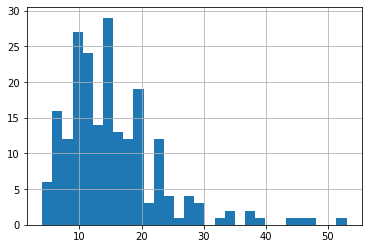

time: 361 ms (started: 2021-09-07 08:35:10 +00:00)


In [ ]:
import pandas as pd
seq_len = [len(i.split()) for i in corpus]
pd.Series(seq_len).hist(bins = 30)

In [ ]:

# For each search term return 5 closest sentences
import pandas as pd
list_of_sentence_and_score = []
closest_n = 3
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n======================\n\n")
    print("Query:", query[0:90])
    print("\n")
    print(query[90:])
    print("\n\n======================\n\n")
    #print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        temp = []
        temp.append(corpus[idx].strip()[0:295]+"....")
        temp.append(round((1-distance),4))
        list_of_sentence_and_score.append(temp)
        #print(corpus[idx].strip(), "Score:{:.4f}".format(1-distance))
    
    df=pd.DataFrame(list_of_sentence_and_score, columns=['Sentence', 'Score'])
    print(df.to_markdown())
    print("\n\n======================\n\n")




Query: IoT devices are more prone to security than traditional computers.







|    | Sentence                                                                                                                                            |   Score |
|---:|:----------------------------------------------------------------------------------------------------------------------------------------------------|--------:|
|  0 | IoT encounters security problems more than traditional computer networks does.....                                                                  |  0.8313 |
|  1 | Meanwhile, it causes that IoT is faced with more serious potential security threats than in the other networks.....                                 |  0.7279 |
|  2 | However, IoT has its special security requests other than the traditional problems harming computer, Internet and mobile communication network..... |  0.7197 |
|  3 | IoT has some special security requests.....                               